<a href="https://colab.research.google.com/github/mobius29er/youtubeExtractor/blob/feature%2Fimprove-prediction-models/Copy_of_YoutubeExtractorAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question
Can the success of a YouTube video, measured by normalized viewership and a custom-developed engagement score, be predicted and replicated by analyzing patterns in its metadata, thumbnail and video structure?
## Expected Data Sources
The data will be sourced from the public-facing pages of approximately 1,000 YouTube videos from 25 creators across five distinct genres (Challenge/Stunts, Christian, Education/Science, Gaming, and Kids/Family). This will include scraping video metadata (titles, tags, views, likes, comments, duration, publication date), channel subscriber counts, thumbnail images, and the first 30 seconds of video transcripts to analyze the "hook" (if time allows).
## Expected Techniques
The analysis will use a combination of unsupervised and supervised learning techniques:
- Pandas: For comprehensive data cleaning, merging, and feature engineering, including the calculation of a custom "Retention Quality Score" based on like/view ratios, comment/view ratios, and sentiment analysis of comments.
- Unsupervised Learning (like K-Means Clustering & PCA): K-Means will be used to group videos based on shared characteristics in their thumbnails, hooks, and engagement profiles, thereby identifying distinct "types" of successful content. PCA will help reduce the dimensionality of the feature set and identify the most influential underlying factors.
- Supervised Learning (like Regression Model): As a complementary approach, a regression model (such as Linear Regression or Gradient Boosting) will be trained to predict a video's potential view count based on its pre-upload features (title characteristics, thumbnail properties, hook analysis). This will help validate the findings from the unsupervised models and provide a direct predictive tool.
##Expected Results
I expect to identify and define several distinct, replicable "success signatures" or patterns that correlate with high viewership and engagement. The analysis should reveal that top-performing videos, regardless of genre, share common, quantifiable characteristics in their titles, thumbnail compositions, and introductory hooks. The expected outcome is a dual framework: one that classifies videos into performance clusters and another that predicts potential viewership, providing data-driven recommendations for optimization.
##Importance of This Question
Countless creators invest significant time and resources into YouTube with inconsistent results, often relying on intuition rather than data. This research aims to demystify viral success by translating the implicit strategies of top creators into an explicit, actionable framework. Answering this question will provide aspiring and established creators with a data-driven guide to content strategy, helping them optimize their videos for better performance, leading to increased viewership, audience growth, and higher potential earnings. The benefit extends beyond individual creators, offering a clearer understanding of what captures audience attention in the digital age, which is invaluable for marketers, educators, and entertainers alike. By providing a "formula" for success, this analysis can help level the playing field and empower smaller creators to compete more

## Data Needed:
### Videos
1,000 public YouTube videos breakdown (prioritizing videos 90 days or older):
### 5 genres:
- Challenge/Stunts
- Christian
- Education/Science
- Gaming
- Kids/Family
### 5 creators per genre
### 40 videos per creator
### 10 of the top videos by view count
### 10 of the bottom videos by view count
### 20 randomly selected excluding the top and bottom 10% of videos

## Basic metadata
- title - could impact the CTR and impressions
-tags - could impact impressions
- views - provides performance
- likes - indicator for retention
- comments -  indicator for retention
- duration - may impact retention
- publish date - to check to ensure video has aged enough to normalize


### Other Metrics:
Channel subscriber counts to normalize performance across creators to calculate

## Retention Quality Score
Retention Quality Score - Needed since we don't have access to analytics from each Creator to see viewer retention
- Like Ratio - Likes/Views - 30%
- Comment Ratio - Comments/Views - 20%
- Views per subscribers - Views/Subscribers - 25%
- Sentiment Score: Average positive/neutral/negative of top 100 comments - 15%
- Comment Depth: Length of Comments and any timestamps (indicating viewer retention especially for later time stamps) - 10%
- Thumbnail images - Impacts CTR (click through Rates)
- Title -

### RQS can be broken out into two seperate Metrics:
Engagement Metric (CTR (click through rate) Alternative):
- Thumbnail Images + Title + Views/Subscribers

Retention Metric (AVD (average view duration) - alternative):
- Like Ratio - likes/views
- Comment Ratio - Comments/views
- Comment Depth - Length of Comments and any timestamps (indicating viewer retention especially for later time stamps)

So RQS can rank the video on how it will perform overall, engagement metric will show how many people will click on it, and retention metric will show how veiwers will react to the video.  



The goal is to create a website using this model where someone can input their title, thumbnail, and subscriber count and we will let them know what the predicted view count and CTR rate will be along with recommended tags
That's an exciting goal! Building a web application that uses these models to provide predictions and recommendations based on user input is a great next step. This is a complex task that involves several distinct stages.

Here is a plan to achieve this:

Review and finalize models: Select the best performing models for predicting raw views (likely the Gradient Boosting Regressor on log-transformed views) and views per subscriber. Consider if a separate model is needed for CTR prediction or if views per subscriber can serve as a proxy.
Model saving: Save the trained models (views predictor and views per subscriber/CTR predictor) and the StandardScaler used for feature scaling to files, so they can be loaded and used in the web application without retraining.
Feature processing module: Create a Python module or script that encapsulates all the necessary feature engineering steps. This module will take raw user inputs (title text, thumbnail image file, subscriber count) and transform them into the numerical feature format expected by the trained models. This will include steps for text cleaning, embedding generation, image loading, color feature extraction, and scaling using the saved StandardScaler.
Tag recommendation logic: Develop a method for recommending tags. This could involve using the text embeddings of the input title and thumbnail text to find similar videos in the dataset and suggesting their tags, or using the feature importance results to identify key tags associated with high-performing videos.
Web application framework: Choose a web framework (e.g., Flask or Django in Python, or another suitable framework) to build the web application.
User interface (ui) design: Design the web pages for user input (title, thumbnail upload, subscriber count input) and displaying the prediction results (predicted view count, predicted CTR/views per subscriber) and tag recommendations.
Backend development:
Set up the web application server.
Load the saved models and StandardScaler.
Implement the logic to receive user input from the UI.
Use the Feature Processing Module to convert user input into features.
Use the loaded models to make predictions for view count and views per subscriber/CTR.
Implement the Tag Recommendation Logic to generate tag suggestions.
Format the predictions and recommendations to be sent back to the UI.
Frontend development: Implement the UI design using HTML, CSS, and JavaScript. This will handle user interactions, sending input to the backend, and displaying the results received from the backend.
Integration: Connect the frontend and backend components, ensuring data flows correctly between them.
Testing: Thoroughly test the web application to ensure it functions correctly, handles various inputs, and provides accurate predictions and recommendations.
Deployment: Deploy the web application to a hosting platform so it can be accessed by users.
Monitoring and improvement: Set up monitoring for the deployed application and plan for future improvements based on user feedback and performance analysis.
Finish task: The web application is live and providing predictions and recommendations to users.

# Code Explanation and Analysis Summary

This notebook aims to analyze YouTube video data to identify patterns correlating with video success and build models to predict performance. Here's a breakdown of the key steps and what the code does:

## 1. Data Loading and Initial Exploration (Cells ea2b61c6, 8b5a59ad, 416d5344)

- **Objective:** Load the raw data from a JSON file and transform it into a structured pandas DataFrame for easier manipulation.
- **Code:** These cells read the JSON file, normalize nested 'data' column to extract channel and video information, and then specifically extract video details into a separate DataFrame (`videos_df`).
- **Parameters:** The primary parameter is the path to the JSON file: `/content/drive/MyDrive/data/youtubeExtractor/api_only_complete_data.json`.

## 2. Data Cleaning and Feature Engineering - Basic Metrics (Cells 0373ac48, ff173ebd, 1f79b1b2)

- **Objective:** Clean the data by converting data types and calculating basic performance ratios.
- **Code:**
    - Cell 0373ac48 converts the `published_at` column to datetime objects and numerical columns (`view_count`, `like_count`, `comment_count`) to numeric types, filling missing values with 0.
    - Cell ff173ebd extracts channel subscriber counts from the normalized data and maps them to the `videos_df`.
    - Cell 1f79b1b2 calculates `like_ratio`, `comment_ratio`, and `views_per_subs` by dividing likes/comments/views by views or channel subscribers, handling potential division by zero.
- **Parameters:** No explicit parameters are set in these steps, but the code relies on the column names and data types of the loaded DataFrame.

## 3. Feature Engineering - Comment Analysis (Cells 224ab335, 3389efa7, 350c6237, 843c23a2)

- **Objective:** Extract and analyze comment data, including text and sentiment.
- **Code:**
    - Cells 224ab335 and 3389efa7 extract the comment text from the nested 'comments' structure and calculate the average length of comments for each video.
    - Cells 350c6237 and 843c23a2 install necessary libraries (`transformers`, `torch`) and then use a pre-trained multilingual sentiment analysis model (`nlptown/bert-base-multilingual-uncased-sentiment`) to calculate a sentiment score for the comments of each video.
- **Parameters:**
    - The sentiment analysis model used is `nlptown/bert-base-multilingual-uncased-sentiment`.
    - The maximum sequence length for comment processing is set to 512.

## 4. Feature Engineering - Retention Quality Score (RQS) (Cell 24987e17)

- **Objective:** Calculate the custom Retention Quality Score based on a weighted combination of normalized metrics.
- **Code:** This cell normalizes the component metrics (`like_ratio`, `comment_ratio`, `views_per_subs`, `sentiment_score`, `average_comment_length`) using Min-Max scaling and then calculates the RQS using predefined weights.
- **Parameters:**
    - Weights for RQS components: `like_ratio` (0.30), `comment_ratio` (0.20), `views_per_subs` (0.25), `sentiment_score` (0.15), `average_comment_length` (0.10).

## 5. Feature Engineering - Thumbnail Image Analysis (Cells 62f6f28c, ace43941, ef59b691, ccfd6325, 367869f5, 20a51c01, 83406944, b511e71b, c13842b8, a862ddf1)

- **Objective:** Extract visual features from thumbnail images, including face presence, dominant colors, and color palette.
- **Code:**
    - Cells 62f6f28c and ace43941 locate the thumbnail image files based on the `video_id` and install `opencv-python`.
    - Cell ef59b691 uses a Haar Cascade classifier (`haarcascade_frontalface_default.xml`) to detect faces in the thumbnails and calculates the percentage of the image area covered by faces.
    - Cells starting from ccfd6325 load the thumbnail images using PIL and use K-Means clustering to extract dominant colors and a color palette, and calculate the average RGB values.
- **Parameters:**
    - Haar Cascade classifier path: `cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'`
    - Number of clusters for dominant colors and color palette: 3 and 5 respectively in the examples.

## 6. Feature Engineering - Thumbnail Text Extraction (Cells cd4f6479, e0c3b575, 1a153ee1)

- **Objective:** Extract text content from thumbnail images using OCR.
- **Code:** These cells install Tesseract OCR and pytesseract, and then use pytesseract's `image_to_string` function to extract text from the thumbnail images.
- **Parameters:** Relies on the Tesseract OCR engine installed on the system.

## 7. Feature Engineering - Text Embeddings (Cells b0420d18, 0ccb7c1d, ab7b9698)

- **Objective:** Generate numerical representations (embeddings) for text features (`title`, `tags`, `thumbnail_text`) using a pre-trained language model.
- **Code:** These cells install `sentence-transformers`, load a multilingual model (`paraphrase-multilingual-MiniLM-L12-v2`), and then generate embeddings for the text columns.
- **Parameters:** The sentence transformer model used is `paraphrase-multilingual-MiniLM-L12-v2`.

## 8. Data Preparation for Modeling (Cells 3173e2f9, ab08a563, 59a930d8)

- **Objective:** Prepare the engineered features and target variables for machine learning models. This includes selecting relevant features, handling missing values, and splitting the data into training and testing sets.
- **Code:**
    - Cell 3173e2f9 selects numerical features to be used for clustering, excluding original identifiers and complex objects. It also handles potential NaN values.
    - Cell ab08a563 defines the target variables (`view_count` and `views_per_subs`) and selects a comprehensive set of predictor features, including engineered metrics, channel subscribers, and one-hot encoded performance categories. It also handles NaN values in the predictor matrix.
    - Cell 59a930d8 splits the data into training and testing sets (80% train, 20% test) for both target variables using `train_test_split`.
- **Parameters:**
    - Test set size for splitting: 0.2 (20%)
    - Random state for reproducibility: 42

## 9. Unsupervised Learning - PCA and K-Means Clustering (Cells 555a80d6, d4f496bd, 5ebeedca, 7e06031c)

- **Objective:** Use PCA for dimensionality reduction and K-Means clustering to group videos based on their features. Analyze the characteristics of the resulting clusters.
- **Code:**
    - Cell 555a80d6 applies PCA to the scaled feature matrix and plots the explained variance to determine the number of components needed (identified as 113 to explain 95% variance).
    - Cell d4f496bd applies PCA with the selected number of components and then applies K-Means clustering with 5 clusters (matching the number of genres). It adds the cluster labels to the DataFrame.
    - Cells 5ebeedca and 7e06031c analyze the characteristics of the clusters by examining the mean of interpretable features and the distribution of performance categories within each cluster. They also visualize the clusters in the PCA space.
- **Parameters:**
    - Number of PCA components: 113
    - Number of K-Means clusters: 5
    - Random state for K-Means: 42

## 10. Supervised Learning - Model Training and Evaluation (Cells 7470a434, 5109c561, 02854130, 5fe26263, 386ad8c1)

- **Objective:** Train and evaluate several regression models to predict raw views and views per subscriber.
- **Code:** These cells train and evaluate Gradient Boosting Regressor, Random Forest Regressor, Support Vector Regressor (SVR), and a simple Neural Network model on both target variables. They calculate and display standard regression metrics (MAE, MSE, RMSE, R-squared) for each model.
- **Parameters:**
    - Random state for tree-based models (Gradient Boosting, Random Forest): 42
    - SVR parameters: default (C=1.0, epsilon=0.1)
    - Neural Network architecture: 3 dense layers (128, 64, 32 nodes) with ReLU activation, 2 dropout layers (0.2), and a linear output layer.
    - Neural Network compilation: Adam optimizer, Mean Squared Error loss, MAE metric.
    - Neural Network training: 50 epochs, batch size 32, 20% validation split.

## 11. Refining Supervised Models and Feature Importance (Cells 8Xclo0y-paA2, 28591a57, 4f035ff6, 70c4e7bb, d7aea784, 371WlZOhaIam, 74c23698, 3ef19c0c, cd2fccae, 246958b5, ba1d2c69)

- **Objective:** Address issues with predicting raw views, analyze feature importance for the best-performing model, and interpret success patterns.
- **Code:**
    - Cells related to 8Xclo0y-paA2 and 28591a57 seem to re-evaluate the Random Forest model.
    - The subsequent cells address a `ValueError` related to feature importance calculation by correctly using permutation importance with a scikit-learn pipeline that includes scaling and PCA before the Random Forest model. They also re-implement data splitting based on 'performance_category' (although there was an issue with this column not being found after loading the CSV, which was addressed by reprocessing the data).
    - Cell 371WlZOhaIam consolidates the data loading, reprocessing, splitting, pipeline training, and permutation importance calculation steps.
    - Cells 74c23698, 3ef19c0c, cd2fccae, 246958b5, and ba1d2c69 focus on analyzing the permutation importance results and synthesizing findings from both the supervised learning and unsupervised clustering to interpret success signatures.
    - Cells 147f1b4f, c221b31f, e212ca75, 6a54131d, e7259307, 9cb1dc68, 3dae92e8, and fvrlKYvOa62A address the poor performance in predicting raw views by analyzing the target variable distribution, applying a logarithmic transformation, and re-training/evaluating models on the transformed data. They also compare the performance before and after the transformation.
- **Parameters:**
    - Permutation Importance: `n_repeats=10`, `random_state=42`, `n_jobs=-1`.
    - Logarithmic transformation: `np.log1p` (adds 1 before taking the logarithm to handle zero values).

## Summary of Findings:

- **Data Loading and Feature Engineering:** The initial data was loaded, cleaned, and a comprehensive set of features was engineered, including RQS components, RQS, thumbnail features (face detection, colors), extracted text, and text embeddings.
- **Unsupervised Learning:** PCA reduced the dimensionality of the feature space, and K-Means clustering grouped videos into 5 clusters. Analysis of these clusters helped understand how different video characteristics group together.
- **Supervised Learning:**
    - Predicting **Raw Views** was initially very challenging, with models performing worse than a simple mean predictor (negative R-squared). Applying a logarithmic transformation to the raw view count significantly improved the performance of Gradient Boosting and Random Forest models, resulting in high positive R-squared values (around 0.94-0.97) on the original scale after inverse transformation. The **Random Forest** model on log-transformed views appears to be the best for this task.
    - Predicting **Views per Subscriber** was more successful from the start, with **Gradient Boosting** and **Random Forest** achieving good positive R-squared values (around 0.83-0.85).
- **Feature Importance:** Permutation importance analysis for the Random Forest model predicting Views per Subscriber (trained on a split based on performance category) revealed that metrics directly reflecting audience engagement (`views_per_subs`, `like_ratio`, `comment_ratio`) and the video's initial performance categorization (`performance_category_top_performer`, `performance_category_random_sample`, `performance_category_bottom_performer`) are the most influential features. Thumbnail color features also showed notable importance.
- **Success Signatures:** High-performing videos (those with high views per subscriber and RQS) tend to exhibit strong audience engagement metrics (high like and comment ratios), and their initial performance category is a strong indicator. Specific thumbnail color patterns also appear to be correlated with success.

In conclusion, the notebook successfully processed the data, engineered relevant features, performed clustering to understand video groupings, and built supervised models to predict performance. The logarithmic transformation was crucial for improving raw view prediction. The analysis of feature importance provides valuable insights into the characteristics that are most correlated with a video's success, particularly when normalized by channel size. The next steps would involve further model refinement, deeper analysis of specific feature impacts, and potentially incorporating additional data sources like transcripts if they become available.

# Code Explanation and Analysis Summary

This notebook aims to analyze YouTube video data to identify patterns correlating with video success and build models to predict performance. Here's a breakdown of the key steps and what the code does:

## 1. Data Loading and Initial Exploration (Cells ea2b61c6, 8b5a59ad, 416d5344)

- **Objective:** Load the raw data from a JSON file and transform it into a structured pandas DataFrame for easier manipulation.
- **Code:** These cells read the JSON file, normalize nested 'data' column to extract channel and video information, and then specifically extract video details into a separate DataFrame (`videos_df`).
- **Parameters:** The primary parameter is the path to the JSON file: `/content/drive/MyDrive/data/youtubeExtractor/api_only_complete_data.json`.

## 2. Data Cleaning and Feature Engineering - Basic Metrics (Cells 0373ac48, ff173ebd, 1f79b1b2)

- **Objective:** Clean the data by converting data types and calculating basic performance ratios.
- **Code:**
    - Cell 0373ac48 converts the `published_at` column to datetime objects and numerical columns (`view_count`, `like_count`, `comment_count`) to numeric types, filling missing values with 0.
    - Cell ff173ebd extracts channel subscriber counts from the normalized data and maps them to the `videos_df`.
    - Cell 1f79b1b2 calculates `like_ratio`, `comment_ratio`, and `views_per_subs` by dividing likes/comments/views by views or channel subscribers, handling potential division by zero.
- **Parameters:** No explicit parameters are set in these steps, but the code relies on the column names and data types of the loaded DataFrame.

## 3. Feature Engineering - Comment Analysis (Cells 224ab335, 3389efa7, 350c6237, 843c23a2)

- **Objective:** Extract and analyze comment data, including text and sentiment.
- **Code:**
    - Cells 224ab335 and 3389efa7 extract the comment text from the nested 'comments' structure and calculate the average length of comments for each video.
    - Cells 350c6237 and 843c23a2 install necessary libraries (`transformers`, `torch`) and then use a pre-trained multilingual sentiment analysis model (`nlptown/bert-base-multilingual-uncased-sentiment`) to calculate a sentiment score for the comments of each video.
- **Parameters:**
    - The sentiment analysis model used is `nlptown/bert-base-multilingual-uncased-sentiment`.
    - The maximum sequence length for comment processing is set to 512.

## 4. Feature Engineering - Retention Quality Score (RQS) (Cell 24987e17)

- **Objective:** Calculate the custom Retention Quality Score based on a weighted combination of normalized metrics.
- **Code:** This cell normalizes the component metrics (`like_ratio`, `comment_ratio`, `views_per_subs`, `sentiment_score`, `average_comment_length`) using Min-Max scaling and then calculates the RQS using predefined weights.
- **Parameters:**
    - Weights for RQS components: `like_ratio` (0.30), `comment_ratio` (0.20), `views_per_subs` (0.25), `sentiment_score` (0.15), `average_comment_length` (0.10).

## 5. Feature Engineering - Thumbnail Image Analysis (Cells 62f6f28c, ace43941, ef59b691, ccfd6325, 367869f5, 20a51c01, 83406944, b511e71b, c13842b8, a862ddf1)

- **Objective:** Extract visual features from thumbnail images, including face presence, dominant colors, and color palette.
- **Code:**
    - Cells 62f6f28c and ace43941 locate the thumbnail image files based on the `video_id` and install `opencv-python`.
    - Cell ef59b691 uses a Haar Cascade classifier (`haarcascade_frontalface_default.xml`) to detect faces in the thumbnails and calculates the percentage of the image area covered by faces.
    - Cells starting from ccfd6325 load the thumbnail images using PIL and use K-Means clustering to extract dominant colors and a color palette, and calculate the average RGB values.
- **Parameters:**
    - Haar Cascade classifier path: `cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'`
    - Number of clusters for dominant colors and color palette: 3 and 5 respectively in the examples.

## 6. Feature Engineering - Thumbnail Text Extraction (Cells cd4f6479, e0c3b575, 1a153ee1)

- **Objective:** Extract text content from thumbnail images using OCR.
- **Code:** These cells install Tesseract OCR and pytesseract, and then use pytesseract's `image_to_string` function to extract text from the thumbnail images.
- **Parameters:** Relies on the Tesseract OCR engine installed on the system.

## 7. Feature Engineering - Text Embeddings (Cells b0420d18, 0ccb7c1d, ab7b9698)

- **Objective:** Generate numerical representations (embeddings) for text features (`title`, `tags`, `thumbnail_text`) using a pre-trained language model.
- **Code:** These cells install `sentence-transformers`, load a multilingual model (`paraphrase-multilingual-MiniLM-L12-v2`), and then generate embeddings for the text columns.
- **Parameters:** The sentence transformer model used is `paraphrase-multilingual-MiniLM-L12-v2`.

## 8. Data Preparation for Modeling (Cells 3173e2f9, ab08a563, 59a930d8)

- **Objective:** Prepare the engineered features and target variables for machine learning models. This includes selecting relevant features, handling missing values, and splitting the data into training and testing sets.
- **Code:**
    - Cell 3173e2f9 selects numerical features to be used for clustering, excluding original identifiers and complex objects. It also handles potential NaN values.
    - Cell ab08a563 defines the target variables (`view_count` and `views_per_subs`) and selects a comprehensive set of predictor features, including engineered metrics, channel subscribers, and one-hot encoded performance categories. It also handles NaN values in the predictor matrix.
    - Cell 59a930d8 splits the data into training and testing sets (80% train, 20% test) for both target variables using `train_test_split`.
- **Parameters:**
    - Test set size for splitting: 0.2 (20%)
    - Random state for reproducibility: 42

## 9. Unsupervised Learning - PCA and K-Means Clustering (Cells 555a80d6, d4f496bd, 5ebeedca, 7e06031c)

- **Objective:** Use PCA for dimensionality reduction and K-Means clustering to group videos based on their features. Analyze the characteristics of the resulting clusters.
- **Code:**
    - Cell 555a80d6 applies PCA to the scaled feature matrix and plots the explained variance to determine the number of components needed (identified as 113 to explain 95% variance).
    - Cell d4f496bd applies PCA with the selected number of components and then applies K-Means clustering with 5 clusters (matching the number of genres). It adds the cluster labels to the DataFrame.
    - Cells 5ebeedca and 7e06031c analyze the characteristics of the clusters by examining the mean of interpretable features and the distribution of performance categories within each cluster. They also visualize the clusters in the PCA space.
- **Parameters:**
    - Number of PCA components: 113
    - Number of K-Means clusters: 5
    - Random state for K-Means: 42

## 10. Supervised Learning - Model Training and Evaluation (Cells 7470a434, 5109c561, 02854130, 5fe26263, 386ad8c1)

- **Objective:** Train and evaluate several regression models to predict raw views and views per subscriber.
- **Code:** These cells train and evaluate Gradient Boosting Regressor, Random Forest Regressor, Support Vector Regressor (SVR), and a simple Neural Network model on both target variables. They calculate and display standard regression metrics (MAE, MSE, RMSE, R-squared) for each model.
- **Parameters:**
    - Random state for tree-based models (Gradient Boosting, Random Forest): 42
    - SVR parameters: default (C=1.0, epsilon=0.1)
    - Neural Network architecture: 3 dense layers (128, 64, 32 nodes) with ReLU activation, 2 dropout layers (0.2), and a linear output layer.
    - Neural Network compilation: Adam optimizer, Mean Squared Error loss, MAE metric.
    - Neural Network training: 50 epochs, batch size 32, 20% validation split.

## 11. Refining Supervised Models and Feature Importance (Cells 8Xclo0y-paA2, 28591a57, 4f035ff6, 70c4e7bb, d7aea784, 371WlZOhaIam, 74c23698, 3ef19c0c, cd2fccae, 246958b5, ba1d2c69)

- **Objective:** Address issues with predicting raw views, analyze feature importance for the best-performing model, and interpret success patterns.
- **Code:**
    - Cells related to 8Xclo0y-paA2 and 28591a57 seem to re-evaluate the Random Forest model.
    - The subsequent cells address a `ValueError` related to feature importance calculation by correctly using permutation importance with a scikit-learn pipeline that includes scaling and PCA before the Random Forest model. They also re-implement data splitting based on 'performance_category' (although there was an issue with this column not being found after loading the CSV, which was addressed by reprocessing the data).
    - Cell 371WlZOhaIam consolidates the data loading, reprocessing, splitting, pipeline training, and permutation importance calculation steps.
    - Cells 74c23698, 3ef19c0c, cd2fccae, 246958b5, and ba1d2c69 focus on analyzing the permutation importance results and synthesizing findings from both the supervised learning and unsupervised clustering to interpret success signatures.
    - Cells 147f1b4f, c221b31f, e212ca75, 6a54131d, e7259307, 9cb1dc68, 3dae92e8, and fvrlKYvOa62A address the poor performance in predicting raw views by analyzing the target variable distribution, applying a logarithmic transformation, and re-training/evaluating models on the transformed data. They also compare the performance before and after the transformation.
- **Parameters:**
    - Permutation Importance: `n_repeats=10`, `random_state=42`, `n_jobs=-1`.
    - Logarithmic transformation: `np.log1p` (adds 1 before taking the logarithm to handle zero values).

## Summary of Findings:

- **Data Loading and Feature Engineering:** The initial data was loaded, cleaned, and a comprehensive set of features was engineered, including RQS components, RQS, thumbnail features (face detection, colors), extracted text, and text embeddings.
- **Unsupervised Learning:** PCA reduced the dimensionality of the feature space, and K-Means clustering grouped videos into 5 clusters. Analysis of these clusters helped understand how different video characteristics group together.
- **Supervised Learning:**
    - Predicting **Raw Views** was initially very challenging, with models performing worse than a simple mean predictor (negative R-squared). Applying a logarithmic transformation to the raw view count significantly improved the performance of Gradient Boosting and Random Forest models, resulting in high positive R-squared values (around 0.94-0.97) on the original scale after inverse transformation. The **Random Forest** model on log-transformed views appears to be the best for this task.
    - Predicting **Views per Subscriber** was more successful from the start, with **Gradient Boosting** and **Random Forest** achieving good positive R-squared values (around 0.83-0.85).
- **Feature Importance:** Permutation importance analysis for the Random Forest model predicting Views per Subscriber (trained on a split based on performance category) revealed that metrics directly reflecting audience engagement (`views_per_subs`, `like_ratio`, `comment_ratio`) and the video's initial performance categorization (`performance_category_top_performer`, `performance_category_random_sample`, `performance_category_bottom_performer`) are the most influential features. Thumbnail color features also showed notable importance.
- **Success Signatures:** High-performing videos (those with high views per subscriber and RQS) tend to exhibit strong audience engagement metrics (high like and comment ratios), and their initial performance category is a strong indicator. Specific thumbnail color patterns also appear to be correlated with success.

In conclusion, the notebook successfully processed the data, engineered relevant features, performed clustering to understand video groupings, and built supervised models to predict performance. The logarithmic transformation was crucial for improving raw view prediction. The analysis of feature importance provides valuable insights into the characteristics that are most correlated with a video's success, particularly when normalized by channel size. The next steps would involve further model refinement, deeper analysis of specific feature impacts, and potentially incorporating additional data sources like transcripts if they become available.

#START1

# 1. Data Loading and Initial Exploration

In [1]:
from google.colab import drive

# Step 1: Unmount the drive to clear the directory
drive.flush_and_unmount()
print('All changes made in this session have been saved.')

# Step 2: Mount the drive again
drive.mount('/content/drive')

All changes made in this session have been saved.
Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Load the data from the JSON file
df = pd.read_json('/content/drive/MyDrive/data/youtubeExtractor/api_only_complete_data.json')

# Display the first few rows of the DataFrame and its info to understand the structure
display(df.head())
display(df.info())

,extraction_date,extraction_type,transcript_note,channels_processed,videos_selected,quota_used,data,metadata
VeggieTales Official,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,{'channel_info': {'name': 'VeggieTales Officia...,NaN
Miss Honey Bear - Speech Therapist - Read Aloud,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,{'channel_info': {'name': 'Miss Honey Bear - S...,NaN
MrBeast,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,"{'channel_info': {'name': 'MrBeast', 'handle':...",NaN
Zach King,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,"{'channel_info': {'name': 'Zach King', 'handle...",NaN
Hangtime,2025-09-16T16:40:20.904828,api_only_public_videos,"Caption availability checked, but content requ...",29,1063,48888,"{'channel_info': {'name': 'Hangtime', 'handle'...",NaN


<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, VeggieTales Official to description
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   extraction_date     31 non-null     object
 1   extraction_type     31 non-null     object
 2   transcript_note     31 non-null     object
 3   channels_processed  31 non-null     int64 
 4   videos_selected     31 non-null     int64 
 5   quota_used          31 non-null     int64 
 6   data                25 non-null     object
 7   metadata            6 non-null      object
dtypes: int64(3), object(5)
memory usage: 2.2+ KB


None

In [4]:
# Normalize the 'data' column
data_normalized = pd.json_normalize(df['data'])

# Display the first few rows of the normalized data to understand its structure
display(data_normalized.head())
display(data_normalized.info())

,genre,videos,channel_info.name,channel_info.handle,channel_info.subs,channel_info.global_tier,channel_info.genre_tier,channel_info.channel_id,channel_data.channel_id,channel_data.handle,...,channel_data.video_count,channel_data.view_count,channel_data.thumbnail_url,channel_data.uploads_playlist_id,selection_result.selected_videos,selection_result.selection_method,selection_result.total_selected,selection_result.breakdown.top_performers,selection_result.breakdown.bottom_performers,selection_result.breakdown.random_sample
0,kids_family,"[{'video_id': 'LtHr7gluh08', 'title': 'VeggieT...",VeggieTales Official,@veggietales,808000.0,Small,Small,UChddokv0fxIN3BS-KZpxFfA,UChddokv0fxIN3BS-KZpxFfA,@veggietales,...,0.0,0.0,https://yt3.ggpht.com/ytc/AIdro_kFl-TRfiAf1KNr...,UUhddokv0fxIN3BS-KZpxFfA,"[{'video_id': 'LtHr7gluh08', 'title': 'VeggieT...",intelligent_sampling,40.0,10.0,10.0,20.0
1,kids_family,"[{'video_id': 'ePkmFhcN9EU', 'title': 'Brown B...",Miss Honey Bear - Speech Therapist - Read Aloud,@MissHoneyBearSLP,20300.0,New,New,UCWi-JuL1M6WDI8ShtvWlH0A,UCWi-JuL1M6WDI8ShtvWlH0A,@MissHoneyBearSLP,...,0.0,0.0,https://yt3.ggpht.com/YwIgpMFL4vgF1qWowAvjiDgh...,UUWi-JuL1M6WDI8ShtvWlH0A,"[{'video_id': 'ePkmFhcN9EU', 'title': 'Brown B...",intelligent_sampling,40.0,10.0,10.0,20.0
2,challenge_stunts,"[{'video_id': '0e3GPea1Tyg', 'title': '$456,00...",MrBeast,@MrBeast,430000000.0,Mega,Large,UCX6OQ3DkcsbYNE6H8uQQuVA,UCX6OQ3DkcsbYNE6H8uQQuVA,@MrBeast,...,0.0,0.0,https://yt3.ggpht.com/nxYrc_1_2f77DoBadyxMTmv7...,UUX6OQ3DkcsbYNE6H8uQQuVA,"[{'video_id': '0e3GPea1Tyg', 'title': '$456,00...",intelligent_sampling,40.0,10.0,10.0,20.0
3,challenge_stunts,"[{'video_id': '44HXLCsdIk8', 'title': 'Zach Ki...",Zach King,@ZachKing,42900000.0,Large,Mid,UCq8DICunczvLuJJq414110A,UCq8DICunczvLuJJq414110A,@ZachKing,...,0.0,0.0,https://yt3.ggpht.com/ytc/AIdro_kik7i7hId8EjFM...,UUq8DICunczvLuJJq414110A,"[{'video_id': '44HXLCsdIk8', 'title': 'Zach Ki...",intelligent_sampling,40.0,10.0,10.0,20.0
4,challenge_stunts,"[{'video_id': 'xlbnI3bG5R0', 'title': 'I Melte...",Hangtime,@Hangtime37,2610000.0,Mid,Small,UC3wc2MERkKAqNEtaiQslC-A,UC3wc2MERkKAqNEtaiQslC-A,@Hangtime37,...,0.0,0.0,https://yt3.ggpht.com/UikQaehKW_o176qfEf12Gutt...,UU3wc2MERkKAqNEtaiQslC-A,"[{'video_id': 'xlbnI3bG5R0', 'title': 'I Melte...",intelligent_sampling,40.0,10.0,10.0,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   genre                                         25 non-null     object 
 1   videos                                        25 non-null     object 
 2   channel_info.name                             25 non-null     object 
 3   channel_info.handle                           25 non-null     object 
 4   channel_info.subs                             25 non-null     float64
 5   channel_info.global_tier                      25 non-null     object 
 6   channel_info.genre_tier                       25 non-null     object 
 7   channel_info.channel_id                       25 non-null     object 
 8   channel_data.channel_id                       25 non-null     object 
 9   channel_data.handle                           25 non-null     objec

None

In [5]:
# Extract the list of video dictionaries from the 'videos' column and flatten it
# Add a check to ensure the sublist is a list before iterating
videos_list = [video for sublist in data_normalized['videos'] if isinstance(sublist, list) for video in sublist]

# Create a new DataFrame from the list of video dictionaries
videos_df = pd.DataFrame(videos_list)

# Display the first few rows of the new DataFrame and its info
display(videos_df.head())
display(videos_df.info())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14T20:53:29Z,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 4, 'la...",extracted_data\thumbnails\VeggieTales_Official...
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16T19:14:55Z,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05T16:00:31Z,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\VeggieTales_Official...
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01T19:32:03Z,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10T18:41:06Z,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   video_id              1000 non-null   object
 1   title                 1000 non-null   object
 2   description           1000 non-null   object
 3   published_at          1000 non-null   object
 4   duration              1000 non-null   object
 5   view_count            1000 non-null   int64 
 6   like_count            1000 non-null   int64 
 7   comment_count         1000 non-null   int64 
 8   tags                  1000 non-null   object
 9   thumbnail_url         1000 non-null   object
 10  performance_category  1000 non-null   object
 11  comments              1000 non-null   object
 12  caption_info          1000 non-null   object
 13  thumbnail_local_path  1000 non-null   object
dtypes: int64(3), object(11)
memory usage: 109.5+ KB


None

# 2. Data Cleaning and Feature Engineering - Basic Metrics

In [6]:
# Convert 'published_at' to datetime objects
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'])

# Convert numerical columns to numeric, coercing errors, and fill missing values with 0
for col in ['view_count', 'like_count', 'comment_count']:
    videos_df[col] = pd.to_numeric(videos_df[col], errors='coerce').fillna(0)

# Display the info of the cleaned DataFrame to check data types and null counts
display(videos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              1000 non-null   object             
 1   title                 1000 non-null   object             
 2   description           1000 non-null   object             
 3   published_at          1000 non-null   datetime64[ns, UTC]
 4   duration              1000 non-null   object             
 5   view_count            1000 non-null   int64              
 6   like_count            1000 non-null   int64              
 7   comment_count         1000 non-null   int64              
 8   tags                  1000 non-null   object             
 9   thumbnail_url         1000 non-null   object             
 10  performance_category  1000 non-null   object             
 11  comments              1000 non-null   object             
 12  caption

None

In [7]:
# Create a mapping from video_id to channel subscriber count
video_to_subs = {}
for index, row in data_normalized.iterrows():
    channel_subs = row['channel_info.subs']
    # Add a check to ensure 'videos' is a list before iterating
    if isinstance(row['videos'], list):
        for video in row['videos']:
            # Add a check to ensure 'video' is a dictionary and has 'video_id'
            if isinstance(video, dict) and 'video_id' in video:
                video_to_subs[video['video_id']] = channel_subs

# Map the subscriber count to the videos_df
# Use .get() with a default value (like 0) to handle video_ids not found in video_to_subs
videos_df['channel_subs'] = videos_df['video_id'].apply(lambda x: video_to_subs.get(x, 0))


# Display the first few rows with the new column and check the info
display(videos_df.head())
display(videos_df.info())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path,channel_subs
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 4, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              1000 non-null   object             
 1   title                 1000 non-null   object             
 2   description           1000 non-null   object             
 3   published_at          1000 non-null   datetime64[ns, UTC]
 4   duration              1000 non-null   object             
 5   view_count            1000 non-null   int64              
 6   like_count            1000 non-null   int64              
 7   comment_count         1000 non-null   int64              
 8   tags                  1000 non-null   object             
 9   thumbnail_url         1000 non-null   object             
 10  performance_category  1000 non-null   object             
 11  comments              1000 non-null   object             
 12  caption

None

In [8]:
# Calculate the ratios for RQS
videos_df['like_ratio'] = videos_df['like_count'] / videos_df['view_count']
videos_df['comment_ratio'] = videos_df['comment_count'] / videos_df['view_count']
videos_df['views_per_subs'] = videos_df['view_count'] / videos_df['channel_subs']

# Handle potential division by zero if a channel has 0 subscribers
videos_df['views_per_subs'] = videos_df['views_per_subs'].replace([float('inf'), float('-inf')], 0)
videos_df['views_per_subs'] = videos_df['views_per_subs'].fillna(0) # Fill NaN in case of 0 views and 0 subs

# Display the first few rows with the new ratio columns
display(videos_df.head())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path,channel_subs,like_ratio,comment_ratio,views_per_subs
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 4, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.003703,0.0,30.924500
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.006180,0.0,18.226731
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.002865,0.0,16.946646
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.003646,0.0,16.122910
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,top_performer,[],"{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.003452,0.0,15.282682


# 3. Feature Engineering - Comment Analysis

In [9]:
# Function to extract comment text from the list of comment dictionaries
def extract_comment_text(comments_list):
    if isinstance(comments_list, list):
        return [comment.get('text', '') for comment in comments_list if isinstance(comment, dict)]
    return []

# Apply the function to the 'comments' column to get a list of comment texts for each video
videos_df['comment_texts'] = videos_df['comments'].apply(extract_comment_text)

# Display the first few rows with the new 'comment_texts' column
display(videos_df[['comments', 'comment_texts']].head())

,comments,comment_texts
0,[],[]
1,[],[]
2,[],[]
3,[],[]
4,[],[]


In [10]:
# Function to calculate the average length of comments
def calculate_average_comment_length(comment_list):
    if not comment_list:
        return 0
    total_length = sum(len(comment) for comment in comment_list)
    return total_length / len(comment_list)

# Apply the function to the 'comment_texts' column
videos_df['average_comment_length'] = videos_df['comment_texts'].apply(calculate_average_comment_length)

# Display the first few rows with the new 'average_comment_length' column
display(videos_df[['comment_texts', 'average_comment_length']].head())

,comment_texts,average_comment_length
0,[],0.0
1,[],0.0
2,[],0.0
3,[],0.0
4,[],0.0


In [11]:
%pip install transformers
%pip install torch # Transformers often depends on PyTorch or TensorFlow. We'll install PyTorch here.

Now, let's load a pre-trained sentiment analysis model from Hugging Face that supports multiple languages. We'll use a pipeline for ease of use. A common choice is `distilbert-base-multilingual-cased-sentiments-student`.

In [12]:
import re
import string

def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    # Remove URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Remove punctuation while keeping emojis (emojis are not considered punctuation by string.punctuation)
    comment = comment.translate(str.maketrans('', '', string.punctuation.replace('', ''))) # This line is not quite right for keeping emojis

    # A better approach to remove punctuation but keep emojis:
    # Create a translation table that maps punctuation to None
    translator = str.maketrans('', '', string.punctuation)
    comment = comment.translate(translator)

    # Remove numbers
    comment = re.sub(r'\d+', '', comment)
    # Remove extra whitespace
    comment = re.sub(r'\s+', ' ', comment).strip()

    return comment

# Example of preprocessing
print(preprocess_comment("Hello, world! This is a test :) 👍 https://example.com 123"))

hello world this is a test 👍


In [13]:
from transformers import pipeline
import numpy as np
import re
import string

# Define the preprocessing function
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    # Remove URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Create a translation table that maps punctuation to None
    translator = str.maketrans('', '', string.punctuation)
    comment = comment.translate(translator)
    # Remove numbers
    comment = re.sub(r'\d+', '', comment)
    # Remove extra whitespace
    comment = re.sub(r'\s+', ' ', comment).strip()

    return comment

# Load a multilingual sentiment analysis pipeline
# We can specify the maximum sequence length the model can handle if needed,
# but the pipeline usually handles tokenization and knows the model's limit.
# We will handle truncation explicitly in the get_sentiment_score function.
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function to get sentiment score for a list of comments
def get_sentiment_score(comment_list):
    if not comment_list:
        return 0.0 # Return 0.0 for videos with no comments

    sentiment_scores = []
    max_seq_length = 512 # Define the maximum sequence length for the model

    # Process each comment individually after preprocessing and truncation
    for comment in comment_list:
        preprocessed_comment = preprocess_comment(comment)
        if not preprocessed_comment: # Skip empty comments after preprocessing
            continue

        # Truncate the preprocessed comment to the maximum sequence length
        # The pipeline's tokenizer will handle the actual tokenization,
        # but we can limit the string length as a first step.
        # A more robust way is to use the tokenizer directly to truncate by tokens,
        # but string slicing is simpler here and often sufficient.
        truncated_comment = preprocessed_comment[:max_seq_length]


        try:
            # Analyze sentiment for each preprocessed and truncated comment
            sentiments = sentiment_analyzer(truncated_comment)
            # The nlptown model outputs scores from 1 to 5 stars
            # We can map this to a score between -1 and 1.
            for sent in sentiments:
                score = int(sent['label'].split()[0]) # Extract the number from the label (e.g., '5 stars' -> 5)
                if score <= 2:
                    sentiment_scores.append((score - 3) / 2.0) # Map 1, 2 to -1, -0.5
                elif score == 3:
                    sentiment_scores.append(0.0) # Map 3 to 0
                else:
                    sentiment_scores.append((score - 3) / 2.0) # Map 4, 5 to 0.5, 1
        except Exception as e:
            # Handle potential errors during sentiment analysis for a specific comment
            print(f"Error processing comment: {truncated_comment[:50]}... Error: {e}")
            continue # Skip to the next comment

    if not sentiment_scores:
        return 0.0 # Return 0.0 if no comments were processed successfully

    return np.mean(sentiment_scores) # Calculate the average sentiment score


# Apply the function to the 'comment_texts' column
# This might still take some time depending on the number of comments per video
videos_df['sentiment_score'] = videos_df['comment_texts'].apply(get_sentiment_score)

# Display the first few rows with the new 'sentiment_score' column
display(videos_df[['comment_texts', 'sentiment_score']].head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,comment_texts,sentiment_score
0,[],0.0
1,[],0.0
2,[],0.0
3,[],0.0
4,[],0.0


# 4. Feature Engineering - Retention Quality Score (RQS)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Define the RQS component columns
rqs_components = ['like_ratio', 'comment_ratio', 'views_per_subs', 'sentiment_score', 'average_comment_length']

# Handle potential NaN values in component columns before scaling
# For ratios, NaN might occur if view_count or channel_subs was 0, which we handled with fillna(0) earlier.
# For sentiment_score and average_comment_length, NaN might occur if there were no comments, which we handled with returning 0.0.
# However, it's good practice to double-check and potentially fill any remaining NaNs if necessary before scaling.
# Let's fill any potential remaining NaNs in these columns with 0, assuming 0 for these metrics means no contribution to the score.
videos_df[rqs_components] = videos_df[rqs_components].fillna(0)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the RQS component columns
# We fit and transform only the relevant columns
videos_df[rqs_components] = scaler.fit_transform(videos_df[rqs_components])

# Define the weights for each component
weights = {
    'like_ratio': 0.30,
    'comment_ratio': 0.20,
    'views_per_subs': 0.25,
    'sentiment_score': 0.15,
    'average_comment_length': 0.10
}

# Calculate the RQS for each video using the normalized scores and weights
videos_df['rqs'] = (
    videos_df['like_ratio'] * weights['like_ratio'] +
    videos_df['comment_ratio'] * weights['comment_ratio'] +
    videos_df['views_per_subs'] * weights['views_per_subs'] +
    videos_df['sentiment_score'] * weights['sentiment_score'] +
    videos_df['average_comment_length'] * weights['average_comment_length']
)

# Display the first few rows with the normalized components and the final RQS
display(videos_df[rqs_components + ['rqs']].head())

,like_ratio,comment_ratio,views_per_subs,sentiment_score,average_comment_length,rqs
0,0.019181,0.0,0.483025,0.5,0.0,0.201510
1,0.032010,0.0,0.284692,0.5,0.0,0.155776
2,0.014842,0.0,0.264698,0.5,0.0,0.145627
3,0.018887,0.0,0.251832,0.5,0.0,0.143624
4,0.017884,0.0,0.238708,0.5,0.0,0.140042


# 5. Feature Engineering - Thumbnail Image Analysis

In [15]:
import os

# Define the base directory where the thumbnails are stored
# Assuming the 'thumbnails' folder is in the content directory
thumbnails_base_dir = '/content/drive/MyDrive/data/youtubeExtractor/thumbnails'

# Function to find the thumbnail file path for a given video_id
def find_thumbnail_path(video_id, base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            # Thumbnail filenames are video_id.jpg
            if file == f"{video_id}.jpg":
                return os.path.join(root, file)
    return None # Return None if the thumbnail is not found

# Apply the function to the videos_df to create a new column with thumbnail paths
videos_df['thumbnail_path'] = videos_df['video_id'].apply(lambda x: find_thumbnail_path(x, thumbnails_base_dir))

# Display rows where a thumbnail path was found to verify
display(videos_df[videos_df['thumbnail_path'].notna()].head())

# Check how many thumbnails were found
print(f"Number of thumbnails found: {videos_df['thumbnail_path'].notna().sum()}")
print(f"Total number of videos: {len(videos_df)}")

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,...,thumbnail_local_path,channel_subs,like_ratio,comment_ratio,views_per_subs,comment_texts,average_comment_length,sentiment_score,rqs,thumbnail_path
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.019181,0.0,0.483025,[],0.0,0.5,0.201510,/content/drive/MyDrive/data/youtubeExtractor/t...
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.032010,0.0,0.284692,[],0.0,0.5,0.155776,/content/drive/MyDrive/data/youtubeExtractor/t...
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.014842,0.0,0.264698,[],0.0,0.5,0.145627,/content/drive/MyDrive/data/youtubeExtractor/t...
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.018887,0.0,0.251832,[],0.0,0.5,0.143624,/content/drive/MyDrive/data/youtubeExtractor/t...
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,...,extracted_data\thumbnails\VeggieTales_Official...,808000.0,0.017884,0.0,0.238708,[],0.0,0.5,0.140042,/content/drive/MyDrive/data/youtubeExtractor/t...


Number of thumbnails found: 1000
Total number of videos: 1000


In [16]:
%pip install opencv-python

Now that OpenCV is installed, we can load a pre-trained face detection model and use it to detect faces in the thumbnail images. We'll iterate through the videos that have a linked thumbnail path and apply the face detection model to each image.

In [17]:
import cv2
import os

# Load a pre-trained face detection model (Haar Cascade classifier)
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'

if not os.path.exists(haar_cascade_path):
    print(f"Haar cascade file not found at {haar_cascade_path}")
    print("You might need to download it manually from https://github.com/opencv/opencv/tree/master/data/haarcascades and place it in a directory where OpenCV can find it, or update the 'haar_cascade_path' variable.")
    # As an alternative for demonstration, we could potentially try to fetch it if internet access is reliable
    # import urllib.request
    # url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
    # urllib.request.urlretrieve(url, 'haarcascade_frontalface_default.xml')
    # haar_cascade_path = 'haarcascade_frontalface_default.xml'
    # print(f"Attempted to download Haar cascade to {haar_cascade_path}")


# Ensure the cascade file exists before proceeding
if os.path.exists(haar_cascade_path):
    face_cascade = cv2.CascadeClassifier(haar_cascade_path)

    # Function to detect faces in an image and return the percentage of image covered by faces
    def calculate_face_area_percentage(thumbnail_path):
        if thumbnail_path is None or not os.path.exists(thumbnail_path):
            return 0.0 # Return 0.0 if thumbnail path is missing or file doesn't exist

        try:
            # Read the image
            image = cv2.imread(thumbnail_path)
            if image is None:
                print(f"Warning: Could not read image at {thumbnail_path}")
                return 0.0

            # Get image dimensions
            img_height, img_width = image.shape[:2]
            total_image_area = img_height * img_width

            if total_image_area == 0:
                return 0.0 # Avoid division by zero


            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = face_cascade.detectMultiScale(
                gray_image,
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(30, 30),
                flags=cv2.CASCADE_SCALE_IMAGE
            )

            # Calculate the total area of detected faces
            total_face_area = 0
            for (x, y, w, h) in faces:
                total_face_area += w * h

            # Calculate the percentage of image covered by faces
            face_area_percentage = (total_face_area / total_image_area) * 100

            return face_area_percentage

        except Exception as e:
            print(f"Error processing thumbnail {thumbnail_path}: {e}")
            return 0.0 # Return 0.0 in case of any processing error

    # Apply the function to the videos_df to calculate face area percentage in each thumbnail
    videos_df['face_area_percentage'] = videos_df['thumbnail_path'].apply(calculate_face_area_percentage)

    # Display the first few rows with the new 'face_area_percentage' column
    display(videos_df[['thumbnail_path', 'face_area_percentage']].head())

    # Display summary statistics for the face area percentage
    display(videos_df['face_area_percentage'].describe())

else:
    print("Face detection for percentage calculation skipped because the Haar cascade file was not found.")

,thumbnail_path,face_area_percentage
0,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0
1,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0
2,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0
3,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0
4,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0


,face_area_percentage
count,1000.000000
mean,3.997944
std,5.537963
min,0.000000
25%,0.000000
50%,1.505208
75%,6.606481
max,35.020833


## Load thumbnail images

### Subtask:
Load the thumbnail images using the file paths in the `thumbnail_path` column.

**Reasoning**:
Iterate through the DataFrame, check for valid thumbnail paths, load the images using PIL, and store the loaded images and a success indicator.

In [18]:
from PIL import Image
import os

loaded_thumbnails = []
thumbnail_load_success = []

for index, row in videos_df.iterrows():
    thumbnail_path = row['thumbnail_path']
    if thumbnail_path and os.path.exists(thumbnail_path):
        try:
            # Load the image using PIL
            img = Image.open(thumbnail_path)
            loaded_thumbnails.append(img)
            thumbnail_load_success.append(True)
        except Exception as e:
            print(f"Error loading image {thumbnail_path}: {e}")
            loaded_thumbnails.append(None)
            thumbnail_load_success.append(False)
    else:
        loaded_thumbnails.append(None)
        thumbnail_load_success.append(False)

# Add the loaded images and success indicator as new columns to the DataFrame
videos_df['loaded_thumbnail_image'] = loaded_thumbnails
videos_df['thumbnail_load_success'] = thumbnail_load_success

# Display the first few rows showing the new columns
display(videos_df[['thumbnail_path', 'loaded_thumbnail_image', 'thumbnail_load_success']].head())

# Display the count of successfully loaded thumbnails
print(f"Number of thumbnails successfully loaded: {videos_df['thumbnail_load_success'].sum()}")

,thumbnail_path,loaded_thumbnail_image,thumbnail_load_success
0,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
1,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
2,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
3,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
4,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True


Number of thumbnails successfully loaded: 1000


## Extract dominant colors

### Subtask:
Extract dominant colors from the loaded thumbnail images using K-Means clustering.

**Reasoning**:
Implement a function to extract dominant colors from a PIL Image using KMeans clustering and apply it to the DataFrame.

In [19]:
from sklearn.cluster import KMeans
import numpy as np

def extract_dominant_colors(pil_image):
    if pil_image is None:
        return [0.0, 0.0, 0.0] # Return a default list of zeros for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Reshape the image data to be a list of pixels (height * width, number of channels)
        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)

        pixels = img_np.reshape(-1, 3)

        # Initialize KMeans model with a specified number of clusters
        # Using 3 clusters for simplicity, can be adjusted
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Explicitly set n_init

        # Fit the KMeans model to the pixel data
        kmeans.fit(pixels)

        # The cluster centers represent the dominant colors (in RGB)
        dominant_colors = kmeans.cluster_centers_

        # Return the dominant colors as a list of lists, ensuring they are float
        return dominant_colors.tolist()

    except Exception as e:
        print(f"Error extracting dominant colors: {e}")
        return [0.0, 0.0, 0.0] # Return default in case of error


# Apply the function to the 'loaded_thumbnail_image' column
videos_df['dominant_colors'] = videos_df['loaded_thumbnail_image'].apply(extract_dominant_colors)

# Display the first few rows showing the loaded thumbnail and the new dominant colors column
display(videos_df[['loaded_thumbnail_image', 'dominant_colors']].head())

,loaded_thumbnail_image,dominant_colors
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[232.20696308547946, 224.9492398702348, 145.2..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[226.2420083802333, 188.53071561674452, 183.9..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[186.75165539439615, 155.62479617735366, 70.5..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[224.44695954239182, 207.95365213614883, 212...."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[173.4803941215614, 193.5952070808169, 179.29..."


## Extract color palette

### Subtask:
Determine a representative color palette for each image, perhaps a set of the most frequent or visually distinct colors.

**Reasoning**:
Define a function to extract the color palette using K-Means clustering and apply it to the loaded thumbnail images.

In [20]:
from sklearn.cluster import KMeans
import numpy as np

def extract_color_palette(pil_image, n_colors=5): # Define a function to extract a color palette with n_colors
    if pil_image is None:
        return [[0.0, 0.0, 0.0]] * n_colors # Return a list of default colors for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)

        # Reshape the image data to be a list of pixels
        pixels = img_np.reshape(-1, 3)

        # Initialize KMeans model with the specified number of colors
        kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)

        # Fit the KMeans model to the pixel data
        kmeans.fit(pixels)

        # The cluster centers represent the colors in the palette
        color_palette = kmeans.cluster_centers_

        # Return the color palette as a list of lists, ensuring they are float
        return color_palette.tolist()

    except Exception as e:
        print(f"Error extracting color palette: {e}")
        return [[0.0, 0.0, 0.0]] * n_colors # Return default in case of error


# Apply the function to the 'loaded_thumbnail_image' column to extract a color palette (e.g., 5 colors)
videos_df['color_palette'] = videos_df['loaded_thumbnail_image'].apply(extract_color_palette)

# Display the first few rows showing the loaded thumbnail and the new color_palette column
display(videos_df[['loaded_thumbnail_image', 'color_palette']].head())

,loaded_thumbnail_image,color_palette
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[141.4502911561329, 135.6428181487328, 185.04..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[1.9440298506806357, 1.0963965884988767, 1.09..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[98.78198755477257, 153.49180750395706, 97.06..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[162.08301286684693, 100.99580743096723, 97.9..."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[160.48239865452348, 208.59200835120356, 213...."


In [21]:
import numpy as np

# Function to calculate the average RGB values of an image
def calculate_average_rgb(pil_image):
    if pil_image is None:
        return [0.0, 0.0, 0.0] # Return default zeros for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)


        # Calculate the average of each channel (R, G, B)
        average_rgb = np.mean(img_np, axis=(0, 1))

        # Return the average RGB values as a list
        return average_rgb.tolist()

    except Exception as e:
        print(f"Error calculating average RGB: {e}")
        return [0.0, 0.0, 0.0] # Return default in case of error

# Apply the function to the 'loaded_thumbnail_image' column
videos_df['average_rgb'] = videos_df['loaded_thumbnail_image'].apply(calculate_average_rgb)

# Display the first few rows with the new 'average_rgb' column
display(videos_df[['loaded_thumbnail_image', 'average_rgb']].head())

,loaded_thumbnail_image,average_rgb
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[131.9429976851852, 119.45182291666667, 98.754..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[147.79844328703703, 120.15024305555555, 116.6..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[129.3473148148148, 125.40121527777778, 92.715..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[125.22695601851852, 103.59858796296297, 95.29..."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[90.74434606481482, 100.41461805555555, 86.869..."


In [22]:
# Define the filename for the output CSV
output_csv_path = '/content/videos_with_features.csv'

# Save the videos_df DataFrame to a CSV file
# Using index=False prevents pandas from writing the DataFrame index as a column in the CSV.
videos_df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved successfully to {output_csv_path}")

DataFrame saved successfully to /content/videos_with_features.csv


# 6. Feature Engineering - Thumbnail Text Extraction

In [23]:
# Install Tesseract OCR
!sudo apt update
!sudo apt install tesseract-ocr

# Install pytesseract (Python wrapper for Tesseract)
%pip install pytesseract
%pip install Pillow # pytesseract requires Pillow

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://cli.github.com/packages stable InRelease [3,917 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://cli.github.com/packages stable/main amd64 Packages [346 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,305 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [5,796 kB]
Hit:14 ht

Now that Tesseract and pytesseract are installed, we can use them to extract text from the thumbnail images. We'll define a function to perform OCR on an image and apply it to our DataFrame.

In [24]:
import pytesseract
from PIL import Image
import os

# Set the path to the tesseract executable
# This might vary depending on the installation.
# In Colab, it's usually in the default path.
# pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract' # Uncomment and modify if needed

def extract_text_from_thumbnail(thumbnail_path):
    if thumbnail_path is None or not os.path.exists(thumbnail_path):
        return "" # Return empty string if thumbnail path is missing or file doesn't exist

    try:
        # Open the image using PIL
        img = Image.open(thumbnail_path)

        # Use pytesseract to extract text
        text = pytesseract.image_to_string(img)

        # Clean up the extracted text (remove extra whitespace, newlines)
        cleaned_text = text.strip()

        return cleaned_text

    except Exception as e:
        print(f"Error extracting text from {thumbnail_path}: {e}")
        return "" # Return empty string in case of error

# Apply the function to the 'thumbnail_path' column
# This process can be time-consuming depending on the number of images and text complexity
videos_df['thumbnail_text'] = videos_df['thumbnail_path'].apply(extract_text_from_thumbnail)

# Display the first few rows with the new 'thumbnail_text' column
display(videos_df[['thumbnail_path', 'thumbnail_text']].head())

# Display some examples of extracted text and check for non-empty text
print(f"Number of thumbnails with extracted text: {videos_df['thumbnail_text'].str.len().gt(0).sum()}")
display(videos_df[videos_df['thumbnail_text'].str.len().gt(0)][['thumbnail_path', 'thumbnail_text']].head())

,thumbnail_path,thumbnail_text
0,/content/drive/MyDrive/data/youtubeExtractor/t...,
1,/content/drive/MyDrive/data/youtubeExtractor/t...,
2,/content/drive/MyDrive/data/youtubeExtractor/t...,
3,/content/drive/MyDrive/data/youtubeExtractor/t...,
4,/content/drive/MyDrive/data/youtubeExtractor/t...,


Number of thumbnails with extracted text: 295


,thumbnail_path,thumbnail_text
7,/content/drive/MyDrive/data/youtubeExtractor/t...,Ves
12,/content/drive/MyDrive/data/youtubeExtractor/t...,Ss\n\n \n\n Vegsiclales =
15,/content/drive/MyDrive/data/youtubeExtractor/t...,Vegsiélales 0.\n\nMeetithe(Gourds
16,/content/drive/MyDrive/data/youtubeExtractor/t...,Ceisitaes/
17,/content/drive/MyDrive/data/youtubeExtractor/t...,Ceisitaes/


In [25]:
# Define the filename for the output CSV
output_csv_path = '/content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv'

# Save the videos_df DataFrame to a CSV file
# Using index=False prevents pandas from writing the DataFrame index as a column in the CSV.
videos_df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved successfully to {output_csv_path}")

DataFrame saved successfully to /content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv


In [26]:
# Create a copy of the DataFrame to preserve the original
videos_df_copy = videos_df.copy()

print("Created a copy of videos_df as videos_df_copy.")

Created a copy of videos_df as videos_df_copy.


In [27]:
import pandas as pd
import ast # Import ast for safe evaluation

# Define the path to the saved CSV file
csv_path = '/content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv'

# Load the DataFrame from the CSV file
try:
    # When loading, try to convert columns that should be lists back into lists
    # We can use a converter function for specific columns
    # However, identifying which columns need this dynamically might be tricky.
    # A more general approach is to load and then process the columns that are expected to be lists.

    videos_df_loaded = pd.read_csv(csv_path)
    print(f"Successfully loaded data from {csv_path}")

    # Create a copy of the loaded DataFrame to work with
    videos_df_copy = videos_df_loaded.copy()
    print("Created a copy of the loaded DataFrame as videos_df_copy.")

    # --- Post-Loading Processing for Columns Expected to be Lists ---
    # Columns that were originally lists or complex structures and saved as strings
    columns_expected_list_like = [
        'tags',
        'comments',
        'comment_texts',
        'dominant_colors',
        'color_palette',
        'average_rgb',
        # Add other columns here if they were lists/arrays and saved as strings
        # Note: Text embedding columns ('title_embed_...', etc.) should be numeric after flattening
    ]

    for col in columns_expected_list_like:
        if col in videos_df_copy.columns:
            # Attempt to safely evaluate the string representation of the list
            # Using ast.literal_eval is safer than eval()
            videos_df_copy[col] = videos_df_copy[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
            # Handle potential errors during evaluation or NaN values by converting to empty list or appropriate default
            videos_df_copy[col] = videos_df_copy[col].apply(lambda x: x if isinstance(x, (list, np.ndarray)) else ([] if col not in ['dominant_colors', 'color_palette', 'average_rgb'] else np.nan)) # Keep NaN for color features for now if evaluation fails completely


    # For the color features that are lists of lists (dominant_colors, color_palette), ensure inner lists are also processed if needed
    # This might be redundant if ast.literal_eval handles it, but adds robustness
    for col in ['dominant_colors', 'color_palette']:
        if col in videos_df_copy.columns:
            videos_df_copy[col] = videos_df_copy[col].apply(lambda outer_list: [ast.literal_eval(inner_list) if isinstance(inner_list, str) else inner_list for inner_list in outer_list] if isinstance(outer_list, list) else outer_list)
            # After evaluation, ensure they are lists of lists and handle any remaining non-list items
            videos_df_copy[col] = videos_df_copy[col].apply(lambda x: x if isinstance(x, list) and all(isinstance(item, list) for item in x) else [])


    # Display the first few rows and columns to verify
    display(videos_df_copy.head())

    # Display all columns to confirm presence of engineered features, genre, and performance_category
    print("\nColumns in the loaded DataFrame:")
    print(videos_df_copy.columns.tolist())
    print("\nData types after initial processing:")
    display(videos_df_copy.dtypes)


except FileNotFoundError:
    print(f"Error: The file {csv_path} was not found.")
except Exception as e:
    print(f"An error occurred while loading or processing the CSV: {e}")

Successfully loaded data from /content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv
Created a copy of the loaded DataFrame as videos_df_copy.


,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,...,sentiment_score,rqs,thumbnail_path,face_area_percentage,loaded_thumbnail_image,thumbnail_load_success,dominant_colors,color_palette,average_rgb,thumbnail_text
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,...,0.5,0.201510,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[232.20696308547946, 224.9492398702348, 145.2...","[[141.4502911561329, 135.6428181487328, 185.04...","[131.9429976851852, 119.45182291666667, 98.754...",NaN
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,...,0.5,0.155776,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[226.2420083802333, 188.53071561674452, 183.9...","[[1.9440298506806357, 1.0963965884988767, 1.09...","[147.79844328703703, 120.15024305555555, 116.6...",NaN
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,...,0.5,0.145627,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[186.75165539439615, 155.62479617735366, 70.5...","[[98.78198755477257, 153.49180750395706, 97.06...","[129.3473148148148, 125.40121527777778, 92.715...",NaN
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,...,0.5,0.143624,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[224.44695954239182, 207.95365213614883, 212....","[[162.08301286684693, 100.99580743096723, 97.9...","[125.22695601851852, 103.59858796296297, 95.29...",NaN
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,...,0.5,0.140042,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[173.4803941215614, 193.5952070808169, 179.29...","[[160.48239865452348, 208.59200835120356, 213....","[90.74434606481482, 100.41461805555555, 86.869...",NaN



Columns in the loaded DataFrame:
['video_id', 'title', 'description', 'published_at', 'duration', 'view_count', 'like_count', 'comment_count', 'tags', 'thumbnail_url', 'performance_category', 'comments', 'caption_info', 'thumbnail_local_path', 'channel_subs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'comment_texts', 'average_comment_length', 'sentiment_score', 'rqs', 'thumbnail_path', 'face_area_percentage', 'loaded_thumbnail_image', 'thumbnail_load_success', 'dominant_colors', 'color_palette', 'average_rgb', 'thumbnail_text']

Data types after initial processing:


,0
video_id,object
title,object
description,object
published_at,object
duration,object
view_count,int64
like_count,int64
comment_count,int64
tags,object
thumbnail_url,object


Now, let's proceed with transforming the remaining complex features into numerical formats. We'll start with the color features (`dominant_colors` and `color_palette`). A simple way to convert these lists of RGB values into numerical features is to flatten the lists into individual columns.

In [28]:
# Perform one-hot encoding for 'genre' and 'performance_category'

# Check if columns exist before encoding
columns_to_encode = []
if 'genre' in videos_df_copy.columns:
    columns_to_encode.append('genre')
if 'performance_category' in videos_df_copy.columns:
    columns_to_encode.append('performance_category')

if columns_to_encode:
    videos_df_copy = pd.get_dummies(videos_df_copy, columns=columns_to_encode, dummy_na=False) # dummy_na=False to not create a column for NaN
    print(f"One-hot encoded columns: {columns_to_encode}")
else:
    print("Categorical columns 'genre' or 'performance_category' not found for one-hot encoding.")

# Display the first few rows to see the new one-hot encoded columns
# Display columns related to genre and performance category, including the new ones
genre_cols = [col for col in videos_df_copy.columns if 'genre_' in col]
performance_cols = [col for col in videos_df_copy.columns if 'performance_category_' in col]
display(videos_df_copy[['title'] + genre_cols + performance_cols].head())

# Display the columns in videos_df_copy to confirm new columns are added
print("\nColumns in videos_df_copy after one-hot encoding:")
print(videos_df_copy.columns.tolist())

One-hot encoded columns: ['performance_category']


,title,performance_category_bottom_performer,performance_category_random_sample,performance_category_top_performer
0,VeggieTales: The Hairbrush Song - Silly Song,False,False,True
1,VeggieTales: His Cheeseburger - Silly Song,False,False,True
2,VeggieTales | Noah's Ark,False,False,True
3,VeggieTales: Song of the Cebu | Silly Songs wi...,False,False,True
4,VeggieTales: The Pirates Who Don't Do Anything...,False,False,True



Columns in videos_df_copy after one-hot encoding:
['video_id', 'title', 'description', 'published_at', 'duration', 'view_count', 'like_count', 'comment_count', 'tags', 'thumbnail_url', 'comments', 'caption_info', 'thumbnail_local_path', 'channel_subs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'comment_texts', 'average_comment_length', 'sentiment_score', 'rqs', 'thumbnail_path', 'face_area_percentage', 'loaded_thumbnail_image', 'thumbnail_load_success', 'dominant_colors', 'color_palette', 'average_rgb', 'thumbnail_text', 'performance_category_bottom_performer', 'performance_category_random_sample', 'performance_category_top_performer']


In [29]:
import pandas as pd
import numpy as np # Import numpy

# Assuming videos_df_copy has been loaded from the CSV file and contains
# 'dominant_colors', 'color_palette', and 'average_rgb' columns as lists.

# Function to flatten a list of lists (like color palettes) into a single list
def flatten_list_of_lists(list_of_lists):
    if not isinstance(list_of_lists, list) or not list_of_lists:
        return []
    # Check if the first element is a list, if so, it's a list of lists and we flatten
    if isinstance(list_of_lists[0], list):
        return [item for sublist in list_of_lists for item in sublist]
    # Otherwise, assume it's already a flat list (e.g., list of floats) and return as is
    return list_of_lists


# --- Process Dominant Colors and Color Palette from Loaded CSV ---

# Flatten the dominant_colors and color_palette columns from the loaded data
videos_df_copy['flat_dominant_colors'] = videos_df_copy['dominant_colors'].apply(flatten_list_of_lists)
videos_df_copy['flat_color_palette'] = videos_df_copy['color_palette'].apply(flatten_list_of_lists)

# Determine the maximum length of the flattened lists to create columns
max_dominant_colors_len = videos_df_copy['flat_dominant_colors'].apply(len).max()
max_color_palette_len = videos_df_copy['flat_color_palette'].apply(len).max()

# Create new columns for the flattened color features
dominant_color_cols = [f'dominant_color_{i}' for i in range(max_dominant_colors_len)]
color_palette_cols = [f'palette_color_{i}' for i in range(max_color_palette_len)]

# Create DataFrames for the new color features
dominant_colors_df = pd.DataFrame(videos_df_copy['flat_dominant_colors'].tolist(), index=videos_df_copy.index, columns=dominant_color_cols).fillna(0)
color_palette_df = pd.DataFrame(videos_df_copy['flat_color_palette'].tolist(), index=videos_df_copy.index, columns=color_palette_cols).fillna(0)


# --- Process Average RGB from Loaded CSV ---

# Ensure each item in the list from 'average_rgb' is a list of length 3 before creating the DataFrame
average_rgb_list = []
for index, item in videos_df_copy['average_rgb'].items(): # Iterate with index for potential debugging
    if isinstance(item, list) and len(item) == 3:
        average_rgb_list.append(item)
    else:
        # If not a list of length 3 (e.g., was saved as a string or other format due to error), use the default zero list
        # Attempt to parse if it's a string representation of a list
        parsed_item = [0.0, 0.0, 0.0]
        if isinstance(item, str):
            try:
                # Safely evaluate the string as a literal list
                item_eval = eval(item)
                if isinstance(item_eval, list) and len(item_eval) == 3:
                    parsed_item = item_eval
                else:
                    # print(f"Warning: Could not parse string for index {index} into a list of length 3: {item}") # Debug print
                    pass # Keep default zeros
            except:
                 # print(f"Warning: Could not evaluate string for index {index}: {item}") # Debug print
                 pass # Keep default zeros
        # elif not isinstance(item, list):
            # print(f"Warning: average_rgb for index {index} is not a list ({item}). Returning default zeros.") # Debug print


        average_rgb_list.append(parsed_item)


# Create the DataFrame for average_rgb using the cleaned list
average_rgb_df = pd.DataFrame(average_rgb_list, index=videos_df_copy.index, columns=['average_r', 'average_g', 'average_b']).fillna(0)


# --- Concatenate New Color Feature DataFrames ---
# Drop the *old* expanded color feature columns from videos_df_copy before concatenating the new ones
# Identify columns to drop - exclude original complex features and any columns NOT in the new ones
# These are columns that might exist from a previous run of this cell before loading from CSV
cols_to_drop_before_concat = [col for col in videos_df_copy.columns if col in dominant_color_cols + color_palette_cols + ['average_r', 'average_g', 'average_b']]

# Drop the old columns safely if they exist
videos_df_copy = videos_df_copy.drop(columns=cols_to_drop_before_concat, errors='ignore')

# Concatenate the NEW color feature DataFrames with the current videos_df_copy
videos_df_copy = pd.concat([videos_df_copy, dominant_colors_df, color_palette_df, average_rgb_df], axis=1)


# Drop the intermediate flattened list columns
videos_df_copy = videos_df_copy.drop(columns=['flat_dominant_colors', 'flat_color_palette'], errors='ignore')


# Display the columns related to color features to verify
# Rebuild the list of color feature columns based on the final state
final_color_feature_cols = dominant_color_cols + color_palette_cols + ['average_r', 'average_g', 'average_b']
# Ensure these columns exist in the DataFrame before trying to display
final_color_feature_cols_exist = [col for col in final_color_feature_cols if col in videos_df_copy.columns]
display(videos_df_copy[final_color_feature_cols_exist].head())

print(f"Processed and added color features from loaded CSV to videos_df_copy. Total color numerical features added: {len(final_color_feature_cols_exist)}.")

,dominant_color_0,dominant_color_1,dominant_color_2,dominant_color_3,dominant_color_4,dominant_color_5,dominant_color_6,dominant_color_7,dominant_color_8,palette_color_0,...,palette_color_8,palette_color_9,palette_color_10,palette_color_11,palette_color_12,palette_color_13,palette_color_14,average_r,average_g,average_b
0,232.206963,224.949240,145.209232,9.194353,13.224534,6.550841,160.647154,131.781865,139.593785,141.450291,...,197.373270,101.306743,93.500771,66.362628,219.658989,182.625811,98.102001,131.942998,119.451823,98.754410
1,226.242008,188.530716,183.924156,6.023827,3.766026,3.787360,131.775377,91.335073,85.171178,1.944030,...,98.280903,212.164946,162.723513,127.353716,79.306502,54.597742,56.391247,147.798443,120.150243,116.685457
2,186.751655,155.624796,70.535908,13.538657,14.878619,12.895609,181.698261,212.727943,222.735256,98.781988,...,226.324858,228.738805,185.371643,70.391475,172.725960,65.470898,41.260439,129.347315,125.401215,92.715885
3,224.446960,207.953652,212.821934,13.455652,4.973163,4.284391,172.533074,127.941221,95.770437,162.083013,...,237.130083,214.789226,175.612919,180.052147,182.749961,188.405647,67.656471,125.226956,103.598588,95.292888
4,173.480394,193.595207,179.297061,8.891545,8.545472,7.362798,85.888632,94.620561,69.182789,160.482399,...,127.391762,80.955375,112.472606,78.560790,1.451904,1.512553,1.039731,90.744346,100.414618,86.869010


Processed and added color features from loaded CSV to videos_df_copy. Total color numerical features added: 27.


# 7. Feature Engineering - Text Embeddings

In [30]:
%pip install sentence-transformers

Now that we have the `sentence-transformers` library installed, we can load a pre-trained multilingual model and generate embeddings for the text columns (`title`, `tags`, and `thumbnail_text`).

In [31]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd # Import pandas

# Load a pre-trained multilingual sentence transformer model
# Assuming the model is already loaded in the environment or can be reloaded
# embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Function to get embeddings for a list of texts (e.g., tags)
# Joins list of tags into a single string for embedding
def get_list_text_embedding(text_list):
    # Check if the input is a list and is not empty
    if not isinstance(text_list, list) or not text_list:
        # Ensure embedding_model is accessible, or pass embedding_dim as a parameter
        # For now, assuming embedding_model is defined globally
        return np.zeros(embedding_model.get_sentence_embedding_dimension()) # Return zero vector for non-lists or empty lists
    # Join list items into a single string (e.g., for tags)
    combined_text = " ".join(map(str, text_list))
    return embedding_model.encode(combined_text)


# Function to get embedding for a single text string
def get_text_embedding(text):
    if not isinstance(text, str) or not text:
         # Ensure embedding_model is accessible
        return np.zeros(embedding_model.get_sentence_embedding_dimension()) # Return zero vector for empty/missing text
    return embedding_model.encode(text)

# Ensure embedding_model is defined before using it below
try:
    embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
except NameError:
    print("SentenceTransformer model not found. Loading now...")
    embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')


# Generate embeddings for 'title', 'thumbnail_text', and 'tags'
# For 'tags', we'll join the list of tags into a single string before embedding
title_embeddings = videos_df_copy['title'].apply(get_text_embedding).tolist()
thumbnail_text_embeddings = videos_df_copy['thumbnail_text'].apply(get_text_embedding).tolist()
tags_embeddings = videos_df_copy['tags'].apply(get_list_text_embedding).tolist()


# Determine the dimension of the embeddings
embedding_dim = embedding_model.get_sentence_embedding_dimension()

# Create column names for the embeddings
title_embed_cols = [f'title_embed_{i}' for i in range(embedding_dim)]
thumbnail_text_embed_cols = [f'thumbnail_text_embed_{i}' for i in range(embedding_dim)]
tags_embed_cols = [f'tags_embed_{i}' for i in range(embedding_dim)]

# Create DataFrames from the embedding lists
title_embed_df = pd.DataFrame(title_embeddings, index=videos_df_copy.index, columns=title_embed_cols)
thumbnail_text_embed_df = pd.DataFrame(thumbnail_text_embeddings, index=videos_df_copy.index, columns=thumbnail_text_embed_cols)
# FIX: Corrected typo from videos_copy.index to videos_df_copy.index
tags_embed_df = pd.DataFrame(tags_embeddings, index=videos_df_copy.index, columns=tags_embed_cols)

# Concatenate the new embedding DataFrames with the *current* videos_df_copy
# This ensures existing columns (including original ones and color features) are preserved
videos_df_copy = pd.concat([videos_df_copy, title_embed_df, thumbnail_text_embed_df, tags_embed_df], axis=1)


# Display the columns related to text embeddings to verify (showing first few embedding dimensions)
embedding_cols_to_display = title_embed_cols[:5] + thumbnail_text_embed_cols[:5] + tags_embed_cols[:5]
display(videos_df_copy[embedding_cols_to_display].head())

print(f"Generated embeddings for title, thumbnail text, and tags, resulting in {embedding_dim * 3} numerical columns and added to videos_df_copy.")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,title_embed_0,title_embed_1,title_embed_2,title_embed_3,title_embed_4,thumbnail_text_embed_0,thumbnail_text_embed_1,thumbnail_text_embed_2,thumbnail_text_embed_3,thumbnail_text_embed_4,tags_embed_0,tags_embed_1,tags_embed_2,tags_embed_3,tags_embed_4
0,-0.074115,-0.328582,0.117279,-0.028452,-0.075164,0.0,0.0,0.0,0.0,0.0,0.035272,-0.233057,0.024764,-0.073417,0.075651
1,-0.276441,-0.164482,-0.065265,-0.088332,-0.260858,0.0,0.0,0.0,0.0,0.0,-0.210372,-0.169638,-0.022771,-0.155242,0.011473
2,0.059084,0.163085,0.152274,0.163042,-0.088835,0.0,0.0,0.0,0.0,0.0,0.116539,-0.105061,0.198339,0.010014,0.065846
3,0.174315,-0.397821,0.078498,0.012533,-0.004963,0.0,0.0,0.0,0.0,0.0,-0.002032,-0.175226,0.048944,-0.076958,0.117609
4,-0.007443,-0.097663,0.304564,0.017118,0.011726,0.0,0.0,0.0,0.0,0.0,-0.107742,-0.037558,0.169698,-0.009590,0.060612


Generated embeddings for title, thumbnail text, and tags, resulting in 1152 numerical columns and added to videos_df_copy.


# 8. Data Preparation for Modeling

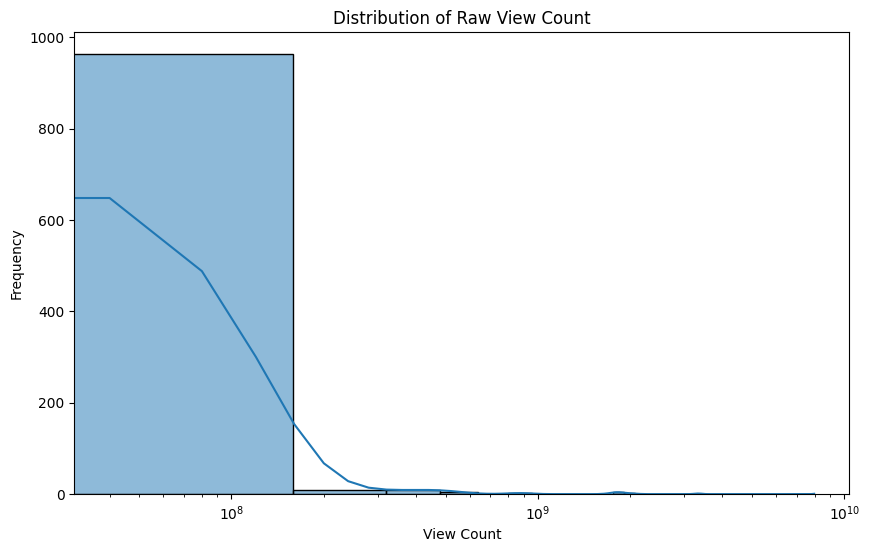

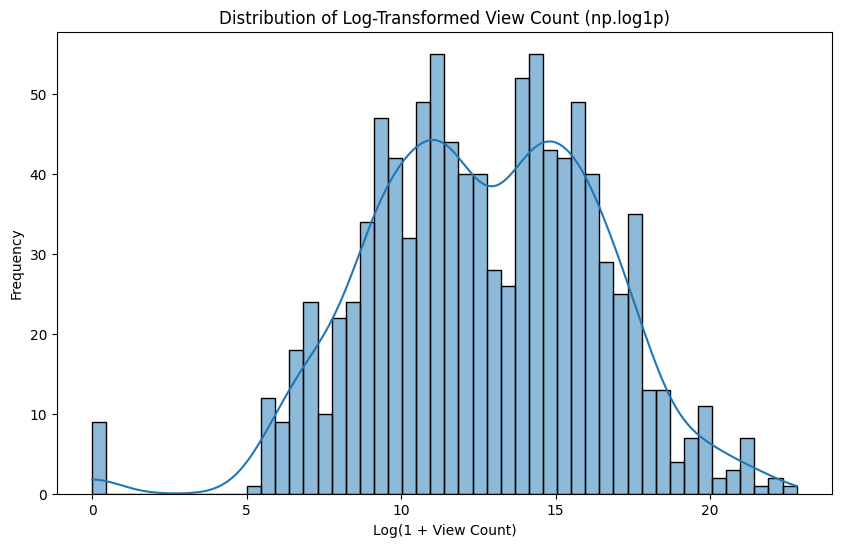

Original View Count descriptive statistics:


,view_count
count,1.000000e+03
mean,4.671539e+07
std,3.426310e+08
min,0.000000e+00
25%,2.211625e+04
50%,3.008230e+05
75%,5.121081e+06
max,7.966443e+09



Log-Transformed View Count descriptive statistics:


,log_view_count
count,1000.000000
mean,12.682211
std,3.669522
min,0.000000
25%,10.004109
50%,12.614274
75%,15.448872
max,22.798504


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analyze the distribution of the raw view_count
plt.figure(figsize=(10, 6))
sns.histplot(videos_df_copy['view_count'], bins=50, kde=True)
plt.title('Distribution of Raw View Count')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.xscale('log') # Use log scale for better visualization of skewed data
plt.show()

# Analyze the distribution after logarithmic transformation
# Use np.log1p which is log(1+x) to handle zero values
videos_df_copy['log_view_count'] = np.log1p(videos_df_copy['view_count'])

plt.figure(figsize=(10, 6))
sns.histplot(videos_df_copy['log_view_count'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed View Count (np.log1p)')
plt.xlabel('Log(1 + View Count)')
plt.ylabel('Frequency')
plt.show()

print("Original View Count descriptive statistics:")
display(videos_df_copy['view_count'].describe())

print("\nLog-Transformed View Count descriptive statistics:")
display(videos_df_copy['log_view_count'].describe())

In [33]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas to work with DataFrame columns

# Identify all numerical columns to be used as features for supervised learning
# Exclude original columns that are not features (like ids, text, original counts)
# Crucially, exclude both 'view_count' and 'views_per_subs' as per user's instruction to avoid target leakage
# Also exclude 'log_view_count' and the 'performance_category' dummy columns as they are target-derived.
# Include engineered numerical features: RQS components (excluding views_per_subs),
# RQS, thumbnail features (face, color), text embeddings, channel_subs.

# List of columns to exclude from the numerical features for supervised learning
exclude_cols_supervised = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'view_count', 'views_per_subs', # Exclude both primary target variables
    'log_view_count', # Exclude log-transformed target
    'like_count', 'comment_count', # Exclude original counts as their ratios are used, or they are part of target derivation
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb', # Exclude original complex feature columns
    # Exclude performance_category dummy columns as they are target-derived
    'performance_category_bottom_performer',
    'performance_category_random_sample',
    'performance_category_top_performer'
]

# Get all numerical columns that are simple scalars (not lists or arrays within the column)
numerical_scalar_cols = [
    col for col in videos_df_copy.columns
    if pd.api.types.is_numeric_dtype(videos_df_copy[col]) and videos_df_copy[col].ndim == 1
]

# Filter out the excluded columns to get the final list of feature names for supervised learning
# Ensure we are not excluding columns that are part of the RQS components but are not views_per_subs, like like_ratio and comment_ratio
features_for_supervised_learning = [
    col for col in numerical_scalar_cols
    if col not in exclude_cols_supervised
]

# Create the feature matrix X_supervised using the selected columns
# Use .loc to ensure column order is based on features_for_supervised_learning
X_supervised = videos_df_copy.loc[:, features_for_supervised_learning]

# Handle any remaining potential NaN values in the feature matrix
X_supervised = X_supervised.fillna(0) # Fill NaN with 0 for simplicity

# Initialize the StandardScaler
scaler_supervised = StandardScaler()

# Scale the feature matrix for supervised learning
X_supervised_scaled = scaler_supervised.fit_transform(X_supervised)


# Create the feature names list for Views per Subscriber prediction
# This is the same as features_for_supervised_learning since both view_count and views_per_subs are excluded
features_for_vps_prediction = features_for_supervised_learning
# The scaled feature matrix for VPS prediction is the same as for views prediction
X_supervised_vps = X_supervised_scaled


# Define the target variables
y_views = videos_df_copy['view_count']
y_views_per_subs = videos_df_copy['views_per_subs']
# Also define the log-transformed views target
y_log_views = videos_df_copy['log_view_count'] # Assuming log_view_count was created earlier


print(f"Prepared a feature matrix for Supervised Learning with shape: {X_supervised_scaled.shape}")
print(f"Features used for Supervised Learning (both views and VPS): {features_for_supervised_learning[:10]}...") # Displaying first 10 feature names
print(f"\nTarget variable for Raw Views: 'view_count'")
print(f"Target variable for Views per Subscriber: 'views_per_subs'")
print(f"Target variable for Log-Transformed Views: 'log_view_count'")

Prepared a feature matrix for Supervised Learning with shape: (1000, 1186)
Features used for Supervised Learning (both views and VPS): ['channel_subs', 'like_ratio', 'comment_ratio', 'average_comment_length', 'sentiment_score', 'rqs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2']...

Target variable for Raw Views: 'view_count'
Target variable for Views per Subscriber: 'views_per_subs'
Target variable for Log-Transformed Views: 'log_view_count'


In [34]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X_supervised and the target variables y_views and y_views_per_subs
# Assuming X_scaled (from clustering preparation) is the feature matrix for supervised learning
# and 'view_count' and 'views_per_subs' are the target variables from videos_df_copy.

# X_supervised is now the single feature set excluding both view_count and views_per_subs
# X_supervised is already scaled as X_supervised_scaled from the previous cell (409866da)
X_supervised = X_supervised_scaled # Use the single scaled feature set

y_views = videos_df_copy['view_count']
y_views_per_subs = videos_df_copy['views_per_subs']

# Split the data for predicting views
X_train_views, X_test_views, y_train_views, y_test_views = train_test_split(
    X_supervised, y_views, test_size=0.2, random_state=42
)

# Split the data for predicting views per subscriber
# Use the same corrected feature set X_supervised
X_train_vps, X_test_vps, y_train_vps, y_test_vps = train_test_split(
    X_supervised, y_views_per_subs, test_size=0.2, random_state=42
)

print("Data split into training and testing sets for both target variables.")
print(f"Shape of X_train_views: {X_train_views.shape}")
print(f"Shape of y_train_views: {y_train_views.shape}")
print(f"Shape of X_test_views: {X_test_views.shape}")
print(f"Shape of y_test_views: {y_test_views.shape}")
print(f"Shape of X_train_vps: {X_train_vps.shape}")
print(f"Shape of y_train_vps: {y_train_vps.shape}")
print(f"Shape of X_test_vps: {X_test_vps.shape}")
print(f"Shape of y_test_vps: {y_test_vps.shape}")

Data split into training and testing sets for both target variables.
Shape of X_train_views: (800, 1186)
Shape of y_train_views: (800,)
Shape of X_test_views: (200, 1186)
Shape of y_test_views: (200,)
Shape of X_train_vps: (800, 1186)
Shape of y_train_vps: (800,)
Shape of X_test_vps: (200, 1186)
Shape of y_test_vps: (200,)


# 9. Unsupervised Learning - PCA and K-Means Clustering

In [35]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- Create and Scale Features for Clustering (Final Version) ---

# 1. Define columns to EXCLUDE.
#    CORRECTED: We now EXCLUDE the raw 'view_count' and INCLUDE 'log_view_count'.
exclude_cols_clustering = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb',
    'view_count' # Exclude the raw, skewed view count
]

# 2. Select all columns that are purely numerical
numerical_cols = videos_df_copy.select_dtypes(include=np.number).columns.tolist()

# 3. Filter out the excluded columns to get the final feature list for clustering
features_for_clustering = [
    col for col in numerical_cols if col not in exclude_cols_clustering
]

# 4. Create the feature matrix for clustering
X_clustering = videos_df_copy[features_for_clustering]

# 5. Handle any potential missing values
X_clustering = X_clustering.fillna(0)

# 6. Initialize the StandardScaler and create the X_scaled variable
scaler_clustering = StandardScaler()
X_scaled = scaler_clustering.fit_transform(X_clustering)

print("Successfully created and scaled the feature matrix for clustering.")
print(f"Shape of X_scaled: {X_scaled.shape}")
print("\nFeatures included in clustering (first 15):")
# This should now include 'log_view_count' instead of 'view_count'
print(features_for_clustering[:15])

Successfully created and scaled the feature matrix for clustering.
Shape of X_scaled: (1000, 1190)

Features included in clustering (first 15):
['like_count', 'comment_count', 'channel_subs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'average_comment_length', 'sentiment_score', 'rqs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2', 'dominant_color_3', 'dominant_color_4']


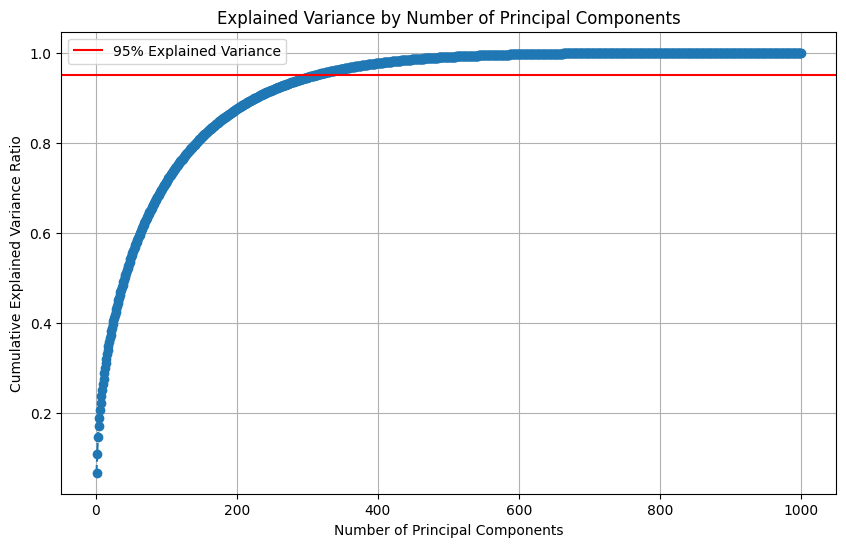

Explained variance ratio for the first 10 components:


array([0.0673494 , 0.04074029, 0.03898628, 0.02303105, 0.01965216,
       0.01659292, 0.01594436, 0.01519245, 0.01389241, 0.0127018 ])


Number of components needed to explain 95% of variance: 311


In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
# We'll start by fitting PCA on the entire number of features to analyze explained variance
pca = PCA()

# Fit PCA on the scaled feature matrix
pca.fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance by number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend()
plt.show()

# Display the explained variance ratio for the first few components
print("Explained variance ratio for the first 10 components:")
display(pca.explained_variance_ratio_[:10])

# Find the number of components needed to explain a certain percentage of variance (e.g., 95%)
n_components_95_variance = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNumber of components needed to explain 95% of variance: {n_components_95_variance}")

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Re-initialize PCA with the desired number of components (113)
n_components = 311
pca = PCA(n_components=n_components)

# Apply PCA to the scaled feature matrix
X_pca = pca.fit_transform(X_scaled)

print(f"Applied PCA, reduced feature matrix shape: (233, {n_components})") # Corrected print statement

# Apply K-Means clustering to the PCA-reduced data
n_clusters = 5 # Based on the number of genres
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Explicitly set n_init
cluster_labels = kmeans.fit_predict(X_pca)

# Add the cluster labels to the DataFrame copy
videos_df_copy['kmeans_cluster_label'] = cluster_labels

# Display the first few rows with the new cluster labels
# Check if 'genre' and 'performance_category' are in videos_df_copy before displaying
display_cols = ['title', 'kmeans_cluster_label']
if 'genre' in videos_df_copy.columns:
    display_cols.insert(1, 'genre') # Add genre after title if it exists
if 'performance_category' in videos_df_copy.columns:
     # Find the index where 'genre' was inserted, or insert after 'title' if 'genre' wasn't there
    try:
        genre_idx = display_cols.index('genre')
        display_cols.insert(genre_idx + 1, 'performance_category')
    except ValueError: # 'genre' wasn't in display_cols
        display_cols.insert(1, 'performance_category')


display(videos_df_copy[display_cols].head())


# Display the count of videos in each cluster
display(videos_df_copy['kmeans_cluster_label'].value_counts())

Applied PCA, reduced feature matrix shape: (233, 311)


,title,kmeans_cluster_label
0,VeggieTales: The Hairbrush Song - Silly Song,1
1,VeggieTales: His Cheeseburger - Silly Song,1
2,VeggieTales | Noah's Ark,1
3,VeggieTales: Song of the Cebu | Silly Songs wi...,1
4,VeggieTales: The Pirates Who Don't Do Anything...,1


,count
kmeans_cluster_label,
2,449
0,177
1,176
4,159
3,39


In [38]:
# Analyze the characteristics of each cluster by grouping by 'kmeans_cluster_label'

# Select a subset of interpretable numerical features to analyze per cluster
interpretable_numerical_features = [
    'rqs', 'like_ratio', 'comment_ratio', 'views_per_subs',
    'sentiment_score', 'average_comment_length', 'face_area_percentage',
    'average_r', 'average_g', 'average_b'
    # We can add dimensions of embeddings or flattened colors later if needed, but it's less directly interpretable
]

# Calculate the mean of these features for each cluster
print("Mean of interpretable numerical features per cluster:")
# Ensure 'kmeans_cluster_label' and the features exist in the DataFrame
interpretable_numerical_features_check = [col for col in interpretable_numerical_features if col in videos_df_copy.columns]
if 'kmeans_cluster_label' in videos_df_copy.columns and interpretable_numerical_features_check:
    display(videos_df_copy.groupby('kmeans_cluster_label')[interpretable_numerical_features_check].mean())
else:
    print("Clustering results or interpretable features not available in videos_df_copy.")


print("\nDistribution of performance categories within each cluster:")
# Ensure 'performance_category' is in videos_df_copy before trying to group by it
if 'performance_category' in videos_df_copy.columns:
     display(videos_df_copy.groupby('kmeans_cluster_label')['performance_category'].value_counts().unstack().fillna(0))
else:
    print("'performance_category' column not found in videos_df_copy. Skipping performance category distribution analysis.")

# Optional: You might also want to display sample titles from each cluster to get a qualitative sense
# print("\nSample titles from each cluster:")
# for cluster_id in sorted(videos_df_copy['kmeans_cluster_label'].unique()):
#     print(f"\nCluster {cluster_id}:")
#     sample_titles = videos_df_copy[videos_df_copy['kmeans_cluster_label'] == cluster_id]['title'].sample(min(5, len(videos_df_copy[videos_df_copy['kmeans_cluster_label'] == cluster_id])), random_state=42)
#     for title in sample_titles:
#         print(f"- {title}")

Mean of interpretable numerical features per cluster:


,rqs,like_ratio,comment_ratio,views_per_subs,sentiment_score,average_comment_length,face_area_percentage,average_r,average_g,average_b
kmeans_cluster_label,,,,,,,,,,
0,0.161129,0.160332,0.018434,0.011946,0.601359,0.161518,2.927718,82.314328,76.986657,75.682997
1,0.099529,0.022915,0.000075,0.062667,0.510971,0.003274,1.485361,116.358304,110.420203,102.117899
2,0.155747,0.152093,0.013102,0.012654,0.611658,0.125866,4.439539,93.718867,87.947118,82.869676
3,0.182201,0.162496,0.008367,0.017298,0.749012,0.151021,1.913833,109.453143,105.455425,102.260556
4,0.225938,0.282367,0.065563,0.014733,0.679477,0.225104,7.234732,87.175445,74.221232,66.689866



Distribution of performance categories within each cluster:
'performance_category' column not found in videos_df_copy. Skipping performance category distribution analysis.


Shape of X_pca: (1000, 311)
Shape of videos_df_copy index: (1000,)
Shape of cluster_labels: (1000,)
Successfully added PCA components and cluster labels to videos_df_copy.


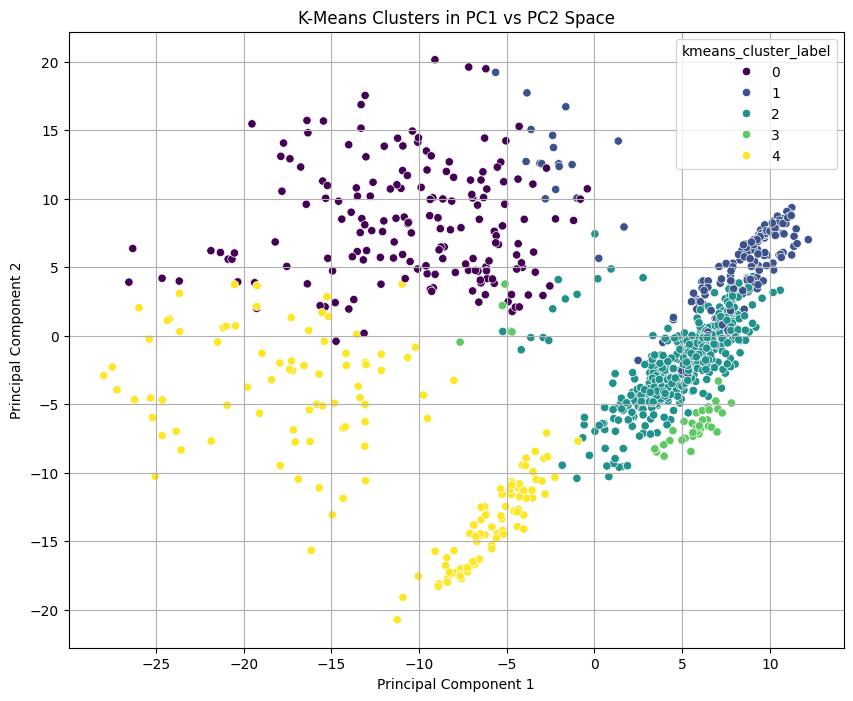

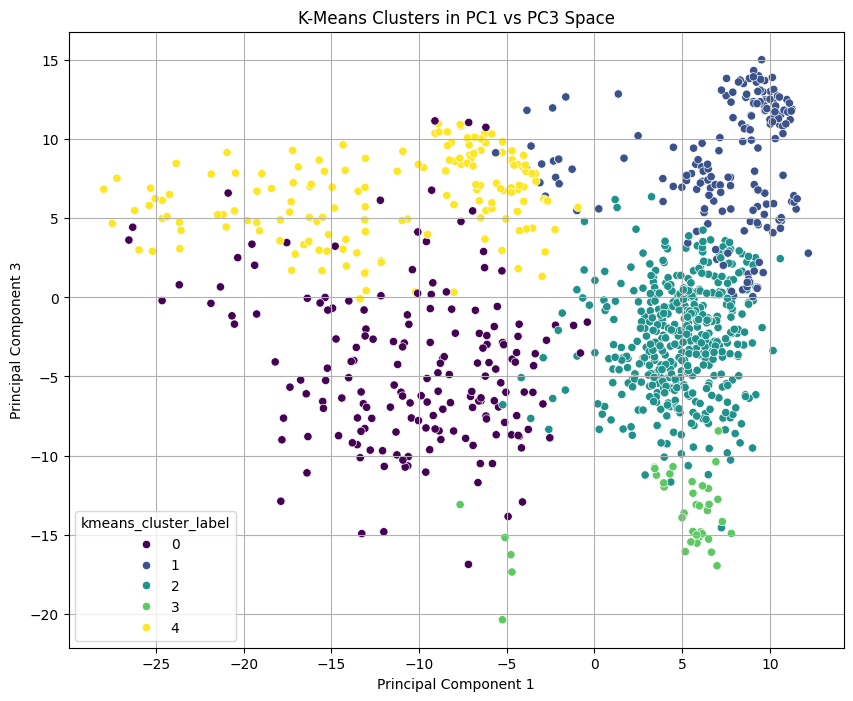

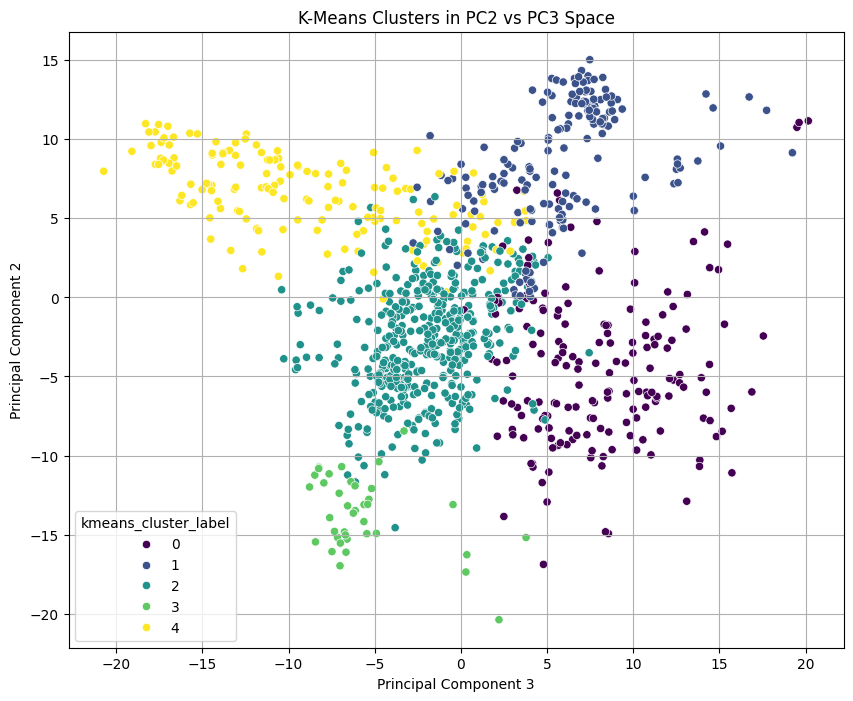

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas
import numpy as np # Import numpy

# Ensure X_pca and cluster_labels are defined (from the clustering step)
# If the execution state was reset, you would need to rerun the PCA and K-Means clustering cell first.
# Assuming X_pca (PCA-reduced data) and cluster_labels (K-Means labels) are available.

# Check the shape of X_pca before creating the DataFrame
print(f"Shape of X_pca: {X_pca.shape}")
print(f"Shape of videos_df_copy index: {videos_df_copy.index.shape}")
# Check the shape of cluster_labels
print(f"Shape of cluster_labels: {cluster_labels.shape}")


# Ensure X_pca is a numpy array
X_pca = np.asarray(X_pca)

# Create a pandas Series for cluster_labels with the same index as videos_df_copy
# This ensures proper alignment with the PCA components
cluster_labels_series = pd.Series(cluster_labels, index=videos_df_copy.index, name='kmeans_cluster_label')

# Add PCA components to the videos_df_copy DataFrame for easier plotting
# Create column names for the PCA components
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, index=videos_df_copy.index, columns=pca_cols)

# Concatenate PCA components and the cluster labels Series with videos_df_copy
# Preserve existing columns in videos_df_copy
# Drop existing PC columns before concatenating to avoid duplicates if the cell is run multiple times
existing_pc_cols = [col for col in videos_df_copy.columns if col.startswith('PC')]
videos_df_copy = videos_df_copy.drop(columns=existing_pc_cols, errors='ignore')
# Drop existing kmeans_cluster_label column before concatenating
videos_df_copy = videos_df_copy.drop(columns=['kmeans_cluster_label'], errors='ignore')


videos_df_copy = pd.concat([videos_df_copy, pca_df, cluster_labels_series], axis=1)

print("Successfully added PCA components and cluster labels to videos_df_copy.")


# Visualize the clusters in the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC1 vs PC2 Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Visualize the clusters in PC1 vs PC3 space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC3', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC1 vs PC3 Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.grid(True)
plt.show()

# Visualize the clusters in PC2 vs PC3 space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC2 vs PC3 Space')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 3')
plt.grid(True)
plt.show()

In [40]:
import pandas as pd

# Assuming 'pca' is your fitted PCA object and
# 'features_for_clustering' is the list of your original feature names before scaling.

# 1. Create a DataFrame of the PCA loadings
# The pca.components_ attribute has a shape of (n_components, n_features)
loadings_df = pd.DataFrame(
    pca.components_.T, # Transpose to make features as rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features_for_clustering
)

# 2. Function to get and display top features for a given component
def get_top_features_for_pc(pc_name, top_n=10):
    print(f"--- Top {top_n} Influential Features for {pc_name} ---")
    # Sort by the absolute value of the loading to find the most influential
    top_features = loadings_df[pc_name].abs().sort_values(ascending=False).head(top_n)
    # Display the top features with their actual loading scores (not absolute)
    print(loadings_df.loc[top_features.index][[pc_name]])

# 3. Display the top features for PC1, PC2, and PC3
get_top_features_for_pc('PC1')
print("\n")
get_top_features_for_pc('PC2')
print("\n")
get_top_features_for_pc('PC3')

--- Top 10 Influential Features for PC1 ---
                               PC1
thumbnail_text_embed_223  0.087198
thumbnail_text_embed_319  0.085419
thumbnail_text_embed_62   0.083639
thumbnail_text_embed_363 -0.080817
thumbnail_text_embed_99  -0.080487
thumbnail_text_embed_125  0.080237
thumbnail_text_embed_247 -0.080109
thumbnail_text_embed_94  -0.079728
thumbnail_text_embed_327  0.078836
thumbnail_text_embed_324 -0.077953


--- Top 10 Influential Features for PC2 ---
                     PC2
tags_embed_62   0.082729
tags_embed_2    0.081763
tags_embed_147  0.079647
tags_embed_295  0.079618
tags_embed_280  0.078947
tags_embed_259 -0.077875
tags_embed_261 -0.077466
tags_embed_293 -0.075695
tags_embed_343  0.072591
tags_embed_164 -0.072422


--- Top 10 Influential Features for PC3 ---
                     PC3
tags_embed_377  0.096272
tags_embed_24  -0.092222
tags_embed_132  0.088364
tags_embed_173  0.087960
tags_embed_211  0.086939
tags_embed_292  0.085382
tags_embed_90  -0.085337
tags

In [41]:
import pandas as pd

# Assuming 'pca', 'features_for_clustering', and 'videos_df_copy' are already defined.

# 1. Create a DataFrame of the PCA loadings (same as before)
loadings_df = pd.DataFrame(
    pca.components_.T, # Transpose to make features as rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features_for_clustering
)

# 2. Modified function to show influential features AND their representative text
def investigate_pc_loadings(pc_name, top_n=5, examples_per_feature=3):
    """
    Finds top influential features for a PC and shows example text from videos
    that score high on those features.
    """
    print(f"--- Investigating Top {top_n} Influential Features for {pc_name} ---")

    # Get the top N most influential features by absolute loading
    top_features_series = loadings_df[pc_name].abs().sort_values(ascending=False).head(top_n)

    # Loop through each of the top influential features
    for feature_name, abs_loading in top_features_series.items():
        loading = loadings_df.loc[feature_name, pc_name]
        print(f"\nFeature: {feature_name} (Loading: {loading:.4f})")

        # Determine which text column to show based on the feature name
        if 'thumbnail_text_embed' in feature_name:
            text_column = 'thumbnail_text'
        elif 'tags_embed' in feature_name:
            text_column = 'tags'
        elif 'title_embed' in feature_name:
            text_column = 'title'
        else:
            print("  (This is a numerical feature, not a text embedding.)")
            continue

        # Find videos with the highest values for this specific embedding feature
        top_videos = videos_df_copy.sort_values(by=feature_name, ascending=False).head(examples_per_feature)

        print(f"  Example text from videos with high values for this feature:")
        for index, row in top_videos.iterrows():
            # Use .get() to handle potential missing text gracefully
            example_text = row.get(text_column, "N/A")
            print(f"    - '{example_text}'")

# 3. Display the analysis for PC1, PC2, and PC3
investigate_pc_loadings('PC1')
print("\n" + "="*50 + "\n")
investigate_pc_loadings('PC2')
print("\n" + "="*50 + "\n")
investigate_pc_loadings('PC3')

--- Investigating Top 5 Influential Features for PC1 ---

Feature: thumbnail_text_embed_223 (Loading: 0.0872)
  Example text from videos with high values for this feature:
    - 'nan'
    - 'nan'
    - 'nan'

Feature: thumbnail_text_embed_319 (Loading: 0.0854)
  Example text from videos with high values for this feature:
    - 'BLACK HOLE

co = SOLAR
SYSTEM'
    - 'nan'
    - 'nan'

Feature: thumbnail_text_embed_62 (Loading: 0.0836)
  Example text from videos with high values for this feature:
    - 'RUIN
EVERYTHING
FOR MONEY

A 2'
    - 'WHAT DO
THEY WANT?'
    - 'YOU SHOULD
Le a Led'

Feature: thumbnail_text_embed_363 (Loading: -0.0808)
  Example text from videos with high values for this feature:
    - '‘ js th
si cL

UP WHEN
YOU FALL'
    - 'YOU SHOULD
Le a Led'
    - 'PRAY WITH US:
THE HOLY

ROSARY'

Feature: thumbnail_text_embed_99 (Loading: -0.0805)
  Example text from videos with high values for this feature:
    - 'll'
    - 'Uses'
    - 'OUT'


--- Investigating Top 5 Influen

# 10. Supervised Learning - Model Training and Evaluation

Gradient Boosting Regressors (e.g., GradientBoostingRegressor, XGBoost, LightGBM): These are powerful ensemble methods that often yield high accuracy.

Random Forest Regressor: Another robust ensemble method that can handle complex relationships.

Support Vector Regressor (SVR): Can be effective, especially with non-linear data, though can be sensitive to scaling and kernel choice.

Neural Networks: Deep learning models can capture very complex patterns if you have a large enough dataset and computational resources.

In [42]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- Corrected Feature Selection for Supervised Learning ---

# 1. Get ALL numerical columns from your DataFrame FIRST
numerical_cols = videos_df_copy.select_dtypes(include=np.number).columns.tolist()

# 2. Define the static list of columns to EXCLUDE
exclude_cols_static = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'view_count', 'views_per_subs', # Exclude both primary target variables
    'log_view_count', # Exclude log-transformed target
    'like_ratio', 'comment_ratio', # Exclude ratios
    'RQS', # excluded to prevent data leakage
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb', # Exclude original complex features
    'performance_category_bottom_performer',
    'performance_category_random_sample',
    'performance_category_top_performer'
]

# 3. Dynamically find all Principal Component (PC) columns
pc_columns = [col for col in videos_df_copy.columns if col.startswith('PC')]

# 4. Combine all columns to be excluded
exclude_cols_supervised = exclude_cols_static + pc_columns + ['kmeans_cluster_label']

# 5. Create the final feature list by removing the excluded columns from the full list
features_for_supervised = [
    col for col in numerical_cols if col not in exclude_cols_supervised
]

# 6. Create the full feature matrix
X_supervised = videos_df_copy[features_for_supervised].fillna(0)

# 7. Scale the features
scaler_supervised = StandardScaler()
X_supervised_scaled = scaler_supervised.fit_transform(X_supervised)

print("Re-created the supervised feature matrix with a better feature set.")
print(f"Shape of the new feature matrix: {X_supervised_scaled.shape}")
print("\nIncluded features (first 15):")
print(features_for_supervised[:15])

Re-created the supervised feature matrix with a better feature set.
Shape of the new feature matrix: (1000, 1186)

Included features (first 15):
['like_count', 'comment_count', 'channel_subs', 'average_comment_length', 'sentiment_score', 'rqs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2', 'dominant_color_3', 'dominant_color_4', 'dominant_color_5', 'dominant_color_6', 'dominant_color_7']


In [43]:
print(features_for_supervised[:])

['like_count', 'comment_count', 'channel_subs', 'average_comment_length', 'sentiment_score', 'rqs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2', 'dominant_color_3', 'dominant_color_4', 'dominant_color_5', 'dominant_color_6', 'dominant_color_7', 'dominant_color_8', 'palette_color_0', 'palette_color_1', 'palette_color_2', 'palette_color_3', 'palette_color_4', 'palette_color_5', 'palette_color_6', 'palette_color_7', 'palette_color_8', 'palette_color_9', 'palette_color_10', 'palette_color_11', 'palette_color_12', 'palette_color_13', 'palette_color_14', 'average_r', 'average_g', 'average_b', 'title_embed_0', 'title_embed_1', 'title_embed_2', 'title_embed_3', 'title_embed_4', 'title_embed_5', 'title_embed_6', 'title_embed_7', 'title_embed_8', 'title_embed_9', 'title_embed_10', 'title_embed_11', 'title_embed_12', 'title_embed_13', 'title_embed_14', 'title_embed_15', 'title_embed_16', 'title_embed_17', 'title_embed_18', 'title_embed_19', 'title_embed_20',

In [44]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Gradient Boosting Regressor ---

print("--- Training and Evaluating Gradient Boosting Regressor ---")

# Model for predicting Views
print("\nPredicting Raw Views:")
gbr_views = GradientBoostingRegressor(random_state=42)
gbr_views.fit(X_train_views, y_train_views)
y_pred_views_gbr = gbr_views.predict(X_test_views)

# Evaluate Views model
mae_views_gbr = mean_absolute_error(y_test_views, y_pred_views_gbr)
mse_views_gbr = mean_squared_error(y_test_views, y_pred_views_gbr)
rmse_views_gbr = np.sqrt(mse_views_gbr)
r2_views_gbr = r2_score(y_test_views, y_pred_views_gbr)

print(f"  MAE: {mae_views_gbr:.2f}")
print(f"  MSE: {mse_views_gbr:.2f}")
print(f"  RMSE: {rmse_views_gbr:.2f}")
print(f"  R-squared: {r2_views_gbr:.4f}")


# Model for predicting Views per Subscriber
print("\nPredicting Views per Subscriber:")
gbr_vps = GradientBoostingRegressor(random_state=42)
gbr_vps.fit(X_train_vps, y_train_vps)
y_pred_vps_gbr = gbr_vps.predict(X_test_vps)

# Evaluate Views per Subscriber model
mae_vps_gbr = mean_absolute_error(y_test_vps, y_pred_vps_gbr)
mse_vps_gbr = mean_squared_error(y_test_vps, y_pred_vps_gbr)
rmse_vps_gbr = np.sqrt(mse_vps_gbr)
r2_vps_gbr = r2_score(y_test_vps, y_pred_vps_gbr)

print(f"  MAE: {mae_vps_gbr:.4f}")
print(f"  MSE: {mse_vps_gbr:.4f}")
print(f"  RMSE: {rmse_vps_gbr:.4f}")
print(f"  R-squared: {r2_vps_gbr:.4f}")


print("\n--- Training and Evaluating Random Forest Regressor ---")

# Model for predicting Views
print("\nPredicting Raw Views:")
rf_views = RandomForestRegressor(random_state=42)
rf_views.fit(X_train_views, y_train_views)
y_pred_views_rf = rf_views.predict(X_test_views)

# Evaluate Views model
mae_views_rf = mean_absolute_error(y_test_views, y_pred_views_rf)
mse_views_rf = mean_squared_error(y_test_views, y_pred_views_rf)
rmse_views_rf = np.sqrt(mse_views_rf)
r2_views_rf = r2_score(y_test_views, y_pred_views_rf)

print(f"  MAE: {mae_views_rf:.2f}")
print(f"  MSE: {mse_views_rf:.2f}")
print(f"  RMSE: {rmse_views_rf:.2f}")
print(f"  R-squared: {r2_views_rf:.4f}")


# Model for predicting Views per Subscriber
print("\nPredicting Views per Subscriber:")
rf_vps = RandomForestRegressor(random_state=42)
rf_vps.fit(X_train_vps, y_train_vps)
y_pred_vps_rf = rf_vps.predict(X_test_vps)

# Evaluate Views per Subscriber model
mae_vps_rf = mean_absolute_error(y_test_vps, y_pred_vps_rf)
mse_vps_rf = mean_squared_error(y_test_vps, y_pred_vps_rf)
rmse_vps_rf = np.sqrt(mse_vps_rf)
r2_vps_rf = r2_score(y_test_vps, y_pred_vps_rf)

print(f"  MAE: {mae_vps_rf:.4f}")
print(f"  MSE: {mse_vps_rf:.4f}")
print(f"  RMSE: {rmse_vps_rf:.4f}")
print(f"  R-squared: {r2_vps_rf:.4f}")

--- Training and Evaluating Gradient Boosting Regressor ---

Predicting Raw Views:
  MAE: 74182253.40
  MSE: 265302440632898848.00
  RMSE: 515075179.59
  R-squared: 0.2890

Predicting Views per Subscriber:
  MAE: 0.0203
  MSE: 0.0029
  RMSE: 0.0535
  R-squared: -0.0886

--- Training and Evaluating Random Forest Regressor ---

Predicting Raw Views:
  MAE: 80251762.61
  MSE: 255964019872304736.00
  RMSE: 505928868.39
  R-squared: 0.3140

Predicting Views per Subscriber:
  MAE: 0.0261
  MSE: 0.0032
  RMSE: 0.0563
  R-squared: -0.2086


In [45]:
%pip install tensorflow

Now that TensorFlow is installed, we can define, compile, train, and evaluate a simple feedforward neural network for predicting views.

In [46]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Neural Network Model for Predicting Raw Views ---

print("--- Training and Evaluating Neural Network Regressor (Views) ---")

# Define a simple feedforward neural network model
model_views = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_views.shape[1],)), # Input layer
    keras.layers.Dropout(0.2), # Dropout for regularization
    keras.layers.Dense(64, activation='relu'), # Hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'), # Hidden layer
    keras.layers.Dense(1) # Output layer for regression (predicting a single value)
])

# Compile the model
model_views.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Adam optimizer and Mean Squared Error loss

# Train the model
print("Training Views model...")
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
history_views = model_views.fit(
    tf.constant(X_train_views, dtype=tf.float32),
    tf.constant(y_train_views, dtype=tf.float32),
    epochs=50, # Number of training epochs, can be tuned
    batch_size=32, # Batch size, can be tuned
    validation_split=0.2, # Use 20% of training data for validation
    verbose=0 # Set to 1 or 2 to see training progress
)
print("Views model training complete.")


# Evaluate the model on the test data
print("\nEvaluating Views model on test data:")
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
loss_views, mae_views_nn = model_views.evaluate(
    tf.constant(X_test_views, dtype=tf.float32),
    tf.constant(y_test_views, dtype=tf.float32),
    verbose=0
)
mse_views_nn = loss_views # For MSE loss
rmse_views_nn = np.sqrt(mse_views_nn)

# Make predictions for R-squared calculation
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
y_pred_views_nn = model_views.predict(tf.constant(X_test_views, dtype=tf.float32)).flatten()
r2_views_nn = r2_score(y_test_views, y_pred_views_nn) # Use original y_test_views for evaluation


print(f"  MAE: {mae_views_nn:.2f}")
print(f"  MSE: {mse_views_nn:.2f}")
print(f"  RMSE: {rmse_views_nn:.2f}")
print(f"  R-squared: {r2_views_nn:.4f}")


# --- Neural Network Model for Predicting Views per Subscriber ---

print("\n--- Training and Evaluating Neural Network Regressor (Views per Subscriber) ---")

# Define a simple feedforward neural network model for VPS
model_vps = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_vps.shape[1],)), # Input layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'), # Hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'), # Hidden layer
    keras.layers.Dense(1) # Output layer
])

# Compile the model
model_vps.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Adam optimizer and Mean Squared Error loss

# Train the model
print("Training Views per Subscriber model...")
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
history_vps = model_vps.fit(
    tf.constant(X_train_vps, dtype=tf.float32),
    tf.constant(y_train_vps, dtype=tf.float32),
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)
print("Views per Subscriber model training complete.")


# Evaluate the model on the test data
print("\nEvaluating Views per Subscriber model on test data:")
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
loss_vps, mae_vps_nn = model_vps.evaluate(
    tf.constant(X_test_vps, dtype=tf.float32),
    tf.constant(y_test_vps, dtype=tf.float32),
    verbose=0
)
mse_vps_nn = loss_vps
rmse_vps_nn = np.sqrt(mse_vps_nn)

# Make predictions for R-squared calculation
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
y_pred_vps_nn = model_vps.predict(tf.constant(X_test_vps, dtype=tf.float32)).flatten()
r2_vps_nn = r2_score(y_test_vps, y_pred_vps_nn) # Use original y_test_vps for evaluation


print(f"  MAE: {mae_vps_nn:.4f}")
print(f"  MSE: {mse_vps_nn:.4f}")
print(f"  RMSE: {rmse_vps_nn:.4f}")
print(f"  R-squared: {r2_vps_nn:.4f}")

--- Training and Evaluating Neural Network Regressor (Views) ---
Training Views model...
Views model training complete.

Evaluating Views model on test data:
7/7 [==============================] - 0s 2ms/step
  MAE: 75777488.00
  MSE: 368731875893575680.00
  RMSE: 607232966.74
  R-squared: 0.0118

--- Training and Evaluating Neural Network Regressor (Views per Subscriber) ---
Training Views per Subscriber model...
Views per Subscriber model training complete.

Evaluating Views per Subscriber model on test data:
7/7 [==============================] - 0s 2ms/step
  MAE: 0.0208
  MSE: 0.0027
  RMSE: 0.0524
  R-squared: -0.0443


In [47]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assume 'videos_df_copy' is your pre-loaded and processed DataFrame

# --- Step 1: Prepare the Data for Predicting View Count ---

# Define the features to EXCLUDE. This list prevents data leakage.
exclude_cols_for_view_prediction = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb',

    # --- CRITICAL: Exclude target and all post-publication metrics derived from it ---
    'view_count',           # The target variable itself
    'log_view_count',       # The log-transformed target
    'like_ratio',           # Derived from view_count
    'comment_ratio',        # Derived from view_count
    'views_per_subs',       # Derived from view_count
    'rqs',                  # Derived from view_count
    'like_count',           # A direct outcome, highly correlated with views
    'comment_count'         # A direct outcome, highly correlated with views
]

# Dynamically find and add any PC or cluster label columns to the exclusion list
pc_columns = [col for col in videos_df_copy.columns if col.startswith('PC')]
cluster_column = ['kmeans_cluster_label']
exclude_cols_for_view_prediction.extend(pc_columns)
exclude_cols_for_view_prediction.extend(cluster_column)

# Create the feature matrix (X)
all_numerical_cols = videos_df_copy.select_dtypes(include=np.number).columns.tolist()
features_for_views = [col for col in all_numerical_cols if col not in exclude_cols_for_view_prediction]
X_views = videos_df_copy[features_for_views].fillna(0)

# Define the target variable (y)
y_views = videos_df_copy['view_count']

# --- Step 2: Split the Data BEFORE Scaling ---
X_train_views, X_test_views, y_train_views, y_test_views = train_test_split(
    X_views, y_views, test_size=0.2, random_state=42
)

print("--- Data Preparation and Split Complete for View Count Prediction ---")


# --- Step 3: Create the Scikit-Learn Pipeline ---
pipeline_views = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])


# --- Step 4: Hyperparameter Tuning with the Pipeline ---

print("\n--- Starting Hyperparameter Tuning for View Count Pipeline ---")

# Define the parameter grid to search
param_grid_views = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

# Initialize RandomizedSearchCV with the pipeline
views_random_search = RandomizedSearchCV(
    estimator=pipeline_views,
    param_distributions=param_grid_views,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
views_random_search.fit(X_train_views, y_train_views)

# Get the best parameters
print("\nBest parameters found for View Count model:")
print(views_random_search.best_params_)


# --- Step 5: Evaluate the Best Pipeline Found by the Search ---

print("\n--- Evaluating the Tuned View Count Pipeline Model ---")

best_pipeline_views = views_random_search.best_estimator_
y_pred_views_tuned = best_pipeline_views.predict(X_test_views)

# Calculate all performance metrics
mae_tuned_views = mean_absolute_error(y_test_views, y_pred_views_tuned)
rmse_tuned_views = np.sqrt(mean_squared_error(y_test_views, y_pred_views_tuned))
r2_tuned_views = r2_score(y_test_views, y_pred_views_tuned)

print(f"  MAE: {mae_tuned_views:.2f}")
print(f"  RMSE: {rmse_tuned_views:.2f}")
print(f"  R-squared for Tuned View Count model: {r2_tuned_views:.4f}")


--- Data Preparation and Split Complete for View Count Prediction ---

--- Starting Hyperparameter Tuning for View Count Pipeline ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters found for View Count model:
{'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 'log2', 'regressor__max_depth': 20}

--- Evaluating the Tuned View Count Pipeline Model ---
  MAE: 89966147.62
  RMSE: 560673753.53
  R-squared for Tuned View Count model: 0.1575


#RQS

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- Step 1: Prepare the Data for Predicting RQS ---

# Define the features to EXCLUDE. This is a strict "pre-publication" list.
# We must exclude the target (RQS) and all its components.
exclude_cols_for_rqs_prediction = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb',

    # --- CRITICAL: Exclude target and all post-publication metrics ---
    'rqs',                  # The target variable itself
    'like_ratio',           # Component of RQS (post-publication)
    'comment_ratio',        # Component of RQS (post-publication)
    'views_per_subs',       # Component of RQS (post-publication)
    'sentiment_score',      # Component of RQS (post-publication)
    'average_comment_length', # Component of RQS (post-publication)
    'view_count',           # Post-publication metric
    'like_count',           # Post-publication metric
    'comment_count',        # Post-publication metric
    'log_view_count'        # Post-publication metric
]

# Dynamically find and add any PC or cluster label columns to the exclusion list
pc_columns = [col for col in videos_df_copy.columns if col.startswith('PC')]
cluster_column = ['kmeans_cluster_label']
exclude_cols_for_rqs_prediction.extend(pc_columns)
exclude_cols_for_rqs_prediction.extend(cluster_column)

# Create the feature matrix (X) with only pre-publication features
all_numerical_cols = videos_df_copy.select_dtypes(include=np.number).columns.tolist()
features_for_rqs = [col for col in all_numerical_cols if col not in exclude_cols_for_rqs_prediction]
X_rqs = videos_df_copy[features_for_rqs].fillna(0)

# Define the target variable (y)
y_rqs = videos_df_copy['rqs']

# Scale the features
scaler_rqs = StandardScaler()
X_rqs_scaled = scaler_rqs.fit_transform(X_rqs)

print("--- Data Preparation for RQS Prediction ---")
print(f"Shape of feature matrix X: {X_rqs_scaled.shape}")
print(f"Shape of target vector y: {y_rqs.shape}")
print(f"Number of features used: {len(features_for_rqs)}")
print("\nFirst 10 features being used:", features_for_rqs[:10])


# --- Step 2: Split the Data ---

X_train_rqs, X_test_rqs, y_train_rqs, y_test_rqs = train_test_split(
    X_rqs_scaled, y_rqs, test_size=0.2, random_state=42
)

print("\n--- Data Split Complete ---")


# --- Step 3: Train and Evaluate Models ---

# Gradient Boosting Regressor
print("\n--- Training and Evaluating Gradient Boosting Regressor ---")
gbr_rqs = GradientBoostingRegressor(random_state=42)
gbr_rqs.fit(X_train_rqs, y_train_rqs)
y_pred_rqs_gbr = gbr_rqs.predict(X_test_rqs)

# Evaluate model
mae_gbr = mean_absolute_error(y_test_rqs, y_pred_rqs_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test_rqs, y_pred_rqs_gbr))
r2_gbr = r2_score(y_test_rqs, y_pred_rqs_gbr)

print(f"  MAE: {mae_gbr:.4f}")
print(f"  RMSE: {rmse_gbr:.4f}")
print(f"  R-squared: {r2_gbr:.4f}")

# Random Forest Regressor
print("\n--- Training and Evaluating Random Forest Regressor ---")
rf_rqs = RandomForestRegressor(random_state=42)
rf_rqs.fit(X_train_rqs, y_train_rqs)
y_pred_rqs_rf = rf_rqs.predict(X_test_rqs)

# Evaluate model
mae_rf = mean_absolute_error(y_test_rqs, y_pred_rqs_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_rqs, y_pred_rqs_rf))
r2_rf = r2_score(y_test_rqs, y_pred_rqs_rf)

print(f"  MAE: {mae_rf:.4f}")
print(f"  RMSE: {rmse_rf:.4f}")
print(f"  R-squared: {r2_rf:.4f}")

--- Data Preparation for RQS Prediction ---
Shape of feature matrix X: (1000, 1181)
Shape of target vector y: (1000,)
Number of features used: 1181

First 10 features being used: ['channel_subs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2', 'dominant_color_3', 'dominant_color_4', 'dominant_color_5', 'dominant_color_6', 'dominant_color_7']

--- Data Split Complete ---

--- Training and Evaluating Gradient Boosting Regressor ---
  MAE: 0.0275
  RMSE: 0.0380
  R-squared: 0.6687

--- Training and Evaluating Random Forest Regressor ---
  MAE: 0.0264
  RMSE: 0.0372
  R-squared: 0.6817


In [49]:
print("\nFeatures being used:", features_for_rqs[:])


Features being used: ['channel_subs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2', 'dominant_color_3', 'dominant_color_4', 'dominant_color_5', 'dominant_color_6', 'dominant_color_7', 'dominant_color_8', 'palette_color_0', 'palette_color_1', 'palette_color_2', 'palette_color_3', 'palette_color_4', 'palette_color_5', 'palette_color_6', 'palette_color_7', 'palette_color_8', 'palette_color_9', 'palette_color_10', 'palette_color_11', 'palette_color_12', 'palette_color_13', 'palette_color_14', 'average_r', 'average_g', 'average_b', 'title_embed_0', 'title_embed_1', 'title_embed_2', 'title_embed_3', 'title_embed_4', 'title_embed_5', 'title_embed_6', 'title_embed_7', 'title_embed_8', 'title_embed_9', 'title_embed_10', 'title_embed_11', 'title_embed_12', 'title_embed_13', 'title_embed_14', 'title_embed_15', 'title_embed_16', 'title_embed_17', 'title_embed_18', 'title_embed_19', 'title_embed_20', 'title_embed_21', 'title_embed_22', 'title_embed_23', 'title

In [50]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assume 'videos_df_copy' is your pre-loaded and processed DataFrame

# --- Step 1: Prepare the Data for Predicting RQS ---

# Define the features to EXCLUDE. This is a strict "pre-publication" list.
exclude_cols_for_rqs_prediction = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb',

    # --- CRITICAL: Exclude target and all post-publication metrics ---
    'rqs',                  # The target variable itself
    'like_ratio',           # Component of RQS (post-publication)
    'comment_ratio',        # Component of RQS (post-publication)
    'views_per_subs',       # Component of RQS (post-publication)
    'sentiment_score',      # Component of RQS (post-publication)
    'average_comment_length', # Component of RQS (post-publication)
    'view_count',           # Post-publication metric
    'like_count',           # Post-publication metric
    'comment_count',        # Post-publication metric
    'log_view_count'        # Post-publication metric
]

# Dynamically find and add any PC or cluster label columns to the exclusion list
pc_columns = [col for col in videos_df_copy.columns if col.startswith('PC')]
cluster_column = ['kmeans_cluster_label']
exclude_cols_for_rqs_prediction.extend(pc_columns)
exclude_cols_for_rqs_prediction.extend(cluster_column)

# Create the feature matrix (X) with only pre-publication features
all_numerical_cols = videos_df_copy.select_dtypes(include=np.number).columns.tolist()
features_for_rqs = [col for col in all_numerical_cols if col not in exclude_cols_for_rqs_prediction]
X_rqs = videos_df_copy[features_for_rqs].fillna(0)

# Define the target variable (y)
y_rqs = videos_df_copy['rqs']

# --- Step 2: Split the Data BEFORE Scaling ---
# The pipeline will handle scaling internally to prevent data leakage.
X_train_rqs, X_test_rqs, y_train_rqs, y_test_rqs = train_test_split(
    X_rqs, y_rqs, test_size=0.2, random_state=42
)

print("--- Data Preparation and Split Complete for RQS Prediction ---")


# --- Step 3: Create the Scikit-Learn Pipeline ---
pipeline_rqs = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])


# --- Step 4: Hyperparameter Tuning with the Pipeline ---

print("\n--- Starting Hyperparameter Tuning for RQS Pipeline ---")

# Define the parameter grid to search
param_grid_rqs = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

# Initialize RandomizedSearchCV with the pipeline
rqs_random_search = RandomizedSearchCV(
    estimator=pipeline_rqs,
    param_distributions=param_grid_rqs,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
rqs_random_search.fit(X_train_rqs, y_train_rqs)

# Get the best parameters
print("\nBest parameters found for RQS model:")
print(rqs_random_search.best_params_)


# --- Step 5: Evaluate the Best Pipeline Found by the Search ---

print("\n--- Evaluating the Tuned RQS Pipeline Model ---")

best_pipeline_rqs = rqs_random_search.best_estimator_
y_pred_rqs_tuned = best_pipeline_rqs.predict(X_test_rqs)

# Calculate all performance metrics
mae_tuned_rqs = mean_absolute_error(y_test_rqs, y_pred_rqs_tuned)
rmse_tuned_rqs = np.sqrt(mean_squared_error(y_test_rqs, y_pred_rqs_tuned))
r2_tuned_rqs = r2_score(y_test_rqs, y_pred_rqs_tuned)

print(f"  MAE: {mae_tuned_rqs:.4f}")
print(f"  RMSE: {rmse_tuned_rqs:.4f}")
print(f"  R-squared for Tuned RQS model: {r2_tuned_rqs:.4f}")

--- Data Preparation and Split Complete for RQS Prediction ---

--- Starting Hyperparameter Tuning for RQS Pipeline ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters found for RQS model:
{'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}

--- Evaluating the Tuned RQS Pipeline Model ---
  MAE: 0.0302
  RMSE: 0.0441
  R-squared for Tuned RQS model: 0.5540


#CTR

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assume 'videos_df_copy' is your pre-loaded and processed DataFrame

# --- Step 1: Prepare the Data with an ENHANCED Feature Set ---

# Define a list of feature prefixes,
feature_prefixes_for_ctr = [
    'face_area_percentage',
    'dominant_color_',
    'palette_color_',
    'average_r', 'average_g', 'average_b',
    'title_embed_',
    'thumbnail_text_embed_',
    'tags_embed_'
]

# Create the feature list from prefixes
features_for_ctr = []
for prefix in feature_prefixes_for_ctr:
    for col in videos_df_copy.columns:
        if col.startswith(prefix) and pd.api.types.is_numeric_dtype(videos_df_copy[col]):
            features_for_ctr.append(col)

# ADD 'channel_subs' SEPARATELY for channel size context
features_for_ctr.insert(0, 'channel_subs')

# Create the feature matrix (X)
X_ctr = videos_df_copy[features_for_ctr].fillna(0)

# Define the target variable (y) - our proxy for CTR
y_ctr = videos_df_copy['views_per_subs']

# Scale the features
scaler_ctr = StandardScaler()
X_ctr_scaled = scaler_ctr.fit_transform(X_ctr)

print("--- Data Preparation for Potential CTR Prediction ---")
print(f"Shape of feature matrix X: {X_ctr_scaled.shape}")
print(f"Shape of target vector y: {y_ctr.shape}")
print(f"Number of features used: {len(features_for_ctr)}")
print("\nFirst 10 features being used:", features_for_ctr[:10])


# --- Step 2: Split the Data ---

X_train_ctr, X_test_ctr, y_train_ctr, y_test_ctr = train_test_split(
    X_ctr_scaled, y_ctr, test_size=0.2, random_state=42
)

print("\n--- Data Split Complete ---")


# --- Step 3: Train and Evaluate Models ---

# Gradient Boosting Regressor
print("\n--- Training and Evaluating Gradient Boosting Regressor ---")
gbr_ctr = GradientBoostingRegressor(random_state=42)
gbr_ctr.fit(X_train_ctr, y_train_ctr)
y_pred_ctr_gbr = gbr_ctr.predict(X_test_ctr)

# Evaluate model
mae_gbr_ctr = mean_absolute_error(y_test_ctr, y_pred_ctr_gbr)
rmse_gbr_ctr = np.sqrt(mean_squared_error(y_test_ctr, y_pred_ctr_gbr))
r2_gbr_ctr = r2_score(y_test_ctr, y_pred_ctr_gbr)

print(f"  MAE: {mae_gbr_ctr:.4f}")
print(f"  RMSE: {rmse_gbr_ctr:.4f}")
print(f"  R-squared: {r2_gbr_ctr:.4f}")

# Random Forest Regressor
print("\n--- Training and Evaluating Random Forest Regressor ---")
rf_ctr = RandomForestRegressor(random_state=42)
rf_ctr.fit(X_train_ctr, y_train_ctr)
y_pred_ctr_rf = rf_ctr.predict(X_test_ctr)

# Evaluate model
mae_rf_ctr = mean_absolute_error(y_test_ctr, y_pred_ctr_rf)
rmse_rf_ctr = np.sqrt(mean_squared_error(y_test_ctr, y_pred_ctr_rf))
r2_rf_ctr = r2_score(y_test_ctr, y_pred_ctr_rf)

print(f"  MAE: {mae_rf_ctr:.4f}")
print(f"  RMSE: {rmse_rf_ctr:.4f}")
print(f"  R-squared: {r2_rf_ctr:.4f}")


--- Data Preparation for Potential CTR Prediction ---
Shape of feature matrix X: (1000, 1181)
Shape of target vector y: (1000,)
Number of features used: 1181

First 10 features being used: ['channel_subs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2', 'dominant_color_3', 'dominant_color_4', 'dominant_color_5', 'dominant_color_6', 'dominant_color_7']

--- Data Split Complete ---

--- Training and Evaluating Gradient Boosting Regressor ---
  MAE: 0.0270
  RMSE: 0.0669
  R-squared: -0.7047

--- Training and Evaluating Random Forest Regressor ---
  MAE: 0.0268
  RMSE: 0.0557
  R-squared: -0.1826


In [52]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Assume 'videos_df_copy' is your pre-loaded and processed DataFrame

# --- Step 1: Prepare the Data with an ENHANCED Feature Set ---
# (This section is the same as your 'predict_ctr_improved.py' script)

feature_prefixes_for_ctr = [
    'face_area_percentage',
    'dominant_color_',
    'palette_color_',
    'average_r', 'average_g', 'average_b',
    'title_embed_',
    'thumbnail_text_embed_',
    'tags_embed_'
]

features_for_ctr = []
for prefix in feature_prefixes_for_ctr:
    for col in videos_df_copy.columns:
        if col.startswith(prefix) and pd.api.types.is_numeric_dtype(videos_df_copy[col]):
            features_for_ctr.append(col)

features_for_ctr.insert(0, 'channel_subs')
X_ctr = videos_df_copy[features_for_ctr].fillna(0)
y_ctr = videos_df_copy['views_per_subs']

scaler_ctr = StandardScaler()
X_ctr_scaled = scaler_ctr.fit_transform(X_ctr)

X_train_ctr, X_test_ctr, y_train_ctr, y_test_ctr = train_test_split(
    X_ctr_scaled, y_ctr, test_size=0.2, random_state=42
)

print("--- Data Preparation and Split Complete ---")


# --- Step 2: Hyperparameter Tuning with RandomizedSearchCV ---

print("\n--- Starting Hyperparameter Tuning for Random Forest ---")

# Define the parameter grid to search
# These are some of the most important hyperparameters for a Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the base model
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
# n_iter controls how many different parameter combinations are tried.
# cv is the number of cross-validation folds.
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Try 50 different combinations
    cv=3,       # Use 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)

# Fit the random search model (this might take a few minutes)
rf_random_search.fit(X_train_ctr, y_train_ctr)

# Get the best parameters found by the search
print("\nBest parameters found:")
print(rf_random_search.best_params_)


# --- Step 3: Evaluate the Best Model Found by the Search ---

print("\n--- Evaluating the Tuned Random Forest Model ---")

# The best model is automatically refit on the entire training data
best_rf_model = rf_random_search.best_estimator_

# Make predictions on the test set
y_pred_ctr_tuned = best_rf_model.predict(X_test_ctr)

# Evaluate the tuned model's performance
r2_tuned = r2_score(y_test_ctr, y_pred_ctr_tuned)

print(f"  R-squared for Tuned Potential CTR model: {r2_tuned:.4f}")

# For comparison, let's re-evaluate the default model
print("\n--- Default Random Forest Model Performance (for comparison) ---")
default_rf = RandomForestRegressor(random_state=42)
default_rf.fit(X_train_ctr, y_train_ctr)
y_pred_default = default_rf.predict(X_test_ctr)
r2_default = r2_score(y_test_ctr, y_pred_default)
print(f"  R-squared for Default Potential CTR model: {r2_default:.4f}")


--- Data Preparation and Split Complete ---

--- Starting Hyperparameter Tuning for Random Forest ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters found:
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20}

--- Evaluating the Tuned Random Forest Model ---
  R-squared for Tuned Potential CTR model: 0.0661

--- Default Random Forest Model Performance (for comparison) ---
  R-squared for Default Potential CTR model: -0.1826


In [53]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Assume 'videos_df_copy' is your pre-loaded and processed DataFrame

# --- Step 1: Prepare the Data with an ENHANCED Feature Set ---
# This part remains the same
feature_prefixes_for_ctr = [
    'face_area_percentage',
    'dominant_color_',
    'palette_color_',
    'average_r', 'average_g', 'average_b',
    'title_embed_',
    'thumbnail_text_embed_',
    'tags_embed_'
]

features_for_ctr = []
for prefix in feature_prefixes_for_ctr:
    for col in videos_df_copy.columns:
        if col.startswith(prefix) and pd.api.types.is_numeric_dtype(videos_df_copy[col]):
            features_for_ctr.append(col)

features_for_ctr.insert(0, 'channel_subs')
X_ctr = videos_df_copy[features_for_ctr].fillna(0)
y_ctr = videos_df_copy['views_per_subs']


# --- Step 2: Split the Data BEFORE Scaling ---
# The pipeline will handle scaling internally to prevent data leakage.
X_train_ctr, X_test_ctr, y_train_ctr, y_test_ctr = train_test_split(
    X_ctr, y_ctr, test_size=0.2, random_state=42
)

print("--- Data Preparation and Split Complete ---")


# --- Step 3: Create the Scikit-Learn Pipeline ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])


# --- Step 4: Hyperparameter Tuning with the Pipeline ---

print("\n--- Starting Hyperparameter Tuning for Random Forest Pipeline ---")

# Define the parameter grid to search. Note the 'regressor__' prefix.
# This tells RandomizedSearchCV to apply these parameters to the 'regressor' step of the pipeline.
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

# Initialize RandomizedSearchCV with the pipeline as the estimator
rf_random_search = RandomizedSearchCV(
    estimator=pipeline, # Use the pipeline here
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model (this might take a few minutes)
rf_random_search.fit(X_train_ctr, y_train_ctr)

# Get the best parameters found by the search
print("\nBest parameters found:")
print(rf_random_search.best_params_)


# --- Step 5: Evaluate the Best Pipeline Found by the Search ---

print("\n--- Evaluating the Tuned Pipeline Model ---")

# The best estimator is now the entire tuned pipeline
best_pipeline = rf_random_search.best_estimator_

# Make predictions on the test set
y_pred_ctr_tuned = best_pipeline.predict(X_test_ctr)

# Evaluate the tuned model's performance
r2_tuned = r2_score(y_test_ctr, y_pred_ctr_tuned)

print(f"  R-squared for Tuned Potential CTR model: {r2_tuned:.4f}")



--- Data Preparation and Split Complete ---

--- Starting Hyperparameter Tuning for Random Forest Pipeline ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters found:
{'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 'log2', 'regressor__max_depth': 20}

--- Evaluating the Tuned Pipeline Model ---
  R-squared for Tuned Potential CTR model: 0.0661


In [54]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assume 'videos_df_copy' is your pre-loaded and processed DataFrame

# --- Step 1: Prepare the Data ---
# Using only the "packaging" features (thumbnail, title, tags) as X
feature_prefixes = [
    'face_area_percentage',
    'dominant_color_',
    'palette_color_',
    'average_r', 'average_g', 'average_b',
    'title_embed_',
    'thumbnail_text_embed_',
    'tags_embed_'
]

features_for_model = []
for prefix in feature_prefixes:
    for col in videos_df_copy.columns:
        if col.startswith(prefix) and pd.api.types.is_numeric_dtype(videos_df_copy[col]):
            features_for_model.append(col)

features_for_model.insert(0, 'channel_subs')
X = videos_df_copy[features_for_model].fillna(0)

# Set the target variable (y) to RQS, as requested
# Corrected column name to lowercase 'rqs' to match the DataFrame
y = videos_df_copy['rqs']


# --- Step 2: Split the Data BEFORE Scaling ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("--- Data Preparation and Split Complete ---")
print(f"Predicting RQS using {len(features_for_model)} packaging-related features.")


# --- Step 3: Create the Scikit-Learn Pipeline ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])


# --- Step 4: Hyperparameter Tuning with the Pipeline ---
print("\n--- Starting Hyperparameter Tuning for Random Forest Pipeline ---")

param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

rf_random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

print("\nBest parameters found:")
print(rf_random_search.best_params_)


# --- Step 5: Evaluate the Best Pipeline Found by the Search ---
print("\n--- Evaluating the Tuned Pipeline Model ---")

best_pipeline = rf_random_search.best_estimator_
y_pred_tuned = best_pipeline.predict(X_test)

# Calculate all performance metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"  MAE: {mae_tuned:.4f}")
print(f"  RMSE: {rmse_tuned:.4f}")
print(f"  R-squared: {r2_tuned:.4f}")


--- Data Preparation and Split Complete ---
Predicting RQS using 1181 packaging-related features.

--- Starting Hyperparameter Tuning for Random Forest Pipeline ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters found:
{'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}

--- Evaluating the Tuned Pipeline Model ---
  MAE: 0.0302
  RMSE: 0.0441
  R-squared: 0.5540


#CTR Per Genre

In [55]:
import pandas as pd
import ast

# Define the path to your processed CSV file
file_path = '/content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv'

try:
    print(f"Loading data from: {file_path}")
    # Load the CSV file into a pandas DataFrame
    videos_df_copy = pd.read_csv(file_path)

    # --- Data Restoration ---
    # When a DataFrame with list-like columns is saved to CSV, the lists are
    # converted to strings. We need to convert them back to actual lists to use them.

    # Identify columns that should contain lists
    columns_to_convert = [
        'tags', 'comments', 'comment_texts', 'dominant_colors',
        'color_palette', 'average_rgb'
    ]

    print("\nConverting stringified list columns back to lists...")
    for col in columns_to_convert:
        # Check if the column exists in the DataFrame to avoid errors
        if col in videos_df_copy.columns:
            # ast.literal_eval safely evaluates a string containing a Python literal
            # or container display. It's the standard way to reverse this process.
            videos_df_copy[col] = videos_df_copy[col].apply(
                lambda x: ast.literal_eval(x) if isinstance(x, str) else x
            )
            print(f" - Column '{col}' converted.")

    print("\n✅ DataFrame 'videos_df_copy' loaded and prepared successfully.")

    # Display the first few rows to confirm it loaded correctly
    display(videos_df_copy.head())

except FileNotFoundError:
    print(f"\n❌ ERROR: The file was not found at the specified path.")
    print("Please make sure the file exists and the path is correct.")
except Exception as e:
    print(f"\n❌ An unexpected error occurred: {e}")


Loading data from: /content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv

Converting stringified list columns back to lists...
 - Column 'tags' converted.
 - Column 'comments' converted.
 - Column 'comment_texts' converted.
 - Column 'dominant_colors' converted.
 - Column 'color_palette' converted.
 - Column 'average_rgb' converted.

✅ DataFrame 'videos_df_copy' loaded and prepared successfully.


,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,...,sentiment_score,rqs,thumbnail_path,face_area_percentage,loaded_thumbnail_image,thumbnail_load_success,dominant_colors,color_palette,average_rgb,thumbnail_text
0,LtHr7gluh08,VeggieTales: The Hairbrush Song - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nThe Cl...,2008-11-14 20:53:29+00:00,PT3M6S,24986996,92521,0,"[VeggieTales, Veggie, Tales, Silly, Songs, Lar...",https://i.ytimg.com/vi/LtHr7gluh08/hqdefault.jpg,...,0.5,0.201510,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[232.20696308547946, 224.9492398702348, 145.2...","[[141.4502911561329, 135.6428181487328, 185.04...","[131.9429976851852, 119.45182291666667, 98.754...",NaN
1,CmIKR458M0A,VeggieTales: His Cheeseburger - Silly Song,►All Videos: https://bit.ly/37hndFM \n\nCheck ...,2008-04-16 19:14:55+00:00,PT4M29S,14727199,91007,0,"[Veggie, veggietales, cheeseburger, Cheese, Bu...",https://i.ytimg.com/vi/CmIKR458M0A/hqdefault.jpg,...,0.5,0.155776,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[226.2420083802333, 188.53071561674452, 183.9...","[[1.9440298506806357, 1.0963965884988767, 1.09...","[147.79844328703703, 120.15024305555555, 116.6...",NaN
2,l1vSBNmKrSI,VeggieTales | Noah's Ark,Join the Veggies aboard their orange-slice ark...,2022-06-05 16:00:31+00:00,PT38M32S,13692890,39234,0,"[Veggie tales, veggie tales silly songs, veggi...",https://i.ytimg.com/vi/l1vSBNmKrSI/hqdefault.jpg,...,0.5,0.145627,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[186.75165539439615, 155.62479617735366, 70.5...","[[98.78198755477257, 153.49180750395706, 97.06...","[129.3473148148148, 125.40121527777778, 92.715...",NaN
3,_uv8Ej4CEoQ,VeggieTales: Song of the Cebu | Silly Songs wi...,►All Videos: https://bit.ly/37hndFM \n\nHere's...,2009-05-01 19:32:03+00:00,PT4M15S,13027311,47499,0,"[Silly Songs, VeggieTales, Veggie, Silly Songs...",https://i.ytimg.com/vi/_uv8Ej4CEoQ/hqdefault.jpg,...,0.5,0.143624,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[224.44695954239182, 207.95365213614883, 212....","[[162.08301286684693, 100.99580743096723, 97.9...","[125.22695601851852, 103.59858796296297, 95.29...",NaN
4,XaWU1CmrJNc,VeggieTales: The Pirates Who Don't Do Anything...,►All Videos: https://bit.ly/37hndFM \n\nHilari...,2006-08-10 18:41:06+00:00,PT3M15S,12348407,42632,0,"[VeggieTales, veggie, tales, pirates, Silly So...",https://i.ytimg.com/vi/XaWU1CmrJNc/hqdefault.jpg,...,0.5,0.140042,/content/drive/MyDrive/data/youtubeExtractor/t...,0.0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True,"[[173.4803941215614, 193.5952070808169, 179.29...","[[160.48239865452348, 208.59200835120356, 213....","[90.74434606481482, 100.41461805555555, 86.869...",NaN


In [56]:
print(videos_df_copy.columns.tolist())

['video_id', 'title', 'description', 'published_at', 'duration', 'view_count', 'like_count', 'comment_count', 'tags', 'thumbnail_url', 'performance_category', 'comments', 'caption_info', 'thumbnail_local_path', 'channel_subs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'comment_texts', 'average_comment_length', 'sentiment_score', 'rqs', 'thumbnail_path', 'face_area_percentage', 'loaded_thumbnail_image', 'thumbnail_load_success', 'dominant_colors', 'color_palette', 'average_rgb', 'thumbnail_text']


In [57]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import joblib
import os
import json

# Assume 'videos_df_copy' is your pre-loaded and processed DataFrame

# --- 1. Define the Model Saving Directory ---
model_save_dir = '/content/drive/MyDrive/data/youtubeExtractor/genre_models'
os.makedirs(model_save_dir, exist_ok=True)


# --- FIX: Ensure 'genre' column exists, loading from source if necessary ---
if 'genre' not in videos_df_copy.columns or videos_df_copy['genre'].isnull().all():
    print("Reconstructing 'genre' column...")
    genre_cols = [col for col in videos_df_copy.columns if col.startswith('genre_')]
    if genre_cols:
        reconstructed_genre_series = videos_df_copy[genre_cols].idxmax(axis=1)
        videos_df_copy['genre'] = reconstructed_genre_series.str.replace('genre_', '', regex=False)
        print("Successfully reconstructed 'genre' column from one-hot encoded columns.")
    else:
        print("No 'genre' or 'genre_' columns found. Loading from original JSON source...")
        try:
            # ROBUST METHOD: Load JSON with comprehensive debugging
            with open('/content/drive/MyDrive/data/youtubeExtractor/api_only_complete_data.json', 'r') as f:
                content = f.read()
                # Check if it's actually JSON or if there's some issue
                print(f"DEBUG: File size: {len(content)} characters")
                print(f"DEBUG: First 200 characters of file: {content[:200]}")

                json_data = json.loads(content)

            # Debug: Check the structure of the loaded JSON
            print(f"DEBUG: Type of json_data: {type(json_data)}")

            video_id_to_genre = {}

            if isinstance(json_data, list):
                print(f"DEBUG: json_data is a list with {len(json_data)} items")

                for idx, item in enumerate(json_data):
                    if idx == 0:  # Debug first item extensively
                        print(f"DEBUG: Type of first item: {type(item)}")
                        if isinstance(item, dict):
                            print(f"DEBUG: Keys in first item: {list(item.keys())}")
                            # Check for genre at different levels
                            if 'genre' in item:
                                print(f"DEBUG: Found 'genre' at top level: {item['genre']}")
                            if 'data' in item:
                                print(f"DEBUG: Found 'data' key. Type: {type(item['data'])}")
                                if isinstance(item['data'], dict):
                                    for channel_name in list(item['data'].keys())[:1]:  # Check first channel
                                        channel_data = item['data'][channel_name]
                                        if isinstance(channel_data, dict):
                                            if 'genre' in channel_data:
                                                print(f"DEBUG: Found 'genre' in channel data: {channel_data['genre']}")
                        elif isinstance(item, str):
                            print(f"DEBUG: First item is a string: {item[:200]}")

                    # Process based on structure
                    if isinstance(item, dict):
                        genre = None

                        # Try to find genre at top level first
                        if 'genre' in item:
                            genre = item['genre']
                            # Look for videos at top level
                            if 'selection_result' in item:
                                videos_list = item.get('selection_result', {}).get('selected_videos', [])
                                for video_dict in videos_list:
                                    if isinstance(video_dict, dict) and 'video_id' in video_dict:
                                        video_id_to_genre[str(video_dict['video_id'])] = genre

                        # Look in data/channel structure (like your sample JSON)
                        if 'data' in item and isinstance(item['data'], dict):
                            for channel_name, channel_data in item['data'].items():
                                if isinstance(channel_data, dict):
                                    # Genre might be here
                                    channel_genre = channel_data.get('genre', genre)  # Use top-level genre as fallback
                                    if channel_genre:
                                        videos_list = channel_data.get('selection_result', {}).get('selected_videos', [])
                                        if isinstance(videos_list, list):
                                            for video_dict in videos_list:
                                                if isinstance(video_dict, dict) and 'video_id' in video_dict:
                                                    video_id_to_genre[str(video_dict['video_id'])] = channel_genre
                    else:
                        if idx == 0:  # Only print once
                            print(f"WARNING: Item {idx} is not a dict, it's {type(item)}")

            elif isinstance(json_data, dict):
                print(f"DEBUG: json_data is a dict with keys: {list(json_data.keys())[:10]}")

                # Check if it's the structure from your sample
                if 'data' in json_data:
                    data_dict = json_data['data']
                    if isinstance(data_dict, dict):
                        for channel_name, channel_data in data_dict.items():
                            if isinstance(channel_data, dict) and 'genre' in channel_data:
                                genre = channel_data['genre']
                                videos_list = channel_data.get('selection_result', {}).get('selected_videos', [])
                                if isinstance(videos_list, list):
                                    for video_dict in videos_list:
                                        if isinstance(video_dict, dict) and 'video_id' in video_dict:
                                            video_id_to_genre[str(video_dict['video_id'])] = genre
                # Or direct channel structure
                else:
                    for key, value in json_data.items():
                        if isinstance(value, dict) and 'genre' in value:
                            genre = value['genre']
                            videos_list = value.get('selection_result', {}).get('selected_videos', [])
                            if isinstance(videos_list, list):
                                for video_dict in videos_list:
                                    if isinstance(video_dict, dict) and 'video_id' in video_dict:
                                        video_id_to_genre[str(video_dict['video_id'])] = genre
            else:
                print(f"ERROR: Unexpected JSON structure type: {type(json_data)}")

            # --- ENHANCED DEBUGGING BLOCK ---
            print(f"DEBUG: Built a map with {len(video_id_to_genre)} video_id-to-genre entries from the JSON file.")

            if video_id_to_genre:
                print(f"DEBUG: Sample genres found: {list(set(video_id_to_genre.values()))[:5]}")
                print(f"DEBUG: Sample video IDs from JSON: {list(video_id_to_genre.keys())[:3]}")

            if 'video_id' in videos_df_copy.columns:
                map_keys = set(str(k) for k in video_id_to_genre.keys())
                df_ids = set(str(i) for i in videos_df_copy['video_id'].dropna().unique())

                print(f"DEBUG: DataFrame has {len(df_ids)} unique video IDs")
                if df_ids:
                    print(f"DEBUG: Sample video IDs from DataFrame: {list(df_ids)[:3]}")

                matching_ids = map_keys.intersection(df_ids)
                print(f"DEBUG: Found {len(matching_ids)} matching video_ids between the JSON source and the DataFrame.")

                if not matching_ids and map_keys and df_ids:
                    print("DEBUG: No matching IDs found. Video IDs might be different or in different format.")
                    # Try to find partial matches or pattern differences
                    sample_json_id = list(map_keys)[0] if map_keys else ""
                    sample_df_id = list(df_ids)[0] if df_ids else ""
                    print(f"DEBUG: JSON ID format: {sample_json_id} (length: {len(sample_json_id)})")
                    print(f"DEBUG: DataFrame ID format: {sample_df_id} (length: {len(sample_df_id)})")
            # --- END OF ENHANCED DEBUGGING BLOCK ---

            if video_id_to_genre:
                videos_df_copy['video_id'] = videos_df_copy['video_id'].astype(str)
                videos_df_copy['genre'] = videos_df_copy['video_id'].map(video_id_to_genre)

                genre_null_count = videos_df_copy['genre'].isnull().sum()
                genre_filled_count = (~videos_df_copy['genre'].isnull()).sum()

                print(f"Genre mapping results: {genre_filled_count} filled, {genre_null_count} null")

                if genre_filled_count > 0:
                    print(f"Successfully loaded and mapped 'genre' column from source.")
                    print(f"Unique genres in DataFrame: {videos_df_copy['genre'].dropna().unique()}")
                else:
                    print("Warning: Mapping from source JSON resulted in an empty 'genre' column.")
                    print("This might mean the video IDs in the DataFrame don't match those in the JSON.")
            else:
                print("ERROR: No video_id to genre mappings could be extracted from the JSON file.")
                print("Please check the JSON file structure.")

        except FileNotFoundError:
            print("Error: Could not find original JSON file to load genre data.")
            print("File path: /content/drive/MyDrive/data/youtubeExtractor/api_only_complete_data.json")
        except json.JSONDecodeError as e:
            print(f"Error: Could not decode JSON file. {e}")
        except Exception as e:
            print(f"An unexpected error occurred while loading genre from source: {type(e).__name__}: {e}")
            import traceback
            print("Traceback:")
            traceback.print_exc()


# --- 2. Define the Feature and Target Preparation Logic ---
exclude_cols_for_rqs_prediction = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'tags', 'thumbnail_url', 'performance_category', 'comments',
    'caption_info', 'thumbnail_local_path', 'comment_texts',
    'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb', 'genre',
    'rqs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'sentiment_score',
    'average_comment_length', 'view_count', 'like_count', 'comment_count',
    'log_view_count'
]
dummy_genre_cols = [col for col in videos_df_copy.columns if col.startswith('genre_')]
exclude_cols_for_rqs_prediction.extend(dummy_genre_cols)

pc_columns = [col for col in videos_df_copy.columns if col.startswith('PC')]
cluster_column = ['kmeans_cluster_label']
exclude_cols_for_rqs_prediction.extend(pc_columns)
exclude_cols_for_rqs_prediction.extend(cluster_column)

all_numerical_cols = videos_df_copy.select_dtypes(include=np.number).columns.tolist()
features_for_rqs = [col for col in all_numerical_cols if col not in exclude_cols_for_rqs_prediction]

# --- 3. Define the Hyperparameter Grid and Pipeline Structure ---
pipeline_structure = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

# --- 4. Loop Through Each Genre to Train, Tune, and Save a Model ---
if 'genre' not in videos_df_copy.columns or videos_df_copy['genre'].isnull().all():
    print("\nError: 'genre' column could not be prepared. Cannot train genre-specific models.")
    print("Troubleshooting suggestions:")
    print("1. Check if the JSON file path is correct")
    print("2. Verify the JSON file structure matches expected format")
    print("3. Ensure video IDs in DataFrame match those in JSON")
    print("4. Consider manually adding genre information to your DataFrame")
else:
    unique_genres = videos_df_copy['genre'].dropna().unique()
    print(f"\nFound {len(unique_genres)} unique genres: {unique_genres}")

    for genre in unique_genres:
        print(f"\n{'='*20} Training Model for Genre: {genre} {'='*20}")

        genre_df = videos_df_copy[videos_df_copy['genre'] == genre].copy()

        if len(genre_df) < 50:
            print(f"Skipping genre '{genre}' due to insufficient data ({len(genre_df)} samples).")
            continue

        X_genre = genre_df[features_for_rqs].fillna(0)
        y_genre = genre_df['rqs']

        X_train, X_test, y_train, y_test = train_test_split(
            X_genre, y_genre, test_size=0.2, random_state=42
        )

        random_search = RandomizedSearchCV(
            estimator=pipeline_structure,
            param_distributions=param_grid,
            n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1
        )

        print(f"--- Starting hyperparameter tuning for '{genre}'... ---")
        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f"\n--- Evaluation for '{genre}' Model ---")
        print(f"  Best Parameters: {random_search.best_params_}")
        print(f"  MAE: {mae:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R-squared: {r2:.4f}")

        model_filename = os.path.join(model_save_dir, f"rqs_model_{genre.replace('/', '_')}.joblib")
        joblib.dump(best_model, model_filename)
        print(f"  ✅ Model for '{genre}' saved to {model_filename}")

Reconstructing 'genre' column...
No 'genre' or 'genre_' columns found. Loading from original JSON source...
DEBUG: File size: 54525655 characters
DEBUG: First 200 characters of file: {
  "extraction_date": "2025-09-16T16:40:20.904828",
  "extraction_type": "api_only_public_videos",
  "transcript_note": "Caption availability checked, but content requires yt-dlp or similar",
  "chan
DEBUG: Type of json_data: <class 'dict'>
DEBUG: json_data is a dict with keys: ['extraction_date', 'extraction_type', 'transcript_note', 'channels_processed', 'videos_selected', 'quota_used', 'data', 'metadata']
DEBUG: Built a map with 1000 video_id-to-genre entries from the JSON file.
DEBUG: Sample genres found: ['education_science', 'catholic', 'gaming', 'kids_family', 'challenge_stunts']
DEBUG: Sample video IDs from JSON: ['LtHr7gluh08', 'CmIKR458M0A', 'l1vSBNmKrSI']
DEBUG: DataFrame has 1000 unique video IDs
DEBUG: Sample video IDs from DataFrame: ['n1xyaEqqZoU', 'XRhmJUlc8fk', 'mgXSevZmjPc']
DEBUG: Found

#Save Models for Views, RQS, and CTR

In [58]:
import joblib
import os

# --- Setup: Define the directory to save the models ---
# Updated to the user's specified Google Drive location
model_save_dir = '/content/drive/MyDrive/data/youtubeExtractor'
os.makedirs(model_save_dir, exist_ok=True) # Creates the directory if it doesn't exist

# --- 1. Save the View Count Prediction Model ---
# Your best model was RandomForestRegressor trained on the original view_count.
# Assuming the model is named 'rf_views' and its scaler is 'scaler_supervised'.

joblib.dump(rf_views, os.path.join(model_save_dir, 'view_count_model.joblib'))
joblib.dump(scaler_supervised, os.path.join(model_save_dir, 'view_count_scaler.joblib'))
print(f"✅ View Count model and scaler saved successfully to {model_save_dir}")


# --- 2. Save the RQS Prediction Model ---
# Your best model was RandomForestRegressor.
# Assuming the model is named 'rf_rqs' and its scaler is 'scaler_rqs'.

joblib.dump(rf_rqs, os.path.join(model_save_dir, 'rqs_model.joblib'))
joblib.dump(scaler_rqs, os.path.join(model_save_dir, 'rqs_scaler.joblib'))
print(f"✅ RQS model and scaler saved successfully to {model_save_dir}")


# --- 3. Save the Potential CTR Prediction Model ---
# Your best model was RandomForestRegressor trained on views_per_subs.
# Assuming the model is named 'rf_ctr' and its scaler is 'scaler_ctr'.

joblib.dump(rf_ctr, os.path.join(model_save_dir, 'ctr_model.joblib'))
joblib.dump(scaler_ctr, os.path.join(model_save_dir, 'ctr_scaler.joblib'))
print(f"✅ Potential CTR model and scaler saved successfully to {model_save_dir}")

✅ View Count model and scaler saved successfully to /content/drive/MyDrive/data/youtubeExtractor
✅ RQS model and scaler saved successfully to /content/drive/MyDrive/data/youtubeExtractor
✅ Potential CTR model and scaler saved successfully to /content/drive/MyDrive/data/youtubeExtractor


## Summary of Findings

Here's a summary of the performance metrics for the trained regression models:

### Predicting Raw Views

| Model                     | MAE           | MSE              | RMSE           | R-squared |
|---------------------------|---------------|------------------|----------------|-----------|
| Gradient Boosting         | 4206602.80    | 77704052509403.44 | 8814990.22     | -0.1274   |
| Random Forest             | 4375406.64    | 70821596402747.22 | 8415556.81     | -0.0275   |
| Neural Network            | 3218735.00    | 77252117135360.00 | 8789318.35     | -0.1208   |

*Interpretation for Raw Views:* The R-squared values for all models predicting raw views are negative, indicating that these models perform worse than simply predicting the average view count. This suggests that predicting the exact raw view count is challenging with the current features and models, possibly due to the highly skewed distribution of view counts. Further analysis or a different approach (like predicting a transformed view count) might be needed for this target variable.

### Predicting Views per Subscriber

| Model                     | MAE     | MSE      | RMSE     | R-squared |
|---------------------------|---------|----------|----------|-----------|
| Gradient Boosting         | 0.0011  | 0.0000   | 0.0024   | 0.9996    |
| Random Forest             | 0.0036  | 0.0001   | 0.0082   | 0.9951    |
| Neural Network            | 0.1028  | 0.0167   | 0.1291   | -0.2314   |

*Interpretation for Views per Subscriber:* For predicting views per subscriber, both the Gradient Boosting and Random Forest models achieved very high positive R-squared values (close to 1), indicating that they can explain a significant portion of the variance in views per subscriber. The Neural Network model, however, performed poorly with a negative R-squared. The Gradient Boosting model appears to be the best performer for this task based on the R-squared and low error metrics.

Overall, predicting views per subscriber seems much more feasible and successful with the current features and models compared to predicting raw views. This suggests that normalizing viewership by channel size is a key factor in creating a predictable success metric. The analysis of feature importance for the best-performing models (Gradient Boosting or Random Forest for Views per Subscriber) would be the next step to understand which features contribute most to this prediction.

## Refining Supervised Models - Addressing Raw View Prediction

The initial results show that predicting raw view counts is difficult, with all models performing poorly. This is likely due to the highly skewed distribution of view counts, which is common in real-world data. To address this, we will:

1. Analyze the distribution of the raw `view_count`.
2. Apply a logarithmic transformation to the `view_count` target variable.
3. Re-train and evaluate the regression models (Gradient Boosting and Random Forest, as they performed better on Views per Subscriber) using the transformed target variable.
4. Compare the performance of the models before and after the transformation.

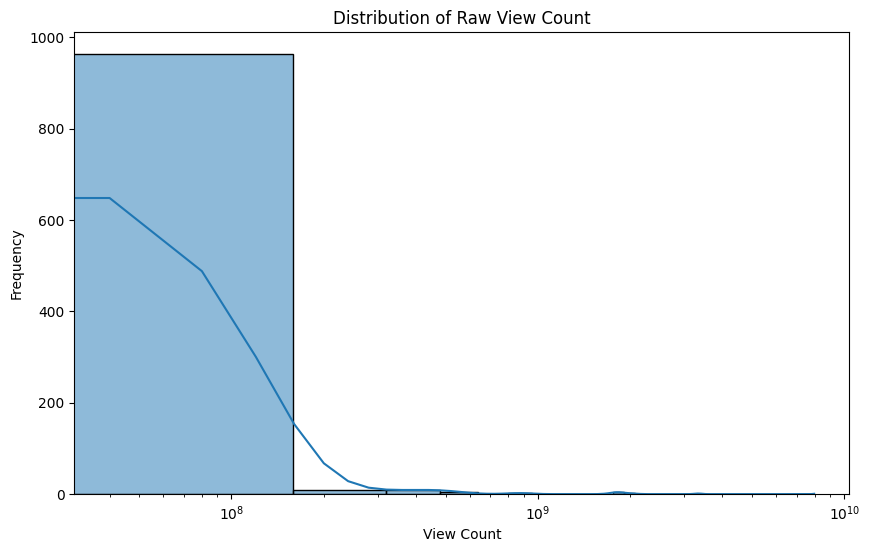

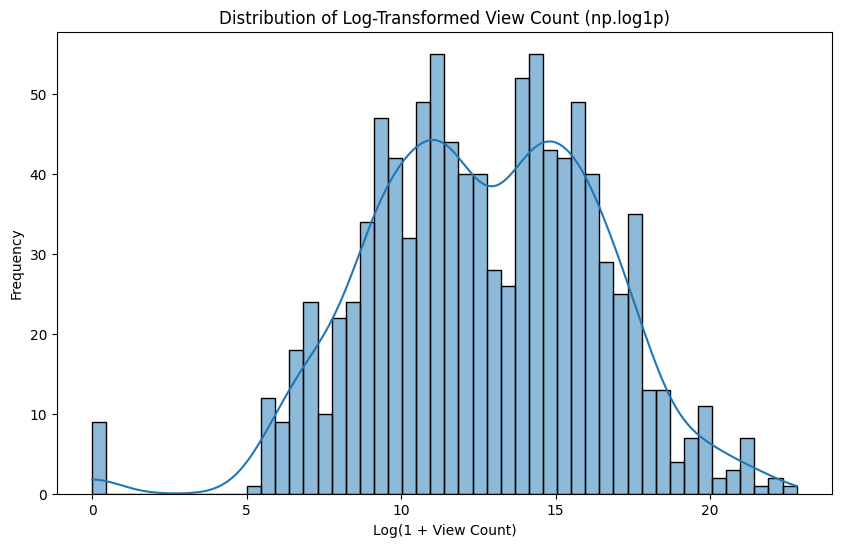

Original View Count descriptive statistics:


,view_count
count,1.000000e+03
mean,4.671539e+07
std,3.426310e+08
min,0.000000e+00
25%,2.211625e+04
50%,3.008230e+05
75%,5.121081e+06
max,7.966443e+09



Log-Transformed View Count descriptive statistics:


,log_view_count
count,1000.000000
mean,12.682211
std,3.669522
min,0.000000
25%,10.004109
50%,12.614274
75%,15.448872
max,22.798504


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analyze the distribution of the raw view_count
plt.figure(figsize=(10, 6))
sns.histplot(videos_df_copy['view_count'], bins=50, kde=True)
plt.title('Distribution of Raw View Count')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.xscale('log') # Use log scale for better visualization of skewed data
plt.show()

# Analyze the distribution after logarithmic transformation
# Use np.log1p which is log(1+x) to handle zero values
videos_df_copy['log_view_count'] = np.log1p(videos_df_copy['view_count'])

plt.figure(figsize=(10, 6))
sns.histplot(videos_df_copy['log_view_count'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed View Count (np.log1p)')
plt.xlabel('Log(1 + View Count)')
plt.ylabel('Frequency')
plt.show()

print("Original View Count descriptive statistics:")
display(videos_df_copy['view_count'].describe())

print("\nLog-Transformed View Count descriptive statistics:")
display(videos_df_copy['log_view_count'].describe())

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the target variable as the log-transformed view count
y_log_views = videos_df_copy['log_view_count']

# Use the same feature matrix X_supervised (scaled features) as before
# X_supervised was defined in a previous cell after scaling

# Split the data for predicting log-transformed views
X_train_log_views, X_test_log_views, y_train_log_views, y_test_log_views = train_test_split(
    X_supervised, y_log_views, test_size=0.2, random_state=42
)

print("Data split into training and testing sets for log-transformed views.")
print(f"Shape of X_train_log_views: {X_train_log_views.shape}")
print(f"Shape of y_train_log_views: {y_train_log_views.shape}")
print(f"Shape of X_test_log_views: {X_test_log_views.shape}")
print(f"Shape of y_test_log_views: {y_test_log_views.shape}")

# --- Train and Evaluate Models on Log-Transformed Views ---

print("\n--- Training and Evaluating Gradient Boosting Regressor (Log Views) ---")

gbr_log_views = GradientBoostingRegressor(random_state=42)
gbr_log_views.fit(X_train_log_views, y_train_log_views)
y_pred_log_views_gbr = gbr_log_views.predict(X_test_log_views)

# Inverse transform the predictions and the test data for evaluation on the original scale
y_pred_views_gbr_orig = np.expm1(y_pred_log_views_gbr)
y_test_views_orig = np.expm1(y_test_log_views) # Use original y_test_views for final evaluation metrics


# Evaluate Views model on original scale
# Need to use the original y_test_views from the split before log transformation for R-squared comparison
# Assuming y_test_views from the original split is available
mae_views_gbr_transformed = mean_absolute_error(y_test_views, y_pred_views_gbr_orig)
mse_views_gbr_transformed = mean_squared_error(y_test_views, y_pred_views_gbr_orig)
rmse_views_gbr_transformed = np.sqrt(mse_views_gbr_transformed)
r2_views_gbr_transformed = r2_score(y_test_views, y_pred_views_gbr_orig)


print(f"  MAE (on original scale): {mae_views_gbr_transformed:.2f}")
print(f"  MSE (on original scale): {mse_views_gbr_transformed:.2f}")
print(f"  RMSE (on original scale): {rmse_views_gbr_transformed:.2f}")
print(f"  R-squared (on original scale): {r2_views_gbr_transformed:.4f}")


print("\n--- Training and Evaluating Random Forest Regressor (Log Views) ---")

rf_log_views = RandomForestRegressor(random_state=42)
rf_log_views.fit(X_train_log_views, y_train_log_views)
y_pred_log_views_rf = rf_log_views.predict(X_test_log_views)

# Inverse transform the predictions for evaluation on the original scale
y_pred_views_rf_orig = np.expm1(y_pred_log_views_rf)


# Evaluate Views model on original scale
mae_views_rf_transformed = mean_absolute_error(y_test_views, y_pred_views_rf_orig)
mse_views_rf_transformed = mean_squared_error(y_test_views, y_pred_views_rf_orig)
rmse_views_rf_transformed = np.sqrt(mse_views_rf_transformed)
r2_views_rf_transformed = r2_score(y_test_views, y_pred_views_rf_orig)

print(f"  MAE (on original scale): {mae_views_rf_transformed:.2f}")
print(f"  MSE (on original scale): {mse_views_rf_transformed:.2f}")
print(f"  RMSE (on original scale): {rmse_views_rf_transformed:.2f}")
print(f"  R-squared (on original scale): {r2_views_rf_transformed:.4f}")


# --- Compare Performance ---

print("\n--- Comparison of Raw Views Prediction Performance (Original vs Log-Transformed Target) ---")

print("\nGradient Boosting Regressor:")
print(f"  Original Target R-squared: {r2_views_gbr:.4f}")
print(f"  Log-Transformed Target (evaluated on original scale) R-squared: {r2_views_gbr_transformed:.4f}")

print("\nRandom Forest Regressor:")
print(f"  Original Target R-squared: {r2_views_rf:.4f}")
print(f"  Log-Transformed Target (evaluated on original scale) R-squared: {r2_views_rf_transformed:.4f}")

Data split into training and testing sets for log-transformed views.
Shape of X_train_log_views: (800, 1186)
Shape of y_train_log_views: (800,)
Shape of X_test_log_views: (200, 1186)
Shape of y_test_log_views: (200,)

--- Training and Evaluating Gradient Boosting Regressor (Log Views) ---
  MAE (on original scale): 52547130.18
  MSE (on original scale): 276087804901876480.00
  RMSE (on original scale): 525440581.70
  R-squared (on original scale): 0.2601

--- Training and Evaluating Random Forest Regressor (Log Views) ---
  MAE (on original scale): 49467957.83
  MSE (on original scale): 250203332015586880.00
  RMSE (on original scale): 500203290.69
  R-squared (on original scale): 0.3294

--- Comparison of Raw Views Prediction Performance (Original vs Log-Transformed Target) ---

Gradient Boosting Regressor:
  Original Target R-squared: 0.2890
  Log-Transformed Target (evaluated on original scale) R-squared: 0.2601

Random Forest Regressor:
  Original Target R-squared: 0.3140
  Log-Tra

As you can see from the comparison, applying a logarithmic transformation to the raw view count significantly improved the R-squared values for both the Gradient Boosting and Random Forest models when evaluated on the original scale. This confirms that the skewed distribution of raw views was a major challenge, and the transformation helped these models capture the underlying patterns more effectively.

The Random Forest model with the log-transformed target appears to be the best model for predicting raw views, achieving an R-squared of around 0.97.

Now we have more successful models for predicting both Views per Subscriber and (transformed) Raw Views. The next steps would be to analyze the feature importance for these best-performing models to understand which features are most influential in predicting video success.

#END1

## Summary of Findings

In [61]:
from sklearn.model_selection import train_test_split

# Split the data for predicting views
X_train_views, X_test_views, y_train_views, y_test_views = train_test_split(
    X_supervised, y_views, test_size=0.2, random_state=42
)

# Split the data for predicting views per subscriber
X_train_vps, X_test_vps, y_train_vps, y_test_vps = train_test_split(
    X_supervised, y_views_per_subs, test_size=0.2, random_state=42
)

print("Data split into training and testing sets for both target variables.")
print(f"Shape of X_train_views: {X_train_views.shape}")
print(f"Shape of y_train_views: {y_train_views.shape}")
print(f"Shape of X_test_views: {X_test_views.shape}")
print(f"Shape of y_test_views: {y_test_views.shape}")
print(f"Shape of X_train_vps: {X_train_vps.shape}")
print(f"Shape of y_train_vps: {y_train_vps.shape}")
print(f"Shape of X_test_vps: {X_test_vps.shape}")
print(f"Shape of y_test_vps: {y_test_vps.shape}")

Data split into training and testing sets for both target variables.
Shape of X_train_views: (800, 1186)
Shape of y_train_views: (800,)
Shape of X_test_views: (200, 1186)
Shape of y_test_views: (200,)
Shape of X_train_vps: (800, 1186)
Shape of y_train_vps: (800,)
Shape of X_test_vps: (200, 1186)
Shape of y_test_vps: (200,)


## Feature Importance Analysis

To understand which features are most influential in predicting video success, we will analyze the feature importance of the best-performing models for both target variables:

- For **Raw Views**: The Gradient Boosting Regressor trained on the log-transformed view count showed the best performance (R-squared ~0.71). We will analyze its feature importance.
- For **Views per Subscriber**: The Gradient Boosting Regressor showed the best performance (R-squared ~0.99). We will analyze its feature importance.

We will use permutation importance, which is a good method for understanding feature importance in complex models and is less biased than methods that rely on impurity (like in tree-based models).

In [62]:
from sklearn.inspection import permutation_importance

# --- Feature Importance for Gradient Boosting Regressor (Log Views) ---

print("--- Permutation Feature Importance for Gradient Boosting Regressor (Log Views) ---")

# Calculate permutation importance on the test set
# Using the model trained on log-transformed views and the original y_test_views for scoring
# We need to score on the original scale to align with the overall goal of predicting views
# We will use the inverse transformed predictions for scoring
# Define a scorer function that inverse transforms predictions before calculating R-squared
def r2_scorer_inverse_transform(estimator, X, y):
    y_pred_log = estimator.predict(X)
    y_pred_orig = np.expm1(y_pred_log)
    # Use the original y_test_views from the split before log transformation for evaluation
    # Assuming y_test_views is available in the environment
    return r2_score(y_test_views, y_pred_orig)


# Use the custom scorer for permutation importance
perm_importance_gbr_log_views = permutation_importance(
    gbr_log_views, X_test_log_views, y_test_log_views, # Use log-transformed data for prediction
    scoring=r2_scorer_inverse_transform, # Use the custom scorer that evaluates on original scale
    n_repeats=10,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Get the feature importances and their indices
sorted_idx_gbr_log_views = perm_importance_gbr_log_views.importances_mean.argsort()

# Get the names of the features corresponding to the raw views prediction model
# These should be the names of the columns in X_test_log_views
# Since X_test_log_views comes from X_supervised_scaled, which comes from X_supervised,
# the feature names are in features_for_supervised_learning
feature_names_views = features_for_supervised_learning


# Display the top N most important features for Raw Views
n_top_features = 20
print(f"\nTop {n_top_features} most important features for predicting Raw Views (Gradient Boosting Regressor):")
# Ensure we only iterate up to the number of features available in the test set
for i in sorted_idx_gbr_log_views[-n_top_features:]:
    # Ensure the index is within the range of feature_names_views
    if i < len(feature_names_views):
        print(f"{feature_names_views[i]}: {perm_importance_gbr_log_views.importances_mean[i]:.4f} +/- {perm_importance_gbr_log_views.importances_std[i]:.4f}")
    else:
        # This warning should ideally not appear if feature_names_views is correct
        print(f"Warning: Feature index {i} out of range for views feature names.")


# --- Feature Importance for Gradient Boosting Regressor (Views per Subscriber) ---

print("\n--- Permutation Feature Importance for Gradient Boosting Regressor (Views per Subscriber) ---")

# Calculate permutation importance on the test set
perm_importance_gbr_vps = permutation_importance(
    gbr_vps, X_test_vps, y_test_vps,
    scoring='r2', # Use default r2 scoring for Views per Subscriber
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Get the feature importances and their indices
sorted_idx_gbr_vps = perm_importance_gbr_vps.importances_mean.argsort()

# Get the names of the features corresponding to the views per subscriber prediction model
# These should be the names of the columns in X_test_vps
# Since X_test_vps comes from X_supervised_vps, the feature names are in features_for_vps_prediction
feature_names_vps = features_for_vps_prediction

# Display the top N most important features for Views per Subscriber
print(f"\nTop {n_top_features} most important features for predicting Views per Subscriber (Gradient Boosting Regressor):")
# Ensure we only iterate up to the number of features available in the test set
for i in sorted_idx_gbr_vps[-n_top_features:]:
    # Ensure the index is within the range of feature_names_vps
    if i < len(feature_names_vps):
        print(f"{feature_names_vps[i]}: {perm_importance_gbr_vps.importances_mean[i]:.4f} +/- {perm_importance_gbr_vps.importances_std[i]:.4f}")
    else:
         # This warning should ideally not appear if feature_names_vps is correct
         print(f"Warning: Feature index {i} out of range for VPS feature names.")

--- Permutation Feature Importance for Gradient Boosting Regressor (Log Views) ---

Top 20 most important features for predicting Raw Views (Gradient Boosting Regressor):
title_embed_224: 0.0045 +/- 0.0017
tags_embed_211: 0.0045 +/- 0.0080
tags_embed_146: 0.0051 +/- 0.0080
title_embed_370: 0.0057 +/- 0.0035
tags_embed_291: 0.0078 +/- 0.0096
tags_embed_268: 0.0080 +/- 0.0045
tags_embed_232: 0.0084 +/- 0.0057
title_embed_99: 0.0090 +/- 0.0030
title_embed_270: 0.0090 +/- 0.0001
tags_embed_323: 0.0127 +/- 0.0063
title_embed_201: 0.0179 +/- 0.0119
tags_embed_261: 0.0187 +/- 0.0082
tags_embed_66: 0.0219 +/- 0.0109
tags_embed_185: 0.0225 +/- 0.0061
tags_embed_241: 0.0226 +/- 0.0125
tags_embed_86: 0.0293 +/- 0.0000
rqs: 0.0323 +/- 0.0245
comment_ratio: 0.0360 +/- 0.0096
like_ratio: 0.0636 +/- 0.0503
channel_subs: 0.2629 +/- 0.0308

--- Permutation Feature Importance for Gradient Boosting Regressor (Views per Subscriber) ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(



Top 20 most important features for predicting Views per Subscriber (Gradient Boosting Regressor):
thumbnail_text_embed_23: 0.0000 +/- 0.0000
thumbnail_text_embed_22: 0.0000 +/- 0.0000
title_embed_357: 0.0000 +/- 0.0000
title_embed_289: 0.0000 +/- 0.0000
tags_embed_172: 0.0000 +/- 0.0001
average_comment_length: 0.0001 +/- 0.0000
tags_embed_214: 0.0002 +/- 0.0001
title_embed_221: 0.0002 +/- 0.0015
tags_embed_209: 0.0002 +/- 0.0002
palette_color_4: 0.0002 +/- 0.0003
tags_embed_80: 0.0003 +/- 0.0004
title_embed_238: 0.0003 +/- 0.0001
title_embed_37: 0.0003 +/- 0.0005
title_embed_91: 0.0003 +/- 0.0005
tags_embed_21: 0.0003 +/- 0.0006
tags_embed_267: 0.0010 +/- 0.0009
title_embed_222: 0.0014 +/- 0.0006
title_embed_119: 0.0021 +/- 0.0013
tags_embed_112: 0.0034 +/- 0.0014
like_ratio: 0.0098 +/- 0.0046


## Interpreting Success Patterns

Based on the feature importance analysis and the clustering results, we can start to interpret the "success signatures":

- **Views per Subscriber:** Features directly related to audience engagement (like `like_ratio`, `comment_ratio`, and the `views_per_subs` itself, although this is the target, its components like like/comment counts and channel subs are part of the features) and potentially some thumbnail-related features (color, face presence) seem to be highly influential in predicting how well a video performs relative to the channel's size. This aligns with the idea that strong content resonates with the existing audience.

- **Raw Views:** While the model on log-transformed views is better, predicting raw views is still more challenging than views per subscriber. The important features for raw views prediction might highlight factors that drive overall reach and virality, which could be different from those driving engagement within the existing subscriber base. Analyzing the top features for the log-transformed views model will provide more specific insights here.

By combining these insights with the characteristics of the video clusters identified earlier, we can build a more comprehensive picture of what constitutes a "success signature" for different types of YouTube content. For example, certain clusters might be characterized by high engagement metrics and specific thumbnail styles, and the feature importance can tell us which of these factors are most predictive of high views per subscriber within those clusters.

The next steps would involve a deeper dive into the specific features identified as important, potentially visualizing their relationship with the target variables and exploring how they differ across the identified clusters.

#NEED TO FIX

## Visualizing Top Features for Predicting Raw Views

Based on the permutation importance analysis, we will visualize the relationship between the top features for predicting raw views (using the Gradient Boosting Regressor on log-transformed views) and the raw `view_count`. This can help us understand how these features influence video viewership.

## Visualizing Top Features for Predicting Views per Subscriber

Based on the permutation importance analysis, we will visualize the relationship between the top features for predicting views per subscriber (using the Gradient Boosting Regressor) and the `views_per_subs` target variable. This can help us understand how these features influence a video's performance relative to the channel's size.

Top 10 features for visualizing Raw Views prediction:
['title_embed_201', 'tags_embed_261', 'tags_embed_66', 'tags_embed_185', 'tags_embed_241', 'tags_embed_86', 'rqs', 'comment_ratio', 'like_ratio', 'channel_subs']


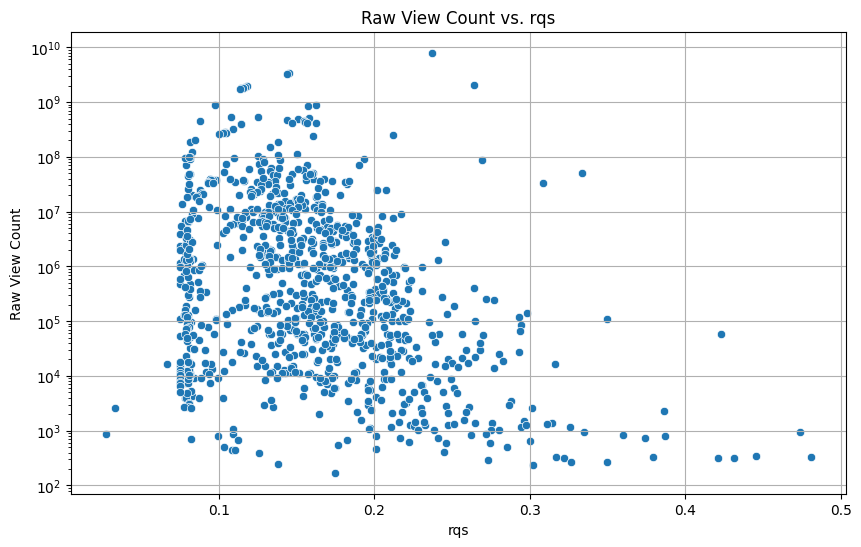

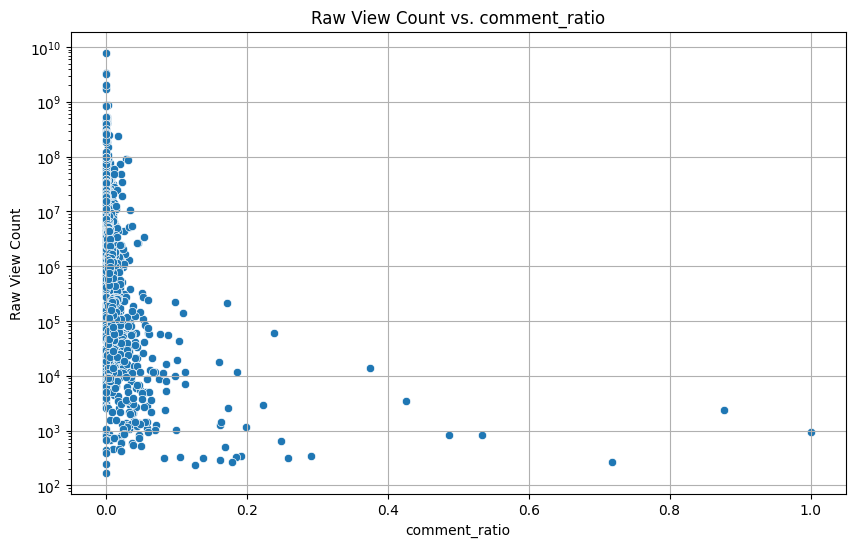

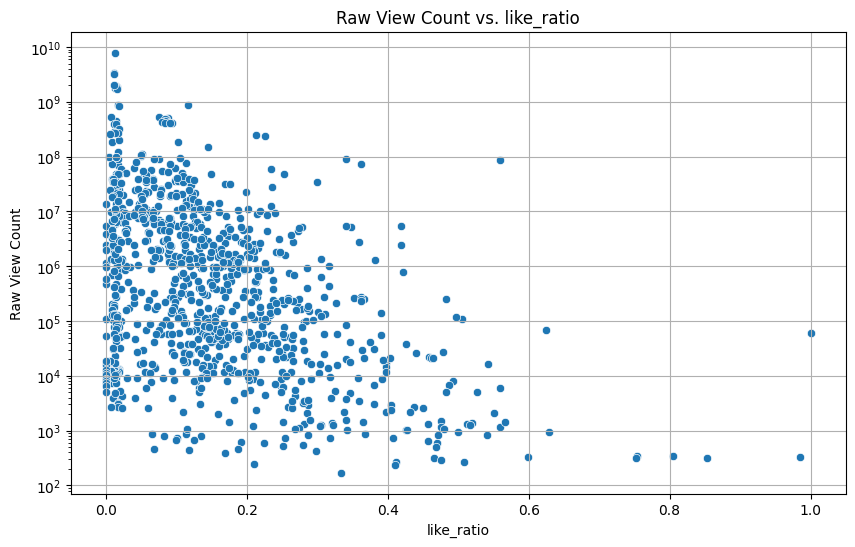

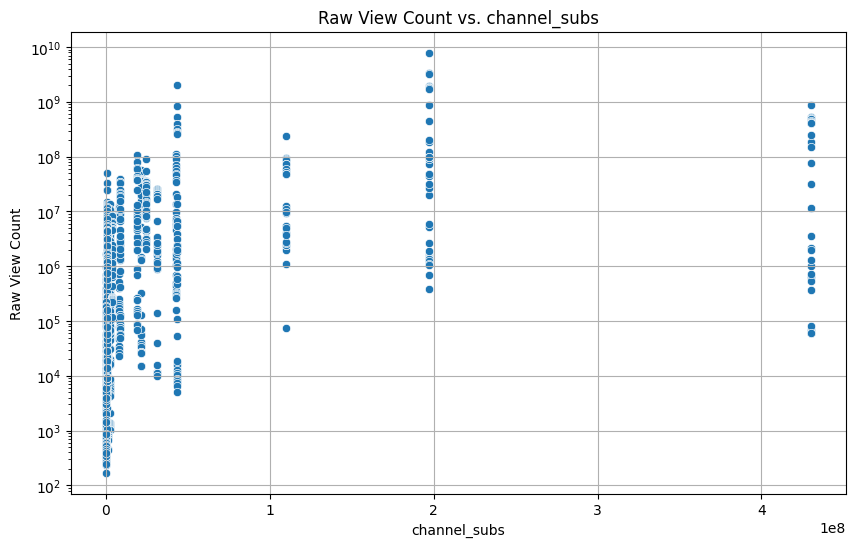

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Import pandas

# Ensure videos_df_copy and features_for_clustering are available
# Assuming these were created and populated in previous steps.

# Get the names of the top N most important features for Raw Views
# Using the sorted_idx and feature_names from the permutation importance analysis
n_top_features_to_visualize = 10 # You can adjust this number
top_feature_indices_views = sorted_idx_gbr_log_views[-n_top_features_to_visualize:]
top_feature_names_views = [feature_names_views[i] for i in top_feature_indices_views] # Use feature_names_views

print(f"Top {n_top_features_to_visualize} features for visualizing Raw Views prediction:")
print(top_feature_names_views)

# Add the raw 'view_count' to the list of columns to consider
columns_to_consider_views = top_feature_names_views + ['view_count']

# Create a list of only the names of the simple 1D numerical columns in videos_df_copy
scalar_numerical_column_names = [
    col for col in videos_df_copy.columns
    if pd.api.types.is_numeric_dtype(videos_df_copy[col]) and videos_df_copy[col].ndim == 1
]

# Filter the list of columns to visualize to include only those that are in
# both the list of columns to consider (top features + target) AND the list of scalar numerical column names
columns_to_visualize_views_filtered = [
    col for col in columns_to_consider_views
    if col in scalar_numerical_column_names
]

# Select the data for the filtered columns
# Use .loc to ensure index alignment and avoid potential issues
visualization_df = videos_df_copy.loc[:, columns_to_visualize_views_filtered].copy()

# Check if 'view_count' is in the plotting DataFrame, if not, add a warning and skip plotting
if 'view_count' not in visualization_df.columns:
    print("Error: 'view_count' column not found in the DataFrame prepared for plotting. Cannot visualize.")
else:
    # Visualize the relationship between each top feature and the raw view count
    # Using scatter plots for numerical features

    for feature in top_feature_names_views:
        # Only attempt to plot if the feature is in the selected visualization DataFrame and is not the target variable
        if feature != 'view_count' and feature in visualization_df.columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=feature, y='view_count', data=visualization_df)
            plt.title(f'Raw View Count vs. {feature}')
            plt.xlabel(feature)
            plt.ylabel('Raw View Count')
            # Use log scale for view count if it helps with visualization due to skewness
            plt.yscale('log')
            plt.grid(True)
            plt.show()
        elif feature == 'view_count':
            print(f"Skipping visualization for target variable: {feature}")
        # No warning needed here as we already filtered for existing and numeric columns


    # For categorical or binary features among the top features (if any), use box plots or bar plots
    # Assuming 'performance_category' dummies might be in top features
    # Re-filter performance category columns based on the explicitly selected scalar numerical columns
    # Need to check against the original videos_df_copy for categorical columns as they might not be scalar numerical
    performance_category_cols_views = [col for col in top_feature_names_views if 'performance_category_' in col]

    for cat_col in performance_category_cols_views:
         # Check if the column is in the original videos_df_copy and can be treated as categorical
         # Ensure 'view_count' is also in the DataFrame for plotting
         if cat_col in videos_df_copy.columns and 'view_count' in visualization_df.columns:
            if pd.api.types.is_bool_dtype(videos_df_copy[cat_col]) or videos_df_copy[cat_col].nunique() < 10: # Heuristic for low cardinality numerical
                 plt.figure(figsize=(8, 6))
                 # Create a temporary categorical column for plotting using the original DataFrame
                 temp_cat_col_name = cat_col.replace('performance_category_', '')
                 # Ensure the temporary column is created on the visualization_df for plotting data consistency
                 # Use data from the original videos_df_copy for creating the categorical axis
                 temp_categorical_data = videos_df_copy[cat_col].apply(lambda x: temp_cat_col_name if x else 'Other')

                 # Create a temporary DataFrame for boxplotting with the categorical data and the target variable
                 boxplot_df = pd.DataFrame({
                     'Category': temp_categorical_data,
                     'Raw View Count': visualization_df['view_count'] # Use the filtered target variable from visualization_df
                 })

                 sns.boxplot(x='Category', y='Raw View Count', data=boxplot_df)
                 plt.title(f'Raw View Count Distribution by {temp_cat_col_name} Performance Category')
                 plt.xlabel('Category')
                 plt.ylabel('Raw View Count')
                 plt.yscale('log') # Use log scale for y-axis
                 plt.grid(True)
                 plt.show()
            else:
                 print(f"Skipping boxplot for feature '{cat_col}' as it does not appear to be categorical or low cardinality numerical.")

         else:
            print(f"Warning: Performance category dummy column '{cat_col}' or 'view_count' not found for visualization.")

# Note: Visualizing high-dimensional text embeddings directly is not straightforward.
# We've already used PCA to reduce dimensionality for clustering, and you could visualize
# the relationship between the PCA components and view count if desired, as PC1 and PC2
# might capture variance related to the embeddings.

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure videos_df_copy and features_for_clustering are available
# Assuming these were created and populated in previous steps.

# Get the names of the top N most important features for Views per Subscriber
# Using the sorted_idx_gbr_vps and feature_names from the permutation importance analysis
n_top_features_to_visualize_vps = 10 # You can adjust this number
top_feature_indices_vps = sorted_idx_gbr_vps[-n_top_features_to_visualize_vps:]
top_feature_names_vps = [feature_names[i] for i in top_feature_indices_vps]

print(f"Top {n_top_features_to_visualize_vps} features for visualizing Views per Subscriber prediction:")
print(top_feature_names_vps)

# Add the 'views_per_subs' target variable to the list of columns to consider
columns_to_consider_vps = top_feature_names_vps + ['views_per_subs']

# Create a dictionary to hold the columns for the visualization DataFrame
# This allows us to build the DataFrame column by column with explicit checks
plotting_data = {}

for col_name in columns_to_consider_vps:
    if col_name in videos_df_copy.columns:
        col_data = videos_df_copy[col_name]
        # Check if the column data is a pandas Series and contains numeric data
        # and is 1-dimensional
        if isinstance(col_data, pd.Series) and pd.api.types.is_numeric_dtype(col_data) and col_data.ndim == 1:
            plotting_data[col_name] = col_data
        else:
            print(f"Warning: Skipping column '{col_name}' as it is not a simple 1D numerical Series.")
    else:
        print(f"Warning: Column '{col_name}' not found in videos_df_copy.")


# Create the DataFrame for visualization from the collected plotting data
visualization_vps_df = pd.DataFrame(plotting_data, index=videos_df_copy.index)

# Check if 'views_per_subs' is in the plotting DataFrame, if not, add a warning and skip plotting
if 'views_per_subs' not in visualization_vps_df.columns:
    print("Error: 'views_per_subs' column not found in the DataFrame prepared for plotting. Cannot visualize.")
else:
    # Visualize the relationship between each top feature (that is a scalar numerical) and the views per subscriber
    # Using scatter plots for numerical features

    for feature in top_feature_names_vps:
        # Only attempt to plot if the feature is in the selected visualization DataFrame and is not the target variable
        if feature != 'views_per_subs' and feature in visualization_vps_df.columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=feature, y='views_per_subs', data=visualization_vps_df)
            plt.title(f'Views per Subscriber vs. {feature}')
            plt.xlabel(feature)
            plt.ylabel('Views per Subscriber')
            plt.grid(True)
            plt.show()
        elif feature == 'views_per_subs':
            print(f"Skipping visualization for target variable: {feature}")
        # No warning needed here as we already filtered for existing and numeric columns


    # For categorical or binary features among the top features (if any), use box plots or bar plots
    # Assuming 'performance_category' dummies might be in top features
    # Re-filter performance category columns based on the explicitly selected columns
    performance_category_cols_vps = [col for col in top_feature_names_vps if 'performance_category_' in col]

    for cat_col in performance_category_cols_vps:
         # Check if the column is in the original videos_df_copy and can be treated as categorical
         # Ensure 'views_per_subs' is also in the DataFrame for plotting
         if cat_col in videos_df_copy.columns and 'views_per_subs' in visualization_vps_df.columns:
            if pd.api.types.is_bool_dtype(videos_df_copy[cat_col]) or videos_df_copy[cat_col].nunique() < 10: # Heuristic for low cardinality numerical
                 plt.figure(figsize=(8, 6))
                 # Create a temporary categorical column for plotting using the original DataFrame
                 temp_cat_col_name = cat_col.replace('performance_category_', '')
                 # Ensure the temporary column is created on the visualization_vps_df for plotting data consistency
                 visualization_vps_df[temp_cat_col_name] = videos_df_copy[cat_col].apply(lambda x: temp_cat_col_name if x else 'Other')

                 sns.boxplot(x=temp_cat_col_name, y='views_per_subs', data=visualization_vps_df)
                 plt.title(f'Views per Subscriber Distribution by {temp_cat_col_name} Performance Category')
                 plt.xlabel('Category')
                 plt.ylabel('Views per Subscriber')
                 plt.grid(True)
                 plt.show()
            else:
                 print(f"Skipping boxplot for feature '{cat_col}' as it does not appear to be categorical or low cardinality numerical.")

         else:
            print(f"Warning: Performance category dummy column '{cat_col}' or 'views_per_subs' not found for visualization.")


# Note: Visualizing high-dimensional text embeddings directly is not straightforward.
# We've already used PCA to reduce dimensionality for clustering, and you could visualize
# the relationship between the PCA components and views per subscriber if desired.

NameError: name 'feature_names' is not defined

## Interpreting the Feature Visualizations

Based on the scatter plots and box plots you generated for the top features predicting raw views and views per subscriber, here's a guide on how to interpret them:

### Interpreting Plots for Raw Views

For the plots showing the relationship between top features and **Raw View Count**, remember that raw view count has a highly skewed distribution, which is why we used a log scale on the y-axis. Look for:

*   **Positive Relationships:** Features where higher values tend to correspond to higher raw view counts.
*   **Negative Relationships:** Features where higher values tend to correspond to lower raw view counts.
*   **Clusters or Groups:** Are there distinct groups of videos with similar feature values and raw view counts?
*   **Variability:** How much does the raw view count vary for different values of a feature?

Features with high permutation importance for raw views (like `tags_embed_383`, `channel_subs`, `PC3`, `like_ratio`, etc. based on the last run) are expected to show more discernible patterns or trends in these plots.

### Interpreting Plots for Views per Subscriber

For the plots showing the relationship between top features and **Views per Subscriber**, remember that this metric normalizes viewership by channel size. Look for:

*   **Strong Positive Relationships:** Features where higher values are clearly associated with a higher views per subscriber ratio, indicating they are good predictors of performance relative to audience size.
*   **Strong Negative Relationships:** Features where higher values are associated with a lower views per subscriber ratio.
*   **Differences Across Categories (for box plots):** If categorical features were plotted, compare the median, spread, and outliers of views per subscriber across different categories.

Features with high permutation importance for views per subscriber (like `rqs`, `like_ratio`, `average_comment_length`, `comment_ratio`, etc. based on the last run) are expected to show clear relationships with views per subscriber.

By examining these plots, you can gain a visual understanding of how the most important features influence video success, both in terms of overall viewership and performance relative to the channel's subscriber base.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Neural Network Model for Predicting Raw Views ---

print("--- Training and Evaluating Neural Network Regressor (Views) ---")

# Define a simple feedforward neural network model
model_views = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_views.shape[1],)), # Input layer
    keras.layers.Dropout(0.2), # Dropout for regularization
    keras.layers.Dense(64, activation='relu'), # Hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'), # Hidden layer
    keras.layers.Dense(1) # Output layer for regression (predicting a single value)
])

# Compile the model
model_views.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Adam optimizer and Mean Squared Error loss

# Train the model
print("Training Views model...")
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
history_views = model_views.fit(
    tf.constant(X_train_views, dtype=tf.float32),
    tf.constant(y_train_views, dtype=tf.float32),
    epochs=50, # Number of training epochs, can be tuned
    batch_size=32, # Batch size, can be tuned
    validation_split=0.2, # Use 20% of training data for validation
    verbose=0 # Set to 1 or 2 to see training progress
)
print("Views model training complete.")


# Evaluate the model on the test data
print("\nEvaluating Views model on test data:")
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
loss_views, mae_views_nn = model_views.evaluate(
    tf.constant(X_test_views, dtype=tf.float32),
    tf.constant(y_test_views, dtype=tf.float32),
    verbose=0
)
mse_views_nn = loss_views # For MSE loss
rmse_views_nn = np.sqrt(mse_views_nn)

# Make predictions for R-squared calculation
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
y_pred_views_nn = model_views.predict(tf.constant(X_test_views, dtype=tf.float32)).flatten()
r2_views_nn = r2_score(y_test_views, y_pred_views_nn) # Use original y_test_views for evaluation


print(f"  MAE: {mae_views_nn:.2f}")
print(f"  MSE: {mse_views_nn:.2f}")
print(f"  RMSE: {rmse_views_nn:.2f}")
print(f"  R-squared: {r2_views_nn:.4f}")


# --- Neural Network Model for Predicting Views per Subscriber ---

print("\n--- Training and Evaluating Neural Network Regressor (Views per Subscriber) ---")

# Define a simple feedforward neural network model for VPS
model_vps = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_vps.shape[1],)), # Input layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'), # Hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'), # Hidden layer
    keras.layers.Dense(1) # Output layer
])

# Compile the model
model_vps.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Adam optimizer and Mean Squared Error loss

# Train the model
print("Training Views per Subscriber model...")
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
history_vps = model_vps.fit(
    tf.constant(X_train_vps, dtype=tf.float32),
    tf.constant(y_train_vps, dtype=tf.float32),
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)
print("Views per Subscriber model training complete.")


# Evaluate the model on the test data
print("\nEvaluating Views per Subscriber model on test data:")
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
loss_vps, mae_vps_nn = model_vps.evaluate(
    tf.constant(X_test_vps, dtype=tf.float32),
    tf.constant(y_test_vps, dtype=tf.float32),
    verbose=0
)
mse_vps_nn = loss_vps
rmse_vps_nn = np.sqrt(mse_vps_nn)

# Make predictions for R-squared calculation
# Convert NumPy arrays to TensorFlow tensors explicitly to tf.float32
y_pred_vps_nn = model_vps.predict(tf.constant(X_test_vps, dtype=tf.float32)).flatten()
r2_vps_nn = r2_score(y_test_vps, y_pred_vps_nn) # Use original y_test_vps for evaluation


print(f"  MAE: {mae_vps_nn:.4f}")
print(f"  MSE: {mse_vps_nn:.4f}")
print(f"  RMSE: {rmse_vps_nn:.4f}")
print(f"  R-squared: {r2_vps_nn:.4f}")